In [6]:
import mne
import numpy as np
import os

# Path to your folder containing the EEG signals
eeg_folder = r"C:\Semesters\Sem5\Deep learning\dl_project\convert_bmsp_data_fif"  # Update this path
input_folder = r"C:\Semesters\Sem5\BMSP\Project\eeg_data"    # Update this path

# Make sure the output folder exists
os.makedirs(input_folder, exist_ok=True)

desired_duration = 720  # 12 minutes in seconds

# Iterate through all EEG files in the folder
for i in range(1, 89):  # Assuming file names are in the format 'sub-001', 'sub-002', etc.
    file_path = os.path.join(eeg_folder, f'sub-{i:03d}_temp_raw.fif')  # Adjust file extension if needed
    
    # Load the EEG signal
    try:
        raw = mne.io.read_raw_fif(file_path, preload=True)
    except Exception as e:
        print(f"Error loading {file_path}: {e}")
        continue
    
    # Check the maximum duration of the signal
    max_duration = raw.times[-1]  # Last time point gives the duration
    print(f"Signal {file_path} duration: {max_duration:.2f} seconds")

    if max_duration < desired_duration:
        # Pad the signal with zeros
        raw_data = raw.get_data()  # Get the data as a NumPy array
        n_channels, n_times = raw_data.shape
        padding_length = int((desired_duration - max_duration) * raw.info['sfreq'])
        # Create a zero array for padding
        padding = np.zeros((n_channels, padding_length))
    
        # Concatenate the original signal with the padding
        padded_data = np.concatenate((raw_data, padding), axis=1)
    
        # Create a new RawArray with the padded data
        raw = mne.io.RawArray(padded_data, raw.info)
    else:
        # Crop to 12 minutes if longer
        raw.crop(tmin=0, tmax=desired_duration)

    epoch = raw.copy().filter(0.5, 60, fir_design='firwin')
    epoch_folder = r"C:\Semesters\Sem5\BMSP\Project\segmented_data"
    seg_epochs = mne.make_fixed_length_epochs(epoch, duration=10, preload=True)
    seg_epochs.save(os.path.join(epoch_folder, f'sub-{i:03d}_epochs.fif'), overwrite=True)
    


Opening raw data file C:\Semesters\Sem5\Deep learning\dl_project\convert_bmsp_data_fif\sub-001_temp_raw.fif...
    Range : 0 ... 299899 =      0.000 ...   599.798 secs
Ready.
Reading 0 ... 299899  =      0.000 ...   599.798 secs...
Signal C:\Semesters\Sem5\Deep learning\dl_project\convert_bmsp_data_fif\sub-001_temp_raw.fif duration: 599.80 seconds
Creating RawArray with float64 data, n_channels=19, n_times=360001
    Range : 0 ... 360000 =      0.000 ...   720.000 secs
Ready.
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 0.5 - 60 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 0.50
- Lower transition bandwidth: 0.50 Hz (-6 dB cutoff frequency: 0.25 Hz)
- Upper passband edge: 60.00 Hz
- Upper transition bandwidth: 15.00 Hz (-6 dB cutoff frequency: 67.50 

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    1.9s


72 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 72 events and 5000 original time points ...
0 bad epochs dropped


C:\Users\kriti\AppData\Local\Temp\ipykernel_6288\1332963370.py:49: RuntimeWarning: This filename (C:\Semesters\Sem5\BMSP\Project\segmented_data\sub-001_epochs.fif) does not conform to MNE naming conventions. All epochs files should end with -epo.fif, -epo.fif.gz, _epo.fif or _epo.fif.gz
  seg_epochs.save(os.path.join(epoch_folder, f'sub-{i:03d}_epochs.fif'), overwrite=True)


Opening raw data file C:\Semesters\Sem5\Deep learning\dl_project\convert_bmsp_data_fif\sub-002_temp_raw.fif...
    Range : 0 ... 396549 =      0.000 ...   793.098 secs
Ready.
Reading 0 ... 396549  =      0.000 ...   793.098 secs...
Signal C:\Semesters\Sem5\Deep learning\dl_project\convert_bmsp_data_fif\sub-002_temp_raw.fif duration: 793.10 seconds
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 0.5 - 60 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 0.50
- Lower transition bandwidth: 0.50 Hz (-6 dB cutoff frequency: 0.25 Hz)
- Upper passband edge: 60.00 Hz
- Upper transition bandwidth: 15.00 Hz (-6 dB cutoff frequency: 67.50 Hz)
- Filter length: 3301 samples (6.602 s)



[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    2.1s


Not setting metadata
72 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 72 events and 5000 original time points ...
0 bad epochs dropped


C:\Users\kriti\AppData\Local\Temp\ipykernel_6288\1332963370.py:49: RuntimeWarning: This filename (C:\Semesters\Sem5\BMSP\Project\segmented_data\sub-002_epochs.fif) does not conform to MNE naming conventions. All epochs files should end with -epo.fif, -epo.fif.gz, _epo.fif or _epo.fif.gz
  seg_epochs.save(os.path.join(epoch_folder, f'sub-{i:03d}_epochs.fif'), overwrite=True)


Opening raw data file C:\Semesters\Sem5\Deep learning\dl_project\convert_bmsp_data_fif\sub-003_temp_raw.fif...
    Range : 0 ... 153549 =      0.000 ...   307.098 secs
Ready.
Reading 0 ... 153549  =      0.000 ...   307.098 secs...
Signal C:\Semesters\Sem5\Deep learning\dl_project\convert_bmsp_data_fif\sub-003_temp_raw.fif duration: 307.10 seconds
Creating RawArray with float64 data, n_channels=19, n_times=360001
    Range : 0 ... 360000 =      0.000 ...   720.000 secs
Ready.
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 0.5 - 60 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 0.50
- Lower transition bandwidth: 0.50 Hz (-6 dB cutoff frequency: 0.25 Hz)
- Upper passband edge: 60.00 Hz
- Upper transition bandwidth: 15.00 Hz (-6 dB cutoff frequency: 67.50 

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.9s


Not setting metadata
72 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 72 events and 5000 original time points ...
0 bad epochs dropped


C:\Users\kriti\AppData\Local\Temp\ipykernel_6288\1332963370.py:49: RuntimeWarning: This filename (C:\Semesters\Sem5\BMSP\Project\segmented_data\sub-003_epochs.fif) does not conform to MNE naming conventions. All epochs files should end with -epo.fif, -epo.fif.gz, _epo.fif or _epo.fif.gz
  seg_epochs.save(os.path.join(epoch_folder, f'sub-{i:03d}_epochs.fif'), overwrite=True)


Opening raw data file C:\Semesters\Sem5\Deep learning\dl_project\convert_bmsp_data_fif\sub-004_temp_raw.fif...
    Range : 0 ... 353549 =      0.000 ...   707.098 secs
Ready.
Reading 0 ... 353549  =      0.000 ...   707.098 secs...
Signal C:\Semesters\Sem5\Deep learning\dl_project\convert_bmsp_data_fif\sub-004_temp_raw.fif duration: 707.10 seconds
Creating RawArray with float64 data, n_channels=19, n_times=360001
    Range : 0 ... 360000 =      0.000 ...   720.000 secs
Ready.
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 0.5 - 60 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 0.50
- Lower transition bandwidth: 0.50 Hz (-6 dB cutoff frequency: 0.25 Hz)
- Upper passband edge: 60.00 Hz
- Upper transition bandwidth: 15.00 Hz (-6 dB cutoff frequency: 67.50 

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    1.2s


72 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 72 events and 5000 original time points ...
0 bad epochs dropped


C:\Users\kriti\AppData\Local\Temp\ipykernel_6288\1332963370.py:49: RuntimeWarning: This filename (C:\Semesters\Sem5\BMSP\Project\segmented_data\sub-004_epochs.fif) does not conform to MNE naming conventions. All epochs files should end with -epo.fif, -epo.fif.gz, _epo.fif or _epo.fif.gz
  seg_epochs.save(os.path.join(epoch_folder, f'sub-{i:03d}_epochs.fif'), overwrite=True)


Opening raw data file C:\Semesters\Sem5\Deep learning\dl_project\convert_bmsp_data_fif\sub-005_temp_raw.fif...
    Range : 0 ... 402049 =      0.000 ...   804.098 secs
Ready.
Reading 0 ... 402049  =      0.000 ...   804.098 secs...
Signal C:\Semesters\Sem5\Deep learning\dl_project\convert_bmsp_data_fif\sub-005_temp_raw.fif duration: 804.10 seconds
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 0.5 - 60 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 0.50
- Lower transition bandwidth: 0.50 Hz (-6 dB cutoff frequency: 0.25 Hz)
- Upper passband edge: 60.00 Hz
- Upper transition bandwidth: 15.00 Hz (-6 dB cutoff frequency: 67.50 Hz)
- Filter length: 3301 samples (6.602 s)

Not setting metadata
72 matching events found
No baseline correction applied
0 project

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    1.0s


0 bad epochs dropped


C:\Users\kriti\AppData\Local\Temp\ipykernel_6288\1332963370.py:49: RuntimeWarning: This filename (C:\Semesters\Sem5\BMSP\Project\segmented_data\sub-005_epochs.fif) does not conform to MNE naming conventions. All epochs files should end with -epo.fif, -epo.fif.gz, _epo.fif or _epo.fif.gz
  seg_epochs.save(os.path.join(epoch_folder, f'sub-{i:03d}_epochs.fif'), overwrite=True)


Opening raw data file C:\Semesters\Sem5\Deep learning\dl_project\convert_bmsp_data_fif\sub-006_temp_raw.fif...
    Range : 0 ... 318549 =      0.000 ...   637.098 secs
Ready.
Reading 0 ... 318549  =      0.000 ...   637.098 secs...
Signal C:\Semesters\Sem5\Deep learning\dl_project\convert_bmsp_data_fif\sub-006_temp_raw.fif duration: 637.10 seconds
Creating RawArray with float64 data, n_channels=19, n_times=360001
    Range : 0 ... 360000 =      0.000 ...   720.000 secs
Ready.
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 0.5 - 60 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 0.50
- Lower transition bandwidth: 0.50 Hz (-6 dB cutoff frequency: 0.25 Hz)
- Upper passband edge: 60.00 Hz
- Upper transition bandwidth: 15.00 Hz (-6 dB cutoff frequency: 67.50 

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    1.0s


72 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 72 events and 5000 original time points ...
0 bad epochs dropped


C:\Users\kriti\AppData\Local\Temp\ipykernel_6288\1332963370.py:49: RuntimeWarning: This filename (C:\Semesters\Sem5\BMSP\Project\segmented_data\sub-006_epochs.fif) does not conform to MNE naming conventions. All epochs files should end with -epo.fif, -epo.fif.gz, _epo.fif or _epo.fif.gz
  seg_epochs.save(os.path.join(epoch_folder, f'sub-{i:03d}_epochs.fif'), overwrite=True)


Opening raw data file C:\Semesters\Sem5\Deep learning\dl_project\convert_bmsp_data_fif\sub-007_temp_raw.fif...
    Range : 0 ... 384549 =      0.000 ...   769.098 secs
Ready.
Reading 0 ... 384549  =      0.000 ...   769.098 secs...
Signal C:\Semesters\Sem5\Deep learning\dl_project\convert_bmsp_data_fif\sub-007_temp_raw.fif duration: 769.10 seconds
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 0.5 - 60 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 0.50
- Lower transition bandwidth: 0.50 Hz (-6 dB cutoff frequency: 0.25 Hz)
- Upper passband edge: 60.00 Hz
- Upper transition bandwidth: 15.00 Hz (-6 dB cutoff frequency: 67.50 Hz)
- Filter length: 3301 samples (6.602 s)

Not setting metadata
72 matching events found


[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.8s


No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 72 events and 5000 original time points ...
0 bad epochs dropped


C:\Users\kriti\AppData\Local\Temp\ipykernel_6288\1332963370.py:49: RuntimeWarning: This filename (C:\Semesters\Sem5\BMSP\Project\segmented_data\sub-007_epochs.fif) does not conform to MNE naming conventions. All epochs files should end with -epo.fif, -epo.fif.gz, _epo.fif or _epo.fif.gz
  seg_epochs.save(os.path.join(epoch_folder, f'sub-{i:03d}_epochs.fif'), overwrite=True)


Opening raw data file C:\Semesters\Sem5\Deep learning\dl_project\convert_bmsp_data_fif\sub-008_temp_raw.fif...
    Range : 0 ... 399549 =      0.000 ...   799.098 secs
Ready.
Reading 0 ... 399549  =      0.000 ...   799.098 secs...
Signal C:\Semesters\Sem5\Deep learning\dl_project\convert_bmsp_data_fif\sub-008_temp_raw.fif duration: 799.10 seconds
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 0.5 - 60 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 0.50
- Lower transition bandwidth: 0.50 Hz (-6 dB cutoff frequency: 0.25 Hz)
- Upper passband edge: 60.00 Hz
- Upper transition bandwidth: 15.00 Hz (-6 dB cutoff frequency: 67.50 Hz)
- Filter length: 3301 samples (6.602 s)



[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.8s


Not setting metadata
72 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 72 events and 5000 original time points ...
0 bad epochs dropped


C:\Users\kriti\AppData\Local\Temp\ipykernel_6288\1332963370.py:49: RuntimeWarning: This filename (C:\Semesters\Sem5\BMSP\Project\segmented_data\sub-008_epochs.fif) does not conform to MNE naming conventions. All epochs files should end with -epo.fif, -epo.fif.gz, _epo.fif or _epo.fif.gz
  seg_epochs.save(os.path.join(epoch_folder, f'sub-{i:03d}_epochs.fif'), overwrite=True)


Opening raw data file C:\Semesters\Sem5\Deep learning\dl_project\convert_bmsp_data_fif\sub-009_temp_raw.fif...
    Range : 0 ... 306799 =      0.000 ...   613.598 secs
Ready.
Reading 0 ... 306799  =      0.000 ...   613.598 secs...
Signal C:\Semesters\Sem5\Deep learning\dl_project\convert_bmsp_data_fif\sub-009_temp_raw.fif duration: 613.60 seconds
Creating RawArray with float64 data, n_channels=19, n_times=360001
    Range : 0 ... 360000 =      0.000 ...   720.000 secs
Ready.
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 0.5 - 60 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 0.50
- Lower transition bandwidth: 0.50 Hz (-6 dB cutoff frequency: 0.25 Hz)
- Upper passband edge: 60.00 Hz
- Upper transition bandwidth: 15.00 Hz (-6 dB cutoff frequency: 67.50 

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    1.4s


Not setting metadata
72 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 72 events and 5000 original time points ...
0 bad epochs dropped


C:\Users\kriti\AppData\Local\Temp\ipykernel_6288\1332963370.py:49: RuntimeWarning: This filename (C:\Semesters\Sem5\BMSP\Project\segmented_data\sub-009_epochs.fif) does not conform to MNE naming conventions. All epochs files should end with -epo.fif, -epo.fif.gz, _epo.fif or _epo.fif.gz
  seg_epochs.save(os.path.join(epoch_folder, f'sub-{i:03d}_epochs.fif'), overwrite=True)


Opening raw data file C:\Semesters\Sem5\Deep learning\dl_project\convert_bmsp_data_fif\sub-010_temp_raw.fif...
    Range : 0 ... 645549 =      0.000 ...  1291.098 secs
Ready.
Reading 0 ... 645549  =      0.000 ...  1291.098 secs...
Signal C:\Semesters\Sem5\Deep learning\dl_project\convert_bmsp_data_fif\sub-010_temp_raw.fif duration: 1291.10 seconds
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 0.5 - 60 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 0.50
- Lower transition bandwidth: 0.50 Hz (-6 dB cutoff frequency: 0.25 Hz)
- Upper passband edge: 60.00 Hz
- Upper transition bandwidth: 15.00 Hz (-6 dB cutoff frequency: 67.50 Hz)
- Filter length: 3301 samples (6.602 s)

Not setting metadata
72 matching events found


[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    1.0s


No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 72 events and 5000 original time points ...
0 bad epochs dropped


C:\Users\kriti\AppData\Local\Temp\ipykernel_6288\1332963370.py:49: RuntimeWarning: This filename (C:\Semesters\Sem5\BMSP\Project\segmented_data\sub-010_epochs.fif) does not conform to MNE naming conventions. All epochs files should end with -epo.fif, -epo.fif.gz, _epo.fif or _epo.fif.gz
  seg_epochs.save(os.path.join(epoch_folder, f'sub-{i:03d}_epochs.fif'), overwrite=True)


Opening raw data file C:\Semesters\Sem5\Deep learning\dl_project\convert_bmsp_data_fif\sub-011_temp_raw.fif...
    Range : 0 ... 385799 =      0.000 ...   771.598 secs
Ready.
Reading 0 ... 385799  =      0.000 ...   771.598 secs...
Signal C:\Semesters\Sem5\Deep learning\dl_project\convert_bmsp_data_fif\sub-011_temp_raw.fif duration: 771.60 seconds
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 0.5 - 60 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 0.50
- Lower transition bandwidth: 0.50 Hz (-6 dB cutoff frequency: 0.25 Hz)
- Upper passband edge: 60.00 Hz
- Upper transition bandwidth: 15.00 Hz (-6 dB cutoff frequency: 67.50 Hz)
- Filter length: 3301 samples (6.602 s)

Not setting metadata
72 matching events found
No baseline correction applied


[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.7s


0 projection items activated
Using data from preloaded Raw for 72 events and 5000 original time points ...
0 bad epochs dropped


C:\Users\kriti\AppData\Local\Temp\ipykernel_6288\1332963370.py:49: RuntimeWarning: This filename (C:\Semesters\Sem5\BMSP\Project\segmented_data\sub-011_epochs.fif) does not conform to MNE naming conventions. All epochs files should end with -epo.fif, -epo.fif.gz, _epo.fif or _epo.fif.gz
  seg_epochs.save(os.path.join(epoch_folder, f'sub-{i:03d}_epochs.fif'), overwrite=True)


Opening raw data file C:\Semesters\Sem5\Deep learning\dl_project\convert_bmsp_data_fif\sub-012_temp_raw.fif...
    Range : 0 ... 449149 =      0.000 ...   898.298 secs
Ready.
Reading 0 ... 449149  =      0.000 ...   898.298 secs...
Signal C:\Semesters\Sem5\Deep learning\dl_project\convert_bmsp_data_fif\sub-012_temp_raw.fif duration: 898.30 seconds
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 0.5 - 60 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 0.50
- Lower transition bandwidth: 0.50 Hz (-6 dB cutoff frequency: 0.25 Hz)
- Upper passband edge: 60.00 Hz
- Upper transition bandwidth: 15.00 Hz (-6 dB cutoff frequency: 67.50 Hz)
- Filter length: 3301 samples (6.602 s)

Not setting metadata
72 matching events found


[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.7s


No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 72 events and 5000 original time points ...
0 bad epochs dropped


C:\Users\kriti\AppData\Local\Temp\ipykernel_6288\1332963370.py:49: RuntimeWarning: This filename (C:\Semesters\Sem5\BMSP\Project\segmented_data\sub-012_epochs.fif) does not conform to MNE naming conventions. All epochs files should end with -epo.fif, -epo.fif.gz, _epo.fif or _epo.fif.gz
  seg_epochs.save(os.path.join(epoch_folder, f'sub-{i:03d}_epochs.fif'), overwrite=True)


Opening raw data file C:\Semesters\Sem5\Deep learning\dl_project\convert_bmsp_data_fif\sub-013_temp_raw.fif...
    Range : 0 ... 420049 =      0.000 ...   840.098 secs
Ready.
Reading 0 ... 420049  =      0.000 ...   840.098 secs...
Signal C:\Semesters\Sem5\Deep learning\dl_project\convert_bmsp_data_fif\sub-013_temp_raw.fif duration: 840.10 seconds
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 0.5 - 60 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 0.50
- Lower transition bandwidth: 0.50 Hz (-6 dB cutoff frequency: 0.25 Hz)
- Upper passband edge: 60.00 Hz
- Upper transition bandwidth: 15.00 Hz (-6 dB cutoff frequency: 67.50 Hz)
- Filter length: 3301 samples (6.602 s)



[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.9s


Not setting metadata
72 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 72 events and 5000 original time points ...
0 bad epochs dropped


C:\Users\kriti\AppData\Local\Temp\ipykernel_6288\1332963370.py:49: RuntimeWarning: This filename (C:\Semesters\Sem5\BMSP\Project\segmented_data\sub-013_epochs.fif) does not conform to MNE naming conventions. All epochs files should end with -epo.fif, -epo.fif.gz, _epo.fif or _epo.fif.gz
  seg_epochs.save(os.path.join(epoch_folder, f'sub-{i:03d}_epochs.fif'), overwrite=True)


Opening raw data file C:\Semesters\Sem5\Deep learning\dl_project\convert_bmsp_data_fif\sub-014_temp_raw.fif...
    Range : 0 ... 472599 =      0.000 ...   945.198 secs
Ready.
Reading 0 ... 472599  =      0.000 ...   945.198 secs...
Signal C:\Semesters\Sem5\Deep learning\dl_project\convert_bmsp_data_fif\sub-014_temp_raw.fif duration: 945.20 seconds
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 0.5 - 60 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 0.50
- Lower transition bandwidth: 0.50 Hz (-6 dB cutoff frequency: 0.25 Hz)
- Upper passband edge: 60.00 Hz
- Upper transition bandwidth: 15.00 Hz (-6 dB cutoff frequency: 67.50 Hz)
- Filter length: 3301 samples (6.602 s)



[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    2.0s


Not setting metadata
72 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 72 events and 5000 original time points ...
0 bad epochs dropped


C:\Users\kriti\AppData\Local\Temp\ipykernel_6288\1332963370.py:49: RuntimeWarning: This filename (C:\Semesters\Sem5\BMSP\Project\segmented_data\sub-014_epochs.fif) does not conform to MNE naming conventions. All epochs files should end with -epo.fif, -epo.fif.gz, _epo.fif or _epo.fif.gz
  seg_epochs.save(os.path.join(epoch_folder, f'sub-{i:03d}_epochs.fif'), overwrite=True)


Opening raw data file C:\Semesters\Sem5\Deep learning\dl_project\convert_bmsp_data_fif\sub-015_temp_raw.fif...
    Range : 0 ... 455049 =      0.000 ...   910.098 secs
Ready.
Reading 0 ... 455049  =      0.000 ...   910.098 secs...
Signal C:\Semesters\Sem5\Deep learning\dl_project\convert_bmsp_data_fif\sub-015_temp_raw.fif duration: 910.10 seconds
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 0.5 - 60 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 0.50
- Lower transition bandwidth: 0.50 Hz (-6 dB cutoff frequency: 0.25 Hz)
- Upper passband edge: 60.00 Hz
- Upper transition bandwidth: 15.00 Hz (-6 dB cutoff frequency: 67.50 Hz)
- Filter length: 3301 samples (6.602 s)



[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    1.0s


Not setting metadata
72 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 72 events and 5000 original time points ...
0 bad epochs dropped


C:\Users\kriti\AppData\Local\Temp\ipykernel_6288\1332963370.py:49: RuntimeWarning: This filename (C:\Semesters\Sem5\BMSP\Project\segmented_data\sub-015_epochs.fif) does not conform to MNE naming conventions. All epochs files should end with -epo.fif, -epo.fif.gz, _epo.fif or _epo.fif.gz
  seg_epochs.save(os.path.join(epoch_folder, f'sub-{i:03d}_epochs.fif'), overwrite=True)


Opening raw data file C:\Semesters\Sem5\Deep learning\dl_project\convert_bmsp_data_fif\sub-016_temp_raw.fif...
    Range : 0 ... 492549 =      0.000 ...   985.098 secs
Ready.
Reading 0 ... 492549  =      0.000 ...   985.098 secs...
Signal C:\Semesters\Sem5\Deep learning\dl_project\convert_bmsp_data_fif\sub-016_temp_raw.fif duration: 985.10 seconds
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 0.5 - 60 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 0.50
- Lower transition bandwidth: 0.50 Hz (-6 dB cutoff frequency: 0.25 Hz)
- Upper passband edge: 60.00 Hz
- Upper transition bandwidth: 15.00 Hz (-6 dB cutoff frequency: 67.50 Hz)
- Filter length: 3301 samples (6.602 s)

Not setting metadata
72 matching events found


[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    1.3s


No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 72 events and 5000 original time points ...
0 bad epochs dropped


C:\Users\kriti\AppData\Local\Temp\ipykernel_6288\1332963370.py:49: RuntimeWarning: This filename (C:\Semesters\Sem5\BMSP\Project\segmented_data\sub-016_epochs.fif) does not conform to MNE naming conventions. All epochs files should end with -epo.fif, -epo.fif.gz, _epo.fif or _epo.fif.gz
  seg_epochs.save(os.path.join(epoch_folder, f'sub-{i:03d}_epochs.fif'), overwrite=True)


Opening raw data file C:\Semesters\Sem5\Deep learning\dl_project\convert_bmsp_data_fif\sub-017_temp_raw.fif...
    Range : 0 ... 423549 =      0.000 ...   847.098 secs
Ready.
Reading 0 ... 423549  =      0.000 ...   847.098 secs...
Signal C:\Semesters\Sem5\Deep learning\dl_project\convert_bmsp_data_fif\sub-017_temp_raw.fif duration: 847.10 seconds
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 0.5 - 60 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 0.50
- Lower transition bandwidth: 0.50 Hz (-6 dB cutoff frequency: 0.25 Hz)
- Upper passband edge: 60.00 Hz
- Upper transition bandwidth: 15.00 Hz (-6 dB cutoff frequency: 67.50 Hz)
- Filter length: 3301 samples (6.602 s)



[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    1.1s


Not setting metadata
72 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 72 events and 5000 original time points ...
0 bad epochs dropped


C:\Users\kriti\AppData\Local\Temp\ipykernel_6288\1332963370.py:49: RuntimeWarning: This filename (C:\Semesters\Sem5\BMSP\Project\segmented_data\sub-017_epochs.fif) does not conform to MNE naming conventions. All epochs files should end with -epo.fif, -epo.fif.gz, _epo.fif or _epo.fif.gz
  seg_epochs.save(os.path.join(epoch_folder, f'sub-{i:03d}_epochs.fif'), overwrite=True)


Opening raw data file C:\Semesters\Sem5\Deep learning\dl_project\convert_bmsp_data_fif\sub-018_temp_raw.fif...
    Range : 0 ... 423549 =      0.000 ...   847.098 secs
Ready.
Reading 0 ... 423549  =      0.000 ...   847.098 secs...
Signal C:\Semesters\Sem5\Deep learning\dl_project\convert_bmsp_data_fif\sub-018_temp_raw.fif duration: 847.10 seconds
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 0.5 - 60 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 0.50
- Lower transition bandwidth: 0.50 Hz (-6 dB cutoff frequency: 0.25 Hz)
- Upper passband edge: 60.00 Hz
- Upper transition bandwidth: 15.00 Hz (-6 dB cutoff frequency: 67.50 Hz)
- Filter length: 3301 samples (6.602 s)



[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.6s


Not setting metadata
72 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 72 events and 5000 original time points ...
0 bad epochs dropped


C:\Users\kriti\AppData\Local\Temp\ipykernel_6288\1332963370.py:49: RuntimeWarning: This filename (C:\Semesters\Sem5\BMSP\Project\segmented_data\sub-018_epochs.fif) does not conform to MNE naming conventions. All epochs files should end with -epo.fif, -epo.fif.gz, _epo.fif or _epo.fif.gz
  seg_epochs.save(os.path.join(epoch_folder, f'sub-{i:03d}_epochs.fif'), overwrite=True)


Opening raw data file C:\Semesters\Sem5\Deep learning\dl_project\convert_bmsp_data_fif\sub-019_temp_raw.fif...
    Range : 0 ... 460149 =      0.000 ...   920.298 secs
Ready.
Reading 0 ... 460149  =      0.000 ...   920.298 secs...
Signal C:\Semesters\Sem5\Deep learning\dl_project\convert_bmsp_data_fif\sub-019_temp_raw.fif duration: 920.30 seconds
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 0.5 - 60 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 0.50
- Lower transition bandwidth: 0.50 Hz (-6 dB cutoff frequency: 0.25 Hz)
- Upper passband edge: 60.00 Hz
- Upper transition bandwidth: 15.00 Hz (-6 dB cutoff frequency: 67.50 Hz)
- Filter length: 3301 samples (6.602 s)

Not setting metadata
72 matching events found
No baseline correction applied


[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.9s


0 projection items activated
Using data from preloaded Raw for 72 events and 5000 original time points ...
0 bad epochs dropped


C:\Users\kriti\AppData\Local\Temp\ipykernel_6288\1332963370.py:49: RuntimeWarning: This filename (C:\Semesters\Sem5\BMSP\Project\segmented_data\sub-019_epochs.fif) does not conform to MNE naming conventions. All epochs files should end with -epo.fif, -epo.fif.gz, _epo.fif or _epo.fif.gz
  seg_epochs.save(os.path.join(epoch_folder, f'sub-{i:03d}_epochs.fif'), overwrite=True)


Opening raw data file C:\Semesters\Sem5\Deep learning\dl_project\convert_bmsp_data_fif\sub-020_temp_raw.fif...
    Range : 0 ... 434649 =      0.000 ...   869.298 secs
Ready.
Reading 0 ... 434649  =      0.000 ...   869.298 secs...
Signal C:\Semesters\Sem5\Deep learning\dl_project\convert_bmsp_data_fif\sub-020_temp_raw.fif duration: 869.30 seconds
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 0.5 - 60 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 0.50
- Lower transition bandwidth: 0.50 Hz (-6 dB cutoff frequency: 0.25 Hz)
- Upper passband edge: 60.00 Hz
- Upper transition bandwidth: 15.00 Hz (-6 dB cutoff frequency: 67.50 Hz)
- Filter length: 3301 samples (6.602 s)

Not setting metadata
72 matching events found
No baseline correction applied
0 project

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.5s


0 bad epochs dropped


C:\Users\kriti\AppData\Local\Temp\ipykernel_6288\1332963370.py:49: RuntimeWarning: This filename (C:\Semesters\Sem5\BMSP\Project\segmented_data\sub-020_epochs.fif) does not conform to MNE naming conventions. All epochs files should end with -epo.fif, -epo.fif.gz, _epo.fif or _epo.fif.gz
  seg_epochs.save(os.path.join(epoch_folder, f'sub-{i:03d}_epochs.fif'), overwrite=True)


Opening raw data file C:\Semesters\Sem5\Deep learning\dl_project\convert_bmsp_data_fif\sub-021_temp_raw.fif...
    Range : 0 ... 461649 =      0.000 ...   923.298 secs
Ready.
Reading 0 ... 461649  =      0.000 ...   923.298 secs...
Signal C:\Semesters\Sem5\Deep learning\dl_project\convert_bmsp_data_fif\sub-021_temp_raw.fif duration: 923.30 seconds
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 0.5 - 60 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 0.50
- Lower transition bandwidth: 0.50 Hz (-6 dB cutoff frequency: 0.25 Hz)
- Upper passband edge: 60.00 Hz
- Upper transition bandwidth: 15.00 Hz (-6 dB cutoff frequency: 67.50 Hz)
- Filter length: 3301 samples (6.602 s)

Not setting metadata
72 matching events found
No baseline correction applied
0 project

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    1.4s


0 bad epochs dropped


C:\Users\kriti\AppData\Local\Temp\ipykernel_6288\1332963370.py:49: RuntimeWarning: This filename (C:\Semesters\Sem5\BMSP\Project\segmented_data\sub-021_epochs.fif) does not conform to MNE naming conventions. All epochs files should end with -epo.fif, -epo.fif.gz, _epo.fif or _epo.fif.gz
  seg_epochs.save(os.path.join(epoch_folder, f'sub-{i:03d}_epochs.fif'), overwrite=True)


Opening raw data file C:\Semesters\Sem5\Deep learning\dl_project\convert_bmsp_data_fif\sub-022_temp_raw.fif...
    Range : 0 ... 411799 =      0.000 ...   823.598 secs
Ready.
Reading 0 ... 411799  =      0.000 ...   823.598 secs...
Signal C:\Semesters\Sem5\Deep learning\dl_project\convert_bmsp_data_fif\sub-022_temp_raw.fif duration: 823.60 seconds
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 0.5 - 60 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 0.50
- Lower transition bandwidth: 0.50 Hz (-6 dB cutoff frequency: 0.25 Hz)
- Upper passband edge: 60.00 Hz
- Upper transition bandwidth: 15.00 Hz (-6 dB cutoff frequency: 67.50 Hz)
- Filter length: 3301 samples (6.602 s)

Not setting metadata
72 matching events found
No baseline correction applied


[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    1.5s


0 projection items activated
Using data from preloaded Raw for 72 events and 5000 original time points ...
0 bad epochs dropped


C:\Users\kriti\AppData\Local\Temp\ipykernel_6288\1332963370.py:49: RuntimeWarning: This filename (C:\Semesters\Sem5\BMSP\Project\segmented_data\sub-022_epochs.fif) does not conform to MNE naming conventions. All epochs files should end with -epo.fif, -epo.fif.gz, _epo.fif or _epo.fif.gz
  seg_epochs.save(os.path.join(epoch_folder, f'sub-{i:03d}_epochs.fif'), overwrite=True)


Opening raw data file C:\Semesters\Sem5\Deep learning\dl_project\convert_bmsp_data_fif\sub-023_temp_raw.fif...
    Range : 0 ... 431299 =      0.000 ...   862.598 secs
Ready.
Reading 0 ... 431299  =      0.000 ...   862.598 secs...
Signal C:\Semesters\Sem5\Deep learning\dl_project\convert_bmsp_data_fif\sub-023_temp_raw.fif duration: 862.60 seconds
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 0.5 - 60 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 0.50
- Lower transition bandwidth: 0.50 Hz (-6 dB cutoff frequency: 0.25 Hz)
- Upper passband edge: 60.00 Hz
- Upper transition bandwidth: 15.00 Hz (-6 dB cutoff frequency: 67.50 Hz)
- Filter length: 3301 samples (6.602 s)

Not setting metadata
72 matching events found
No baseline correction applied
0 project

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.8s


0 bad epochs dropped


C:\Users\kriti\AppData\Local\Temp\ipykernel_6288\1332963370.py:49: RuntimeWarning: This filename (C:\Semesters\Sem5\BMSP\Project\segmented_data\sub-023_epochs.fif) does not conform to MNE naming conventions. All epochs files should end with -epo.fif, -epo.fif.gz, _epo.fif or _epo.fif.gz
  seg_epochs.save(os.path.join(epoch_folder, f'sub-{i:03d}_epochs.fif'), overwrite=True)


Opening raw data file C:\Semesters\Sem5\Deep learning\dl_project\convert_bmsp_data_fif\sub-024_temp_raw.fif...
    Range : 0 ... 383749 =      0.000 ...   767.498 secs
Ready.
Reading 0 ... 383749  =      0.000 ...   767.498 secs...
Signal C:\Semesters\Sem5\Deep learning\dl_project\convert_bmsp_data_fif\sub-024_temp_raw.fif duration: 767.50 seconds
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 0.5 - 60 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 0.50
- Lower transition bandwidth: 0.50 Hz (-6 dB cutoff frequency: 0.25 Hz)
- Upper passband edge: 60.00 Hz
- Upper transition bandwidth: 15.00 Hz (-6 dB cutoff frequency: 67.50 Hz)
- Filter length: 3301 samples (6.602 s)



[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.9s


Not setting metadata
72 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 72 events and 5000 original time points ...
0 bad epochs dropped


C:\Users\kriti\AppData\Local\Temp\ipykernel_6288\1332963370.py:49: RuntimeWarning: This filename (C:\Semesters\Sem5\BMSP\Project\segmented_data\sub-024_epochs.fif) does not conform to MNE naming conventions. All epochs files should end with -epo.fif, -epo.fif.gz, _epo.fif or _epo.fif.gz
  seg_epochs.save(os.path.join(epoch_folder, f'sub-{i:03d}_epochs.fif'), overwrite=True)


Opening raw data file C:\Semesters\Sem5\Deep learning\dl_project\convert_bmsp_data_fif\sub-025_temp_raw.fif...
    Range : 0 ... 349199 =      0.000 ...   698.398 secs
Ready.
Reading 0 ... 349199  =      0.000 ...   698.398 secs...
Signal C:\Semesters\Sem5\Deep learning\dl_project\convert_bmsp_data_fif\sub-025_temp_raw.fif duration: 698.40 seconds
Creating RawArray with float64 data, n_channels=19, n_times=360000
    Range : 0 ... 359999 =      0.000 ...   719.998 secs
Ready.
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 0.5 - 60 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 0.50
- Lower transition bandwidth: 0.50 Hz (-6 dB cutoff frequency: 0.25 Hz)
- Upper passband edge: 60.00 Hz
- Upper transition bandwidth: 15.00 Hz (-6 dB cutoff frequency: 67.50 

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.9s


No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 72 events and 5000 original time points ...
0 bad epochs dropped


C:\Users\kriti\AppData\Local\Temp\ipykernel_6288\1332963370.py:49: RuntimeWarning: This filename (C:\Semesters\Sem5\BMSP\Project\segmented_data\sub-025_epochs.fif) does not conform to MNE naming conventions. All epochs files should end with -epo.fif, -epo.fif.gz, _epo.fif or _epo.fif.gz
  seg_epochs.save(os.path.join(epoch_folder, f'sub-{i:03d}_epochs.fif'), overwrite=True)


Opening raw data file C:\Semesters\Sem5\Deep learning\dl_project\convert_bmsp_data_fif\sub-026_temp_raw.fif...
    Range : 0 ... 458699 =      0.000 ...   917.398 secs
Ready.
Reading 0 ... 458699  =      0.000 ...   917.398 secs...
Signal C:\Semesters\Sem5\Deep learning\dl_project\convert_bmsp_data_fif\sub-026_temp_raw.fif duration: 917.40 seconds
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 0.5 - 60 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 0.50
- Lower transition bandwidth: 0.50 Hz (-6 dB cutoff frequency: 0.25 Hz)
- Upper passband edge: 60.00 Hz
- Upper transition bandwidth: 15.00 Hz (-6 dB cutoff frequency: 67.50 Hz)
- Filter length: 3301 samples (6.602 s)

Not setting metadata
72 matching events found
No baseline correction applied
0 project

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    1.2s


0 bad epochs dropped


C:\Users\kriti\AppData\Local\Temp\ipykernel_6288\1332963370.py:49: RuntimeWarning: This filename (C:\Semesters\Sem5\BMSP\Project\segmented_data\sub-026_epochs.fif) does not conform to MNE naming conventions. All epochs files should end with -epo.fif, -epo.fif.gz, _epo.fif or _epo.fif.gz
  seg_epochs.save(os.path.join(epoch_folder, f'sub-{i:03d}_epochs.fif'), overwrite=True)


Opening raw data file C:\Semesters\Sem5\Deep learning\dl_project\convert_bmsp_data_fif\sub-027_temp_raw.fif...
    Range : 0 ... 415449 =      0.000 ...   830.898 secs
Ready.
Reading 0 ... 415449  =      0.000 ...   830.898 secs...
Signal C:\Semesters\Sem5\Deep learning\dl_project\convert_bmsp_data_fif\sub-027_temp_raw.fif duration: 830.90 seconds
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 0.5 - 60 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 0.50
- Lower transition bandwidth: 0.50 Hz (-6 dB cutoff frequency: 0.25 Hz)
- Upper passband edge: 60.00 Hz
- Upper transition bandwidth: 15.00 Hz (-6 dB cutoff frequency: 67.50 Hz)
- Filter length: 3301 samples (6.602 s)

Not setting metadata


[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    1.1s


72 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 72 events and 5000 original time points ...
0 bad epochs dropped


C:\Users\kriti\AppData\Local\Temp\ipykernel_6288\1332963370.py:49: RuntimeWarning: This filename (C:\Semesters\Sem5\BMSP\Project\segmented_data\sub-027_epochs.fif) does not conform to MNE naming conventions. All epochs files should end with -epo.fif, -epo.fif.gz, _epo.fif or _epo.fif.gz
  seg_epochs.save(os.path.join(epoch_folder, f'sub-{i:03d}_epochs.fif'), overwrite=True)


Opening raw data file C:\Semesters\Sem5\Deep learning\dl_project\convert_bmsp_data_fif\sub-028_temp_raw.fif...
    Range : 0 ... 413249 =      0.000 ...   826.498 secs
Ready.
Reading 0 ... 413249  =      0.000 ...   826.498 secs...
Signal C:\Semesters\Sem5\Deep learning\dl_project\convert_bmsp_data_fif\sub-028_temp_raw.fif duration: 826.50 seconds
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 0.5 - 60 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 0.50
- Lower transition bandwidth: 0.50 Hz (-6 dB cutoff frequency: 0.25 Hz)
- Upper passband edge: 60.00 Hz
- Upper transition bandwidth: 15.00 Hz (-6 dB cutoff frequency: 67.50 Hz)
- Filter length: 3301 samples (6.602 s)



[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    1.9s


Not setting metadata
72 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 72 events and 5000 original time points ...
0 bad epochs dropped


C:\Users\kriti\AppData\Local\Temp\ipykernel_6288\1332963370.py:49: RuntimeWarning: This filename (C:\Semesters\Sem5\BMSP\Project\segmented_data\sub-028_epochs.fif) does not conform to MNE naming conventions. All epochs files should end with -epo.fif, -epo.fif.gz, _epo.fif or _epo.fif.gz
  seg_epochs.save(os.path.join(epoch_folder, f'sub-{i:03d}_epochs.fif'), overwrite=True)


Opening raw data file C:\Semesters\Sem5\Deep learning\dl_project\convert_bmsp_data_fif\sub-029_temp_raw.fif...
    Range : 0 ... 370349 =      0.000 ...   740.698 secs
Ready.
Reading 0 ... 370349  =      0.000 ...   740.698 secs...
Signal C:\Semesters\Sem5\Deep learning\dl_project\convert_bmsp_data_fif\sub-029_temp_raw.fif duration: 740.70 seconds
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 0.5 - 60 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 0.50
- Lower transition bandwidth: 0.50 Hz (-6 dB cutoff frequency: 0.25 Hz)
- Upper passband edge: 60.00 Hz
- Upper transition bandwidth: 15.00 Hz (-6 dB cutoff frequency: 67.50 Hz)
- Filter length: 3301 samples (6.602 s)

Not setting metadata


[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    1.6s


72 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 72 events and 5000 original time points ...
0 bad epochs dropped


C:\Users\kriti\AppData\Local\Temp\ipykernel_6288\1332963370.py:49: RuntimeWarning: This filename (C:\Semesters\Sem5\BMSP\Project\segmented_data\sub-029_epochs.fif) does not conform to MNE naming conventions. All epochs files should end with -epo.fif, -epo.fif.gz, _epo.fif or _epo.fif.gz
  seg_epochs.save(os.path.join(epoch_folder, f'sub-{i:03d}_epochs.fif'), overwrite=True)


Opening raw data file C:\Semesters\Sem5\Deep learning\dl_project\convert_bmsp_data_fif\sub-030_temp_raw.fif...
    Range : 0 ... 278549 =      0.000 ...   557.098 secs
Ready.
Reading 0 ... 278549  =      0.000 ...   557.098 secs...
Signal C:\Semesters\Sem5\Deep learning\dl_project\convert_bmsp_data_fif\sub-030_temp_raw.fif duration: 557.10 seconds
Creating RawArray with float64 data, n_channels=19, n_times=360001
    Range : 0 ... 360000 =      0.000 ...   720.000 secs
Ready.
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 0.5 - 60 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 0.50
- Lower transition bandwidth: 0.50 Hz (-6 dB cutoff frequency: 0.25 Hz)
- Upper passband edge: 60.00 Hz
- Upper transition bandwidth: 15.00 Hz (-6 dB cutoff frequency: 67.50 

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.7s


0 bad epochs dropped


C:\Users\kriti\AppData\Local\Temp\ipykernel_6288\1332963370.py:49: RuntimeWarning: This filename (C:\Semesters\Sem5\BMSP\Project\segmented_data\sub-030_epochs.fif) does not conform to MNE naming conventions. All epochs files should end with -epo.fif, -epo.fif.gz, _epo.fif or _epo.fif.gz
  seg_epochs.save(os.path.join(epoch_folder, f'sub-{i:03d}_epochs.fif'), overwrite=True)


Opening raw data file C:\Semesters\Sem5\Deep learning\dl_project\convert_bmsp_data_fif\sub-031_temp_raw.fif...
    Range : 0 ... 578399 =      0.000 ...  1156.798 secs
Ready.
Reading 0 ... 578399  =      0.000 ...  1156.798 secs...
Signal C:\Semesters\Sem5\Deep learning\dl_project\convert_bmsp_data_fif\sub-031_temp_raw.fif duration: 1156.80 seconds
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 0.5 - 60 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 0.50
- Lower transition bandwidth: 0.50 Hz (-6 dB cutoff frequency: 0.25 Hz)
- Upper passband edge: 60.00 Hz
- Upper transition bandwidth: 15.00 Hz (-6 dB cutoff frequency: 67.50 Hz)
- Filter length: 3301 samples (6.602 s)

Not setting metadata
72 matching events found
No baseline correction applied
0 projec

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.7s


0 bad epochs dropped


C:\Users\kriti\AppData\Local\Temp\ipykernel_6288\1332963370.py:49: RuntimeWarning: This filename (C:\Semesters\Sem5\BMSP\Project\segmented_data\sub-031_epochs.fif) does not conform to MNE naming conventions. All epochs files should end with -epo.fif, -epo.fif.gz, _epo.fif or _epo.fif.gz
  seg_epochs.save(os.path.join(epoch_folder, f'sub-{i:03d}_epochs.fif'), overwrite=True)


Opening raw data file C:\Semesters\Sem5\Deep learning\dl_project\convert_bmsp_data_fif\sub-032_temp_raw.fif...
    Range : 0 ... 427449 =      0.000 ...   854.898 secs
Ready.
Reading 0 ... 427449  =      0.000 ...   854.898 secs...
Signal C:\Semesters\Sem5\Deep learning\dl_project\convert_bmsp_data_fif\sub-032_temp_raw.fif duration: 854.90 seconds
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 0.5 - 60 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 0.50
- Lower transition bandwidth: 0.50 Hz (-6 dB cutoff frequency: 0.25 Hz)
- Upper passband edge: 60.00 Hz
- Upper transition bandwidth: 15.00 Hz (-6 dB cutoff frequency: 67.50 Hz)
- Filter length: 3301 samples (6.602 s)

Not setting metadata
72 matching events found
No baseline correction applied
0 project

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.7s


0 bad epochs dropped


C:\Users\kriti\AppData\Local\Temp\ipykernel_6288\1332963370.py:49: RuntimeWarning: This filename (C:\Semesters\Sem5\BMSP\Project\segmented_data\sub-032_epochs.fif) does not conform to MNE naming conventions. All epochs files should end with -epo.fif, -epo.fif.gz, _epo.fif or _epo.fif.gz
  seg_epochs.save(os.path.join(epoch_folder, f'sub-{i:03d}_epochs.fif'), overwrite=True)


Opening raw data file C:\Semesters\Sem5\Deep learning\dl_project\convert_bmsp_data_fif\sub-033_temp_raw.fif...
    Range : 0 ... 353549 =      0.000 ...   707.098 secs
Ready.
Reading 0 ... 353549  =      0.000 ...   707.098 secs...
Signal C:\Semesters\Sem5\Deep learning\dl_project\convert_bmsp_data_fif\sub-033_temp_raw.fif duration: 707.10 seconds
Creating RawArray with float64 data, n_channels=19, n_times=360001
    Range : 0 ... 360000 =      0.000 ...   720.000 secs
Ready.
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 0.5 - 60 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 0.50
- Lower transition bandwidth: 0.50 Hz (-6 dB cutoff frequency: 0.25 Hz)
- Upper passband edge: 60.00 Hz
- Upper transition bandwidth: 15.00 Hz (-6 dB cutoff frequency: 67.50 

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.7s


0 projection items activated
Using data from preloaded Raw for 72 events and 5000 original time points ...
0 bad epochs dropped


C:\Users\kriti\AppData\Local\Temp\ipykernel_6288\1332963370.py:49: RuntimeWarning: This filename (C:\Semesters\Sem5\BMSP\Project\segmented_data\sub-033_epochs.fif) does not conform to MNE naming conventions. All epochs files should end with -epo.fif, -epo.fif.gz, _epo.fif or _epo.fif.gz
  seg_epochs.save(os.path.join(epoch_folder, f'sub-{i:03d}_epochs.fif'), overwrite=True)


Opening raw data file C:\Semesters\Sem5\Deep learning\dl_project\convert_bmsp_data_fif\sub-034_temp_raw.fif...
    Range : 0 ... 485449 =      0.000 ...   970.898 secs
Ready.
Reading 0 ... 485449  =      0.000 ...   970.898 secs...
Signal C:\Semesters\Sem5\Deep learning\dl_project\convert_bmsp_data_fif\sub-034_temp_raw.fif duration: 970.90 seconds
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 0.5 - 60 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 0.50
- Lower transition bandwidth: 0.50 Hz (-6 dB cutoff frequency: 0.25 Hz)
- Upper passband edge: 60.00 Hz
- Upper transition bandwidth: 15.00 Hz (-6 dB cutoff frequency: 67.50 Hz)
- Filter length: 3301 samples (6.602 s)

Not setting metadata
72 matching events found
No baseline correction applied
0 project

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.9s


0 bad epochs dropped


C:\Users\kriti\AppData\Local\Temp\ipykernel_6288\1332963370.py:49: RuntimeWarning: This filename (C:\Semesters\Sem5\BMSP\Project\segmented_data\sub-034_epochs.fif) does not conform to MNE naming conventions. All epochs files should end with -epo.fif, -epo.fif.gz, _epo.fif or _epo.fif.gz
  seg_epochs.save(os.path.join(epoch_folder, f'sub-{i:03d}_epochs.fif'), overwrite=True)


Opening raw data file C:\Semesters\Sem5\Deep learning\dl_project\convert_bmsp_data_fif\sub-035_temp_raw.fif...
    Range : 0 ... 378549 =      0.000 ...   757.098 secs
Ready.
Reading 0 ... 378549  =      0.000 ...   757.098 secs...
Signal C:\Semesters\Sem5\Deep learning\dl_project\convert_bmsp_data_fif\sub-035_temp_raw.fif duration: 757.10 seconds
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 0.5 - 60 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 0.50
- Lower transition bandwidth: 0.50 Hz (-6 dB cutoff frequency: 0.25 Hz)
- Upper passband edge: 60.00 Hz
- Upper transition bandwidth: 15.00 Hz (-6 dB cutoff frequency: 67.50 Hz)
- Filter length: 3301 samples (6.602 s)



[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    1.0s


Not setting metadata
72 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 72 events and 5000 original time points ...
0 bad epochs dropped


C:\Users\kriti\AppData\Local\Temp\ipykernel_6288\1332963370.py:49: RuntimeWarning: This filename (C:\Semesters\Sem5\BMSP\Project\segmented_data\sub-035_epochs.fif) does not conform to MNE naming conventions. All epochs files should end with -epo.fif, -epo.fif.gz, _epo.fif or _epo.fif.gz
  seg_epochs.save(os.path.join(epoch_folder, f'sub-{i:03d}_epochs.fif'), overwrite=True)


Opening raw data file C:\Semesters\Sem5\Deep learning\dl_project\convert_bmsp_data_fif\sub-036_temp_raw.fif...
    Range : 0 ... 426549 =      0.000 ...   853.098 secs
Ready.
Reading 0 ... 426549  =      0.000 ...   853.098 secs...
Signal C:\Semesters\Sem5\Deep learning\dl_project\convert_bmsp_data_fif\sub-036_temp_raw.fif duration: 853.10 seconds
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 0.5 - 60 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 0.50
- Lower transition bandwidth: 0.50 Hz (-6 dB cutoff frequency: 0.25 Hz)
- Upper passband edge: 60.00 Hz
- Upper transition bandwidth: 15.00 Hz (-6 dB cutoff frequency: 67.50 Hz)
- Filter length: 3301 samples (6.602 s)

Not setting metadata
72 matching events found


[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    1.4s


No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 72 events and 5000 original time points ...
0 bad epochs dropped


C:\Users\kriti\AppData\Local\Temp\ipykernel_6288\1332963370.py:49: RuntimeWarning: This filename (C:\Semesters\Sem5\BMSP\Project\segmented_data\sub-036_epochs.fif) does not conform to MNE naming conventions. All epochs files should end with -epo.fif, -epo.fif.gz, _epo.fif or _epo.fif.gz
  seg_epochs.save(os.path.join(epoch_folder, f'sub-{i:03d}_epochs.fif'), overwrite=True)


Opening raw data file C:\Semesters\Sem5\Deep learning\dl_project\convert_bmsp_data_fif\sub-037_temp_raw.fif...
    Range : 0 ... 388549 =      0.000 ...   777.098 secs
Ready.
Reading 0 ... 388549  =      0.000 ...   777.098 secs...
Signal C:\Semesters\Sem5\Deep learning\dl_project\convert_bmsp_data_fif\sub-037_temp_raw.fif duration: 777.10 seconds
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 0.5 - 60 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 0.50
- Lower transition bandwidth: 0.50 Hz (-6 dB cutoff frequency: 0.25 Hz)
- Upper passband edge: 60.00 Hz
- Upper transition bandwidth: 15.00 Hz (-6 dB cutoff frequency: 67.50 Hz)
- Filter length: 3301 samples (6.602 s)



[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    1.1s


Not setting metadata
72 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 72 events and 5000 original time points ...
0 bad epochs dropped


C:\Users\kriti\AppData\Local\Temp\ipykernel_6288\1332963370.py:49: RuntimeWarning: This filename (C:\Semesters\Sem5\BMSP\Project\segmented_data\sub-037_epochs.fif) does not conform to MNE naming conventions. All epochs files should end with -epo.fif, -epo.fif.gz, _epo.fif or _epo.fif.gz
  seg_epochs.save(os.path.join(epoch_folder, f'sub-{i:03d}_epochs.fif'), overwrite=True)


Opening raw data file C:\Semesters\Sem5\Deep learning\dl_project\convert_bmsp_data_fif\sub-038_temp_raw.fif...
    Range : 0 ... 447049 =      0.000 ...   894.098 secs
Ready.
Reading 0 ... 447049  =      0.000 ...   894.098 secs...
Signal C:\Semesters\Sem5\Deep learning\dl_project\convert_bmsp_data_fif\sub-038_temp_raw.fif duration: 894.10 seconds
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 0.5 - 60 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 0.50
- Lower transition bandwidth: 0.50 Hz (-6 dB cutoff frequency: 0.25 Hz)
- Upper passband edge: 60.00 Hz
- Upper transition bandwidth: 15.00 Hz (-6 dB cutoff frequency: 67.50 Hz)
- Filter length: 3301 samples (6.602 s)

Not setting metadata
72 matching events found
No baseline correction applied
0 project

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.9s


0 bad epochs dropped


C:\Users\kriti\AppData\Local\Temp\ipykernel_6288\1332963370.py:49: RuntimeWarning: This filename (C:\Semesters\Sem5\BMSP\Project\segmented_data\sub-038_epochs.fif) does not conform to MNE naming conventions. All epochs files should end with -epo.fif, -epo.fif.gz, _epo.fif or _epo.fif.gz
  seg_epochs.save(os.path.join(epoch_folder, f'sub-{i:03d}_epochs.fif'), overwrite=True)


Opening raw data file C:\Semesters\Sem5\Deep learning\dl_project\convert_bmsp_data_fif\sub-039_temp_raw.fif...
    Range : 0 ... 428549 =      0.000 ...   857.098 secs
Ready.
Reading 0 ... 428549  =      0.000 ...   857.098 secs...
Signal C:\Semesters\Sem5\Deep learning\dl_project\convert_bmsp_data_fif\sub-039_temp_raw.fif duration: 857.10 seconds
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 0.5 - 60 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 0.50
- Lower transition bandwidth: 0.50 Hz (-6 dB cutoff frequency: 0.25 Hz)
- Upper passband edge: 60.00 Hz
- Upper transition bandwidth: 15.00 Hz (-6 dB cutoff frequency: 67.50 Hz)
- Filter length: 3301 samples (6.602 s)

Not setting metadata


[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    1.0s


72 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 72 events and 5000 original time points ...
0 bad epochs dropped


C:\Users\kriti\AppData\Local\Temp\ipykernel_6288\1332963370.py:49: RuntimeWarning: This filename (C:\Semesters\Sem5\BMSP\Project\segmented_data\sub-039_epochs.fif) does not conform to MNE naming conventions. All epochs files should end with -epo.fif, -epo.fif.gz, _epo.fif or _epo.fif.gz
  seg_epochs.save(os.path.join(epoch_folder, f'sub-{i:03d}_epochs.fif'), overwrite=True)


Opening raw data file C:\Semesters\Sem5\Deep learning\dl_project\convert_bmsp_data_fif\sub-040_temp_raw.fif...
    Range : 0 ... 508549 =      0.000 ...  1017.098 secs
Ready.
Reading 0 ... 508549  =      0.000 ...  1017.098 secs...
Signal C:\Semesters\Sem5\Deep learning\dl_project\convert_bmsp_data_fif\sub-040_temp_raw.fif duration: 1017.10 seconds
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 0.5 - 60 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 0.50
- Lower transition bandwidth: 0.50 Hz (-6 dB cutoff frequency: 0.25 Hz)
- Upper passband edge: 60.00 Hz
- Upper transition bandwidth: 15.00 Hz (-6 dB cutoff frequency: 67.50 Hz)
- Filter length: 3301 samples (6.602 s)

Not setting metadata
72 matching events found
No baseline correction applied
0 projec

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.6s


0 bad epochs dropped


C:\Users\kriti\AppData\Local\Temp\ipykernel_6288\1332963370.py:49: RuntimeWarning: This filename (C:\Semesters\Sem5\BMSP\Project\segmented_data\sub-040_epochs.fif) does not conform to MNE naming conventions. All epochs files should end with -epo.fif, -epo.fif.gz, _epo.fif or _epo.fif.gz
  seg_epochs.save(os.path.join(epoch_folder, f'sub-{i:03d}_epochs.fif'), overwrite=True)


Opening raw data file C:\Semesters\Sem5\Deep learning\dl_project\convert_bmsp_data_fif\sub-041_temp_raw.fif...
    Range : 0 ... 443549 =      0.000 ...   887.098 secs
Ready.
Reading 0 ... 443549  =      0.000 ...   887.098 secs...
Signal C:\Semesters\Sem5\Deep learning\dl_project\convert_bmsp_data_fif\sub-041_temp_raw.fif duration: 887.10 seconds
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 0.5 - 60 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 0.50
- Lower transition bandwidth: 0.50 Hz (-6 dB cutoff frequency: 0.25 Hz)
- Upper passband edge: 60.00 Hz
- Upper transition bandwidth: 15.00 Hz (-6 dB cutoff frequency: 67.50 Hz)
- Filter length: 3301 samples (6.602 s)



[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    1.4s


Not setting metadata
72 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 72 events and 5000 original time points ...
0 bad epochs dropped


C:\Users\kriti\AppData\Local\Temp\ipykernel_6288\1332963370.py:49: RuntimeWarning: This filename (C:\Semesters\Sem5\BMSP\Project\segmented_data\sub-041_epochs.fif) does not conform to MNE naming conventions. All epochs files should end with -epo.fif, -epo.fif.gz, _epo.fif or _epo.fif.gz
  seg_epochs.save(os.path.join(epoch_folder, f'sub-{i:03d}_epochs.fif'), overwrite=True)


Opening raw data file C:\Semesters\Sem5\Deep learning\dl_project\convert_bmsp_data_fif\sub-042_temp_raw.fif...
    Range : 0 ... 487549 =      0.000 ...   975.098 secs
Ready.
Reading 0 ... 487549  =      0.000 ...   975.098 secs...
Signal C:\Semesters\Sem5\Deep learning\dl_project\convert_bmsp_data_fif\sub-042_temp_raw.fif duration: 975.10 seconds
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 0.5 - 60 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 0.50
- Lower transition bandwidth: 0.50 Hz (-6 dB cutoff frequency: 0.25 Hz)
- Upper passband edge: 60.00 Hz
- Upper transition bandwidth: 15.00 Hz (-6 dB cutoff frequency: 67.50 Hz)
- Filter length: 3301 samples (6.602 s)



[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    1.0s


Not setting metadata
72 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 72 events and 5000 original time points ...
0 bad epochs dropped


C:\Users\kriti\AppData\Local\Temp\ipykernel_6288\1332963370.py:49: RuntimeWarning: This filename (C:\Semesters\Sem5\BMSP\Project\segmented_data\sub-042_epochs.fif) does not conform to MNE naming conventions. All epochs files should end with -epo.fif, -epo.fif.gz, _epo.fif or _epo.fif.gz
  seg_epochs.save(os.path.join(epoch_folder, f'sub-{i:03d}_epochs.fif'), overwrite=True)


Opening raw data file C:\Semesters\Sem5\Deep learning\dl_project\convert_bmsp_data_fif\sub-043_temp_raw.fif...
    Range : 0 ... 414549 =      0.000 ...   829.098 secs
Ready.
Reading 0 ... 414549  =      0.000 ...   829.098 secs...
Signal C:\Semesters\Sem5\Deep learning\dl_project\convert_bmsp_data_fif\sub-043_temp_raw.fif duration: 829.10 seconds
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 0.5 - 60 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 0.50
- Lower transition bandwidth: 0.50 Hz (-6 dB cutoff frequency: 0.25 Hz)
- Upper passband edge: 60.00 Hz
- Upper transition bandwidth: 15.00 Hz (-6 dB cutoff frequency: 67.50 Hz)
- Filter length: 3301 samples (6.602 s)



[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    1.9s


Not setting metadata
72 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 72 events and 5000 original time points ...
0 bad epochs dropped


C:\Users\kriti\AppData\Local\Temp\ipykernel_6288\1332963370.py:49: RuntimeWarning: This filename (C:\Semesters\Sem5\BMSP\Project\segmented_data\sub-043_epochs.fif) does not conform to MNE naming conventions. All epochs files should end with -epo.fif, -epo.fif.gz, _epo.fif or _epo.fif.gz
  seg_epochs.save(os.path.join(epoch_folder, f'sub-{i:03d}_epochs.fif'), overwrite=True)


Opening raw data file C:\Semesters\Sem5\Deep learning\dl_project\convert_bmsp_data_fif\sub-044_temp_raw.fif...
    Range : 0 ... 440799 =      0.000 ...   881.598 secs
Ready.
Reading 0 ... 440799  =      0.000 ...   881.598 secs...
Signal C:\Semesters\Sem5\Deep learning\dl_project\convert_bmsp_data_fif\sub-044_temp_raw.fif duration: 881.60 seconds
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 0.5 - 60 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 0.50
- Lower transition bandwidth: 0.50 Hz (-6 dB cutoff frequency: 0.25 Hz)
- Upper passband edge: 60.00 Hz
- Upper transition bandwidth: 15.00 Hz (-6 dB cutoff frequency: 67.50 Hz)
- Filter length: 3301 samples (6.602 s)

Not setting metadata
72 matching events found


[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    1.5s


No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 72 events and 5000 original time points ...
0 bad epochs dropped


C:\Users\kriti\AppData\Local\Temp\ipykernel_6288\1332963370.py:49: RuntimeWarning: This filename (C:\Semesters\Sem5\BMSP\Project\segmented_data\sub-044_epochs.fif) does not conform to MNE naming conventions. All epochs files should end with -epo.fif, -epo.fif.gz, _epo.fif or _epo.fif.gz
  seg_epochs.save(os.path.join(epoch_folder, f'sub-{i:03d}_epochs.fif'), overwrite=True)


Opening raw data file C:\Semesters\Sem5\Deep learning\dl_project\convert_bmsp_data_fif\sub-045_temp_raw.fif...
    Range : 0 ... 431349 =      0.000 ...   862.698 secs
Ready.
Reading 0 ... 431349  =      0.000 ...   862.698 secs...
Signal C:\Semesters\Sem5\Deep learning\dl_project\convert_bmsp_data_fif\sub-045_temp_raw.fif duration: 862.70 seconds
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 0.5 - 60 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 0.50
- Lower transition bandwidth: 0.50 Hz (-6 dB cutoff frequency: 0.25 Hz)
- Upper passband edge: 60.00 Hz
- Upper transition bandwidth: 15.00 Hz (-6 dB cutoff frequency: 67.50 Hz)
- Filter length: 3301 samples (6.602 s)

Not setting metadata
72 matching events found
No baseline correction applied
0 project

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.9s


Using data from preloaded Raw for 72 events and 5000 original time points ...
0 bad epochs dropped


C:\Users\kriti\AppData\Local\Temp\ipykernel_6288\1332963370.py:49: RuntimeWarning: This filename (C:\Semesters\Sem5\BMSP\Project\segmented_data\sub-045_epochs.fif) does not conform to MNE naming conventions. All epochs files should end with -epo.fif, -epo.fif.gz, _epo.fif or _epo.fif.gz
  seg_epochs.save(os.path.join(epoch_folder, f'sub-{i:03d}_epochs.fif'), overwrite=True)


Opening raw data file C:\Semesters\Sem5\Deep learning\dl_project\convert_bmsp_data_fif\sub-046_temp_raw.fif...
    Range : 0 ... 379199 =      0.000 ...   758.398 secs
Ready.
Reading 0 ... 379199  =      0.000 ...   758.398 secs...
Signal C:\Semesters\Sem5\Deep learning\dl_project\convert_bmsp_data_fif\sub-046_temp_raw.fif duration: 758.40 seconds
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 0.5 - 60 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 0.50
- Lower transition bandwidth: 0.50 Hz (-6 dB cutoff frequency: 0.25 Hz)
- Upper passband edge: 60.00 Hz
- Upper transition bandwidth: 15.00 Hz (-6 dB cutoff frequency: 67.50 Hz)
- Filter length: 3301 samples (6.602 s)



[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    1.2s


Not setting metadata
72 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 72 events and 5000 original time points ...
0 bad epochs dropped


C:\Users\kriti\AppData\Local\Temp\ipykernel_6288\1332963370.py:49: RuntimeWarning: This filename (C:\Semesters\Sem5\BMSP\Project\segmented_data\sub-046_epochs.fif) does not conform to MNE naming conventions. All epochs files should end with -epo.fif, -epo.fif.gz, _epo.fif or _epo.fif.gz
  seg_epochs.save(os.path.join(epoch_folder, f'sub-{i:03d}_epochs.fif'), overwrite=True)


Opening raw data file C:\Semesters\Sem5\Deep learning\dl_project\convert_bmsp_data_fif\sub-047_temp_raw.fif...
    Range : 0 ... 403999 =      0.000 ...   807.998 secs
Ready.
Reading 0 ... 403999  =      0.000 ...   807.998 secs...
Signal C:\Semesters\Sem5\Deep learning\dl_project\convert_bmsp_data_fif\sub-047_temp_raw.fif duration: 808.00 seconds
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 0.5 - 60 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 0.50
- Lower transition bandwidth: 0.50 Hz (-6 dB cutoff frequency: 0.25 Hz)
- Upper passband edge: 60.00 Hz
- Upper transition bandwidth: 15.00 Hz (-6 dB cutoff frequency: 67.50 Hz)
- Filter length: 3301 samples (6.602 s)

Not setting metadata
72 matching events found
No baseline correction applied
0 project

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.8s


0 bad epochs dropped


C:\Users\kriti\AppData\Local\Temp\ipykernel_6288\1332963370.py:49: RuntimeWarning: This filename (C:\Semesters\Sem5\BMSP\Project\segmented_data\sub-047_epochs.fif) does not conform to MNE naming conventions. All epochs files should end with -epo.fif, -epo.fif.gz, _epo.fif or _epo.fif.gz
  seg_epochs.save(os.path.join(epoch_folder, f'sub-{i:03d}_epochs.fif'), overwrite=True)


Opening raw data file C:\Semesters\Sem5\Deep learning\dl_project\convert_bmsp_data_fif\sub-048_temp_raw.fif...
    Range : 0 ... 506699 =      0.000 ...  1013.398 secs
Ready.
Reading 0 ... 506699  =      0.000 ...  1013.398 secs...
Signal C:\Semesters\Sem5\Deep learning\dl_project\convert_bmsp_data_fif\sub-048_temp_raw.fif duration: 1013.40 seconds
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 0.5 - 60 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 0.50
- Lower transition bandwidth: 0.50 Hz (-6 dB cutoff frequency: 0.25 Hz)
- Upper passband edge: 60.00 Hz
- Upper transition bandwidth: 15.00 Hz (-6 dB cutoff frequency: 67.50 Hz)
- Filter length: 3301 samples (6.602 s)

Not setting metadata
72 matching events found
No baseline correction applied
0 projec

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.7s


0 bad epochs dropped


C:\Users\kriti\AppData\Local\Temp\ipykernel_6288\1332963370.py:49: RuntimeWarning: This filename (C:\Semesters\Sem5\BMSP\Project\segmented_data\sub-048_epochs.fif) does not conform to MNE naming conventions. All epochs files should end with -epo.fif, -epo.fif.gz, _epo.fif or _epo.fif.gz
  seg_epochs.save(os.path.join(epoch_folder, f'sub-{i:03d}_epochs.fif'), overwrite=True)


Opening raw data file C:\Semesters\Sem5\Deep learning\dl_project\convert_bmsp_data_fif\sub-049_temp_raw.fif...
    Range : 0 ... 392099 =      0.000 ...   784.198 secs
Ready.
Reading 0 ... 392099  =      0.000 ...   784.198 secs...
Signal C:\Semesters\Sem5\Deep learning\dl_project\convert_bmsp_data_fif\sub-049_temp_raw.fif duration: 784.20 seconds
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 0.5 - 60 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 0.50
- Lower transition bandwidth: 0.50 Hz (-6 dB cutoff frequency: 0.25 Hz)
- Upper passband edge: 60.00 Hz
- Upper transition bandwidth: 15.00 Hz (-6 dB cutoff frequency: 67.50 Hz)
- Filter length: 3301 samples (6.602 s)

Not setting metadata


[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.8s


72 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 72 events and 5000 original time points ...
0 bad epochs dropped


C:\Users\kriti\AppData\Local\Temp\ipykernel_6288\1332963370.py:49: RuntimeWarning: This filename (C:\Semesters\Sem5\BMSP\Project\segmented_data\sub-049_epochs.fif) does not conform to MNE naming conventions. All epochs files should end with -epo.fif, -epo.fif.gz, _epo.fif or _epo.fif.gz
  seg_epochs.save(os.path.join(epoch_folder, f'sub-{i:03d}_epochs.fif'), overwrite=True)


Opening raw data file C:\Semesters\Sem5\Deep learning\dl_project\convert_bmsp_data_fif\sub-050_temp_raw.fif...
    Range : 0 ... 413349 =      0.000 ...   826.698 secs
Ready.
Reading 0 ... 413349  =      0.000 ...   826.698 secs...
Signal C:\Semesters\Sem5\Deep learning\dl_project\convert_bmsp_data_fif\sub-050_temp_raw.fif duration: 826.70 seconds
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 0.5 - 60 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 0.50
- Lower transition bandwidth: 0.50 Hz (-6 dB cutoff frequency: 0.25 Hz)
- Upper passband edge: 60.00 Hz
- Upper transition bandwidth: 15.00 Hz (-6 dB cutoff frequency: 67.50 Hz)
- Filter length: 3301 samples (6.602 s)

Not setting metadata
72 matching events found


[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.8s


No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 72 events and 5000 original time points ...
0 bad epochs dropped


C:\Users\kriti\AppData\Local\Temp\ipykernel_6288\1332963370.py:49: RuntimeWarning: This filename (C:\Semesters\Sem5\BMSP\Project\segmented_data\sub-050_epochs.fif) does not conform to MNE naming conventions. All epochs files should end with -epo.fif, -epo.fif.gz, _epo.fif or _epo.fif.gz
  seg_epochs.save(os.path.join(epoch_folder, f'sub-{i:03d}_epochs.fif'), overwrite=True)


Opening raw data file C:\Semesters\Sem5\Deep learning\dl_project\convert_bmsp_data_fif\sub-051_temp_raw.fif...
    Range : 0 ... 393649 =      0.000 ...   787.298 secs
Ready.
Reading 0 ... 393649  =      0.000 ...   787.298 secs...
Signal C:\Semesters\Sem5\Deep learning\dl_project\convert_bmsp_data_fif\sub-051_temp_raw.fif duration: 787.30 seconds
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 0.5 - 60 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 0.50
- Lower transition bandwidth: 0.50 Hz (-6 dB cutoff frequency: 0.25 Hz)
- Upper passband edge: 60.00 Hz
- Upper transition bandwidth: 15.00 Hz (-6 dB cutoff frequency: 67.50 Hz)
- Filter length: 3301 samples (6.602 s)

Not setting metadata
72 matching events found
No baseline correction applied
0 project

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.7s


0 bad epochs dropped


C:\Users\kriti\AppData\Local\Temp\ipykernel_6288\1332963370.py:49: RuntimeWarning: This filename (C:\Semesters\Sem5\BMSP\Project\segmented_data\sub-051_epochs.fif) does not conform to MNE naming conventions. All epochs files should end with -epo.fif, -epo.fif.gz, _epo.fif or _epo.fif.gz
  seg_epochs.save(os.path.join(epoch_folder, f'sub-{i:03d}_epochs.fif'), overwrite=True)


Opening raw data file C:\Semesters\Sem5\Deep learning\dl_project\convert_bmsp_data_fif\sub-052_temp_raw.fif...
    Range : 0 ... 380549 =      0.000 ...   761.098 secs
Ready.
Reading 0 ... 380549  =      0.000 ...   761.098 secs...
Signal C:\Semesters\Sem5\Deep learning\dl_project\convert_bmsp_data_fif\sub-052_temp_raw.fif duration: 761.10 seconds
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 0.5 - 60 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 0.50
- Lower transition bandwidth: 0.50 Hz (-6 dB cutoff frequency: 0.25 Hz)
- Upper passband edge: 60.00 Hz
- Upper transition bandwidth: 15.00 Hz (-6 dB cutoff frequency: 67.50 Hz)
- Filter length: 3301 samples (6.602 s)

Not setting metadata
72 matching events found
No baseline correction applied


[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.8s


0 projection items activated
Using data from preloaded Raw for 72 events and 5000 original time points ...
0 bad epochs dropped


C:\Users\kriti\AppData\Local\Temp\ipykernel_6288\1332963370.py:49: RuntimeWarning: This filename (C:\Semesters\Sem5\BMSP\Project\segmented_data\sub-052_epochs.fif) does not conform to MNE naming conventions. All epochs files should end with -epo.fif, -epo.fif.gz, _epo.fif or _epo.fif.gz
  seg_epochs.save(os.path.join(epoch_folder, f'sub-{i:03d}_epochs.fif'), overwrite=True)


Opening raw data file C:\Semesters\Sem5\Deep learning\dl_project\convert_bmsp_data_fif\sub-053_temp_raw.fif...
    Range : 0 ... 399649 =      0.000 ...   799.298 secs
Ready.
Reading 0 ... 399649  =      0.000 ...   799.298 secs...
Signal C:\Semesters\Sem5\Deep learning\dl_project\convert_bmsp_data_fif\sub-053_temp_raw.fif duration: 799.30 seconds
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 0.5 - 60 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 0.50
- Lower transition bandwidth: 0.50 Hz (-6 dB cutoff frequency: 0.25 Hz)
- Upper passband edge: 60.00 Hz
- Upper transition bandwidth: 15.00 Hz (-6 dB cutoff frequency: 67.50 Hz)
- Filter length: 3301 samples (6.602 s)

Not setting metadata


[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.9s


72 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 72 events and 5000 original time points ...
0 bad epochs dropped


C:\Users\kriti\AppData\Local\Temp\ipykernel_6288\1332963370.py:49: RuntimeWarning: This filename (C:\Semesters\Sem5\BMSP\Project\segmented_data\sub-053_epochs.fif) does not conform to MNE naming conventions. All epochs files should end with -epo.fif, -epo.fif.gz, _epo.fif or _epo.fif.gz
  seg_epochs.save(os.path.join(epoch_folder, f'sub-{i:03d}_epochs.fif'), overwrite=True)


Opening raw data file C:\Semesters\Sem5\Deep learning\dl_project\convert_bmsp_data_fif\sub-054_temp_raw.fif...
    Range : 0 ... 421149 =      0.000 ...   842.298 secs
Ready.
Reading 0 ... 421149  =      0.000 ...   842.298 secs...
Signal C:\Semesters\Sem5\Deep learning\dl_project\convert_bmsp_data_fif\sub-054_temp_raw.fif duration: 842.30 seconds
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 0.5 - 60 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 0.50
- Lower transition bandwidth: 0.50 Hz (-6 dB cutoff frequency: 0.25 Hz)
- Upper passband edge: 60.00 Hz
- Upper transition bandwidth: 15.00 Hz (-6 dB cutoff frequency: 67.50 Hz)
- Filter length: 3301 samples (6.602 s)



[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    1.0s


Not setting metadata
72 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 72 events and 5000 original time points ...
0 bad epochs dropped


C:\Users\kriti\AppData\Local\Temp\ipykernel_6288\1332963370.py:49: RuntimeWarning: This filename (C:\Semesters\Sem5\BMSP\Project\segmented_data\sub-054_epochs.fif) does not conform to MNE naming conventions. All epochs files should end with -epo.fif, -epo.fif.gz, _epo.fif or _epo.fif.gz
  seg_epochs.save(os.path.join(epoch_folder, f'sub-{i:03d}_epochs.fif'), overwrite=True)


Opening raw data file C:\Semesters\Sem5\Deep learning\dl_project\convert_bmsp_data_fif\sub-055_temp_raw.fif...
    Range : 0 ... 411999 =      0.000 ...   823.998 secs
Ready.
Reading 0 ... 411999  =      0.000 ...   823.998 secs...
Signal C:\Semesters\Sem5\Deep learning\dl_project\convert_bmsp_data_fif\sub-055_temp_raw.fif duration: 824.00 seconds
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 0.5 - 60 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 0.50
- Lower transition bandwidth: 0.50 Hz (-6 dB cutoff frequency: 0.25 Hz)
- Upper passband edge: 60.00 Hz
- Upper transition bandwidth: 15.00 Hz (-6 dB cutoff frequency: 67.50 Hz)
- Filter length: 3301 samples (6.602 s)

Not setting metadata


[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.8s


72 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 72 events and 5000 original time points ...
0 bad epochs dropped


C:\Users\kriti\AppData\Local\Temp\ipykernel_6288\1332963370.py:49: RuntimeWarning: This filename (C:\Semesters\Sem5\BMSP\Project\segmented_data\sub-055_epochs.fif) does not conform to MNE naming conventions. All epochs files should end with -epo.fif, -epo.fif.gz, _epo.fif or _epo.fif.gz
  seg_epochs.save(os.path.join(epoch_folder, f'sub-{i:03d}_epochs.fif'), overwrite=True)


Opening raw data file C:\Semesters\Sem5\Deep learning\dl_project\convert_bmsp_data_fif\sub-056_temp_raw.fif...
    Range : 0 ... 442699 =      0.000 ...   885.398 secs
Ready.
Reading 0 ... 442699  =      0.000 ...   885.398 secs...
Signal C:\Semesters\Sem5\Deep learning\dl_project\convert_bmsp_data_fif\sub-056_temp_raw.fif duration: 885.40 seconds
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 0.5 - 60 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 0.50
- Lower transition bandwidth: 0.50 Hz (-6 dB cutoff frequency: 0.25 Hz)
- Upper passband edge: 60.00 Hz
- Upper transition bandwidth: 15.00 Hz (-6 dB cutoff frequency: 67.50 Hz)
- Filter length: 3301 samples (6.602 s)

Not setting metadata
72 matching events found
No baseline correction applied
0 project

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.7s


Using data from preloaded Raw for 72 events and 5000 original time points ...
0 bad epochs dropped


C:\Users\kriti\AppData\Local\Temp\ipykernel_6288\1332963370.py:49: RuntimeWarning: This filename (C:\Semesters\Sem5\BMSP\Project\segmented_data\sub-056_epochs.fif) does not conform to MNE naming conventions. All epochs files should end with -epo.fif, -epo.fif.gz, _epo.fif or _epo.fif.gz
  seg_epochs.save(os.path.join(epoch_folder, f'sub-{i:03d}_epochs.fif'), overwrite=True)


Opening raw data file C:\Semesters\Sem5\Deep learning\dl_project\convert_bmsp_data_fif\sub-057_temp_raw.fif...
    Range : 0 ... 398249 =      0.000 ...   796.498 secs
Ready.
Reading 0 ... 398249  =      0.000 ...   796.498 secs...
Signal C:\Semesters\Sem5\Deep learning\dl_project\convert_bmsp_data_fif\sub-057_temp_raw.fif duration: 796.50 seconds
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 0.5 - 60 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 0.50
- Lower transition bandwidth: 0.50 Hz (-6 dB cutoff frequency: 0.25 Hz)
- Upper passband edge: 60.00 Hz
- Upper transition bandwidth: 15.00 Hz (-6 dB cutoff frequency: 67.50 Hz)
- Filter length: 3301 samples (6.602 s)

Not setting metadata
72 matching events found
No baseline correction applied
0 project

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.8s


0 bad epochs dropped


C:\Users\kriti\AppData\Local\Temp\ipykernel_6288\1332963370.py:49: RuntimeWarning: This filename (C:\Semesters\Sem5\BMSP\Project\segmented_data\sub-057_epochs.fif) does not conform to MNE naming conventions. All epochs files should end with -epo.fif, -epo.fif.gz, _epo.fif or _epo.fif.gz
  seg_epochs.save(os.path.join(epoch_folder, f'sub-{i:03d}_epochs.fif'), overwrite=True)


Opening raw data file C:\Semesters\Sem5\Deep learning\dl_project\convert_bmsp_data_fif\sub-058_temp_raw.fif...
    Range : 0 ... 381399 =      0.000 ...   762.798 secs
Ready.
Reading 0 ... 381399  =      0.000 ...   762.798 secs...
Signal C:\Semesters\Sem5\Deep learning\dl_project\convert_bmsp_data_fif\sub-058_temp_raw.fif duration: 762.80 seconds
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 0.5 - 60 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 0.50
- Lower transition bandwidth: 0.50 Hz (-6 dB cutoff frequency: 0.25 Hz)
- Upper passband edge: 60.00 Hz
- Upper transition bandwidth: 15.00 Hz (-6 dB cutoff frequency: 67.50 Hz)
- Filter length: 3301 samples (6.602 s)



[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    1.7s


Not setting metadata
72 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 72 events and 5000 original time points ...
0 bad epochs dropped


C:\Users\kriti\AppData\Local\Temp\ipykernel_6288\1332963370.py:49: RuntimeWarning: This filename (C:\Semesters\Sem5\BMSP\Project\segmented_data\sub-058_epochs.fif) does not conform to MNE naming conventions. All epochs files should end with -epo.fif, -epo.fif.gz, _epo.fif or _epo.fif.gz
  seg_epochs.save(os.path.join(epoch_folder, f'sub-{i:03d}_epochs.fif'), overwrite=True)


Opening raw data file C:\Semesters\Sem5\Deep learning\dl_project\convert_bmsp_data_fif\sub-059_temp_raw.fif...
    Range : 0 ... 394899 =      0.000 ...   789.798 secs
Ready.
Reading 0 ... 394899  =      0.000 ...   789.798 secs...
Signal C:\Semesters\Sem5\Deep learning\dl_project\convert_bmsp_data_fif\sub-059_temp_raw.fif duration: 789.80 seconds
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 0.5 - 60 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 0.50
- Lower transition bandwidth: 0.50 Hz (-6 dB cutoff frequency: 0.25 Hz)
- Upper passband edge: 60.00 Hz
- Upper transition bandwidth: 15.00 Hz (-6 dB cutoff frequency: 67.50 Hz)
- Filter length: 3301 samples (6.602 s)

Not setting metadata
72 matching events found


[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.8s


No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 72 events and 5000 original time points ...
0 bad epochs dropped


C:\Users\kriti\AppData\Local\Temp\ipykernel_6288\1332963370.py:49: RuntimeWarning: This filename (C:\Semesters\Sem5\BMSP\Project\segmented_data\sub-059_epochs.fif) does not conform to MNE naming conventions. All epochs files should end with -epo.fif, -epo.fif.gz, _epo.fif or _epo.fif.gz
  seg_epochs.save(os.path.join(epoch_folder, f'sub-{i:03d}_epochs.fif'), overwrite=True)


Opening raw data file C:\Semesters\Sem5\Deep learning\dl_project\convert_bmsp_data_fif\sub-060_temp_raw.fif...
    Range : 0 ... 375749 =      0.000 ...   751.498 secs
Ready.
Reading 0 ... 375749  =      0.000 ...   751.498 secs...
Signal C:\Semesters\Sem5\Deep learning\dl_project\convert_bmsp_data_fif\sub-060_temp_raw.fif duration: 751.50 seconds
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 0.5 - 60 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 0.50
- Lower transition bandwidth: 0.50 Hz (-6 dB cutoff frequency: 0.25 Hz)
- Upper passband edge: 60.00 Hz
- Upper transition bandwidth: 15.00 Hz (-6 dB cutoff frequency: 67.50 Hz)
- Filter length: 3301 samples (6.602 s)

Not setting metadata
72 matching events found
No baseline correction applied


[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    1.1s


0 projection items activated
Using data from preloaded Raw for 72 events and 5000 original time points ...
0 bad epochs dropped


C:\Users\kriti\AppData\Local\Temp\ipykernel_6288\1332963370.py:49: RuntimeWarning: This filename (C:\Semesters\Sem5\BMSP\Project\segmented_data\sub-060_epochs.fif) does not conform to MNE naming conventions. All epochs files should end with -epo.fif, -epo.fif.gz, _epo.fif or _epo.fif.gz
  seg_epochs.save(os.path.join(epoch_folder, f'sub-{i:03d}_epochs.fif'), overwrite=True)


Opening raw data file C:\Semesters\Sem5\Deep learning\dl_project\convert_bmsp_data_fif\sub-061_temp_raw.fif...
    Range : 0 ... 403649 =      0.000 ...   807.298 secs
Ready.
Reading 0 ... 403649  =      0.000 ...   807.298 secs...
Signal C:\Semesters\Sem5\Deep learning\dl_project\convert_bmsp_data_fif\sub-061_temp_raw.fif duration: 807.30 seconds
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 0.5 - 60 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 0.50
- Lower transition bandwidth: 0.50 Hz (-6 dB cutoff frequency: 0.25 Hz)
- Upper passband edge: 60.00 Hz
- Upper transition bandwidth: 15.00 Hz (-6 dB cutoff frequency: 67.50 Hz)
- Filter length: 3301 samples (6.602 s)

Not setting metadata
72 matching events found
No baseline correction applied
0 project

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    1.3s


0 bad epochs dropped


C:\Users\kriti\AppData\Local\Temp\ipykernel_6288\1332963370.py:49: RuntimeWarning: This filename (C:\Semesters\Sem5\BMSP\Project\segmented_data\sub-061_epochs.fif) does not conform to MNE naming conventions. All epochs files should end with -epo.fif, -epo.fif.gz, _epo.fif or _epo.fif.gz
  seg_epochs.save(os.path.join(epoch_folder, f'sub-{i:03d}_epochs.fif'), overwrite=True)


Opening raw data file C:\Semesters\Sem5\Deep learning\dl_project\convert_bmsp_data_fif\sub-062_temp_raw.fif...
    Range : 0 ... 456049 =      0.000 ...   912.098 secs
Ready.
Reading 0 ... 456049  =      0.000 ...   912.098 secs...
Signal C:\Semesters\Sem5\Deep learning\dl_project\convert_bmsp_data_fif\sub-062_temp_raw.fif duration: 912.10 seconds
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 0.5 - 60 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 0.50
- Lower transition bandwidth: 0.50 Hz (-6 dB cutoff frequency: 0.25 Hz)
- Upper passband edge: 60.00 Hz
- Upper transition bandwidth: 15.00 Hz (-6 dB cutoff frequency: 67.50 Hz)
- Filter length: 3301 samples (6.602 s)

Not setting metadata


[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.9s


72 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 72 events and 5000 original time points ...
0 bad epochs dropped


C:\Users\kriti\AppData\Local\Temp\ipykernel_6288\1332963370.py:49: RuntimeWarning: This filename (C:\Semesters\Sem5\BMSP\Project\segmented_data\sub-062_epochs.fif) does not conform to MNE naming conventions. All epochs files should end with -epo.fif, -epo.fif.gz, _epo.fif or _epo.fif.gz
  seg_epochs.save(os.path.join(epoch_folder, f'sub-{i:03d}_epochs.fif'), overwrite=True)


Opening raw data file C:\Semesters\Sem5\Deep learning\dl_project\convert_bmsp_data_fif\sub-063_temp_raw.fif...
    Range : 0 ... 404649 =      0.000 ...   809.298 secs
Ready.
Reading 0 ... 404649  =      0.000 ...   809.298 secs...
Signal C:\Semesters\Sem5\Deep learning\dl_project\convert_bmsp_data_fif\sub-063_temp_raw.fif duration: 809.30 seconds
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 0.5 - 60 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 0.50
- Lower transition bandwidth: 0.50 Hz (-6 dB cutoff frequency: 0.25 Hz)
- Upper passband edge: 60.00 Hz
- Upper transition bandwidth: 15.00 Hz (-6 dB cutoff frequency: 67.50 Hz)
- Filter length: 3301 samples (6.602 s)



[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    1.6s


Not setting metadata
72 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 72 events and 5000 original time points ...
0 bad epochs dropped


C:\Users\kriti\AppData\Local\Temp\ipykernel_6288\1332963370.py:49: RuntimeWarning: This filename (C:\Semesters\Sem5\BMSP\Project\segmented_data\sub-063_epochs.fif) does not conform to MNE naming conventions. All epochs files should end with -epo.fif, -epo.fif.gz, _epo.fif or _epo.fif.gz
  seg_epochs.save(os.path.join(epoch_folder, f'sub-{i:03d}_epochs.fif'), overwrite=True)


Opening raw data file C:\Semesters\Sem5\Deep learning\dl_project\convert_bmsp_data_fif\sub-064_temp_raw.fif...
    Range : 0 ... 424549 =      0.000 ...   849.098 secs
Ready.
Reading 0 ... 424549  =      0.000 ...   849.098 secs...
Signal C:\Semesters\Sem5\Deep learning\dl_project\convert_bmsp_data_fif\sub-064_temp_raw.fif duration: 849.10 seconds
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 0.5 - 60 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 0.50
- Lower transition bandwidth: 0.50 Hz (-6 dB cutoff frequency: 0.25 Hz)
- Upper passband edge: 60.00 Hz
- Upper transition bandwidth: 15.00 Hz (-6 dB cutoff frequency: 67.50 Hz)
- Filter length: 3301 samples (6.602 s)



[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    1.0s


Not setting metadata
72 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 72 events and 5000 original time points ...
0 bad epochs dropped


C:\Users\kriti\AppData\Local\Temp\ipykernel_6288\1332963370.py:49: RuntimeWarning: This filename (C:\Semesters\Sem5\BMSP\Project\segmented_data\sub-064_epochs.fif) does not conform to MNE naming conventions. All epochs files should end with -epo.fif, -epo.fif.gz, _epo.fif or _epo.fif.gz
  seg_epochs.save(os.path.join(epoch_folder, f'sub-{i:03d}_epochs.fif'), overwrite=True)


Opening raw data file C:\Semesters\Sem5\Deep learning\dl_project\convert_bmsp_data_fif\sub-065_temp_raw.fif...
    Range : 0 ... 442049 =      0.000 ...   884.098 secs
Ready.
Reading 0 ... 442049  =      0.000 ...   884.098 secs...
Signal C:\Semesters\Sem5\Deep learning\dl_project\convert_bmsp_data_fif\sub-065_temp_raw.fif duration: 884.10 seconds
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 0.5 - 60 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 0.50
- Lower transition bandwidth: 0.50 Hz (-6 dB cutoff frequency: 0.25 Hz)
- Upper passband edge: 60.00 Hz
- Upper transition bandwidth: 15.00 Hz (-6 dB cutoff frequency: 67.50 Hz)
- Filter length: 3301 samples (6.602 s)



[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    1.3s


Not setting metadata
72 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 72 events and 5000 original time points ...
0 bad epochs dropped


C:\Users\kriti\AppData\Local\Temp\ipykernel_6288\1332963370.py:49: RuntimeWarning: This filename (C:\Semesters\Sem5\BMSP\Project\segmented_data\sub-065_epochs.fif) does not conform to MNE naming conventions. All epochs files should end with -epo.fif, -epo.fif.gz, _epo.fif or _epo.fif.gz
  seg_epochs.save(os.path.join(epoch_folder, f'sub-{i:03d}_epochs.fif'), overwrite=True)


Opening raw data file C:\Semesters\Sem5\Deep learning\dl_project\convert_bmsp_data_fif\sub-066_temp_raw.fif...
    Range : 0 ... 275549 =      0.000 ...   551.098 secs
Ready.
Reading 0 ... 275549  =      0.000 ...   551.098 secs...
Signal C:\Semesters\Sem5\Deep learning\dl_project\convert_bmsp_data_fif\sub-066_temp_raw.fif duration: 551.10 seconds
Creating RawArray with float64 data, n_channels=19, n_times=360001
    Range : 0 ... 360000 =      0.000 ...   720.000 secs
Ready.
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 0.5 - 60 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 0.50
- Lower transition bandwidth: 0.50 Hz (-6 dB cutoff frequency: 0.25 Hz)
- Upper passband edge: 60.00 Hz
- Upper transition bandwidth: 15.00 Hz (-6 dB cutoff frequency: 67.50 

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    1.3s


Not setting metadata
72 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 72 events and 5000 original time points ...
0 bad epochs dropped


C:\Users\kriti\AppData\Local\Temp\ipykernel_6288\1332963370.py:49: RuntimeWarning: This filename (C:\Semesters\Sem5\BMSP\Project\segmented_data\sub-066_epochs.fif) does not conform to MNE naming conventions. All epochs files should end with -epo.fif, -epo.fif.gz, _epo.fif or _epo.fif.gz
  seg_epochs.save(os.path.join(epoch_folder, f'sub-{i:03d}_epochs.fif'), overwrite=True)


Opening raw data file C:\Semesters\Sem5\Deep learning\dl_project\convert_bmsp_data_fif\sub-067_temp_raw.fif...
    Range : 0 ... 321549 =      0.000 ...   643.098 secs
Ready.
Reading 0 ... 321549  =      0.000 ...   643.098 secs...
Signal C:\Semesters\Sem5\Deep learning\dl_project\convert_bmsp_data_fif\sub-067_temp_raw.fif duration: 643.10 seconds
Creating RawArray with float64 data, n_channels=19, n_times=360001
    Range : 0 ... 360000 =      0.000 ...   720.000 secs
Ready.
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 0.5 - 60 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 0.50
- Lower transition bandwidth: 0.50 Hz (-6 dB cutoff frequency: 0.25 Hz)
- Upper passband edge: 60.00 Hz
- Upper transition bandwidth: 15.00 Hz (-6 dB cutoff frequency: 67.50 

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.8s


Using data from preloaded Raw for 72 events and 5000 original time points ...
0 bad epochs dropped


C:\Users\kriti\AppData\Local\Temp\ipykernel_6288\1332963370.py:49: RuntimeWarning: This filename (C:\Semesters\Sem5\BMSP\Project\segmented_data\sub-067_epochs.fif) does not conform to MNE naming conventions. All epochs files should end with -epo.fif, -epo.fif.gz, _epo.fif or _epo.fif.gz
  seg_epochs.save(os.path.join(epoch_folder, f'sub-{i:03d}_epochs.fif'), overwrite=True)


Opening raw data file C:\Semesters\Sem5\Deep learning\dl_project\convert_bmsp_data_fif\sub-068_temp_raw.fif...
    Range : 0 ... 287049 =      0.000 ...   574.098 secs
Ready.
Reading 0 ... 287049  =      0.000 ...   574.098 secs...
Signal C:\Semesters\Sem5\Deep learning\dl_project\convert_bmsp_data_fif\sub-068_temp_raw.fif duration: 574.10 seconds
Creating RawArray with float64 data, n_channels=19, n_times=360001
    Range : 0 ... 360000 =      0.000 ...   720.000 secs
Ready.
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 0.5 - 60 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 0.50
- Lower transition bandwidth: 0.50 Hz (-6 dB cutoff frequency: 0.25 Hz)
- Upper passband edge: 60.00 Hz
- Upper transition bandwidth: 15.00 Hz (-6 dB cutoff frequency: 67.50 

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    1.4s


0 projection items activated
Using data from preloaded Raw for 72 events and 5000 original time points ...
0 bad epochs dropped


C:\Users\kriti\AppData\Local\Temp\ipykernel_6288\1332963370.py:49: RuntimeWarning: This filename (C:\Semesters\Sem5\BMSP\Project\segmented_data\sub-068_epochs.fif) does not conform to MNE naming conventions. All epochs files should end with -epo.fif, -epo.fif.gz, _epo.fif or _epo.fif.gz
  seg_epochs.save(os.path.join(epoch_folder, f'sub-{i:03d}_epochs.fif'), overwrite=True)


Opening raw data file C:\Semesters\Sem5\Deep learning\dl_project\convert_bmsp_data_fif\sub-069_temp_raw.fif...
    Range : 0 ... 318549 =      0.000 ...   637.098 secs
Ready.
Reading 0 ... 318549  =      0.000 ...   637.098 secs...
Signal C:\Semesters\Sem5\Deep learning\dl_project\convert_bmsp_data_fif\sub-069_temp_raw.fif duration: 637.10 seconds
Creating RawArray with float64 data, n_channels=19, n_times=360001
    Range : 0 ... 360000 =      0.000 ...   720.000 secs
Ready.
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 0.5 - 60 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 0.50
- Lower transition bandwidth: 0.50 Hz (-6 dB cutoff frequency: 0.25 Hz)
- Upper passband edge: 60.00 Hz
- Upper transition bandwidth: 15.00 Hz (-6 dB cutoff frequency: 67.50 

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.8s


0 bad epochs dropped


C:\Users\kriti\AppData\Local\Temp\ipykernel_6288\1332963370.py:49: RuntimeWarning: This filename (C:\Semesters\Sem5\BMSP\Project\segmented_data\sub-069_epochs.fif) does not conform to MNE naming conventions. All epochs files should end with -epo.fif, -epo.fif.gz, _epo.fif or _epo.fif.gz
  seg_epochs.save(os.path.join(epoch_folder, f'sub-{i:03d}_epochs.fif'), overwrite=True)


Opening raw data file C:\Semesters\Sem5\Deep learning\dl_project\convert_bmsp_data_fif\sub-070_temp_raw.fif...
    Range : 0 ... 239549 =      0.000 ...   479.098 secs
Ready.
Reading 0 ... 239549  =      0.000 ...   479.098 secs...
Signal C:\Semesters\Sem5\Deep learning\dl_project\convert_bmsp_data_fif\sub-070_temp_raw.fif duration: 479.10 seconds
Creating RawArray with float64 data, n_channels=19, n_times=360001
    Range : 0 ... 360000 =      0.000 ...   720.000 secs
Ready.
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 0.5 - 60 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 0.50
- Lower transition bandwidth: 0.50 Hz (-6 dB cutoff frequency: 0.25 Hz)
- Upper passband edge: 60.00 Hz
- Upper transition bandwidth: 15.00 Hz (-6 dB cutoff frequency: 67.50 

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    1.1s


0 bad epochs dropped


C:\Users\kriti\AppData\Local\Temp\ipykernel_6288\1332963370.py:49: RuntimeWarning: This filename (C:\Semesters\Sem5\BMSP\Project\segmented_data\sub-070_epochs.fif) does not conform to MNE naming conventions. All epochs files should end with -epo.fif, -epo.fif.gz, _epo.fif or _epo.fif.gz
  seg_epochs.save(os.path.join(epoch_folder, f'sub-{i:03d}_epochs.fif'), overwrite=True)


Opening raw data file C:\Semesters\Sem5\Deep learning\dl_project\convert_bmsp_data_fif\sub-071_temp_raw.fif...
    Range : 0 ... 311799 =      0.000 ...   623.598 secs
Ready.
Reading 0 ... 311799  =      0.000 ...   623.598 secs...
Signal C:\Semesters\Sem5\Deep learning\dl_project\convert_bmsp_data_fif\sub-071_temp_raw.fif duration: 623.60 seconds
Creating RawArray with float64 data, n_channels=19, n_times=360001
    Range : 0 ... 360000 =      0.000 ...   720.000 secs
Ready.
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 0.5 - 60 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 0.50
- Lower transition bandwidth: 0.50 Hz (-6 dB cutoff frequency: 0.25 Hz)
- Upper passband edge: 60.00 Hz
- Upper transition bandwidth: 15.00 Hz (-6 dB cutoff frequency: 67.50 

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.9s


72 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 72 events and 5000 original time points ...
0 bad epochs dropped


C:\Users\kriti\AppData\Local\Temp\ipykernel_6288\1332963370.py:49: RuntimeWarning: This filename (C:\Semesters\Sem5\BMSP\Project\segmented_data\sub-071_epochs.fif) does not conform to MNE naming conventions. All epochs files should end with -epo.fif, -epo.fif.gz, _epo.fif or _epo.fif.gz
  seg_epochs.save(os.path.join(epoch_folder, f'sub-{i:03d}_epochs.fif'), overwrite=True)


Opening raw data file C:\Semesters\Sem5\Deep learning\dl_project\convert_bmsp_data_fif\sub-072_temp_raw.fif...
    Range : 0 ... 330549 =      0.000 ...   661.098 secs
Ready.
Reading 0 ... 330549  =      0.000 ...   661.098 secs...
Signal C:\Semesters\Sem5\Deep learning\dl_project\convert_bmsp_data_fif\sub-072_temp_raw.fif duration: 661.10 seconds
Creating RawArray with float64 data, n_channels=19, n_times=360001
    Range : 0 ... 360000 =      0.000 ...   720.000 secs
Ready.
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 0.5 - 60 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 0.50
- Lower transition bandwidth: 0.50 Hz (-6 dB cutoff frequency: 0.25 Hz)
- Upper passband edge: 60.00 Hz
- Upper transition bandwidth: 15.00 Hz (-6 dB cutoff frequency: 67.50 

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.9s


Using data from preloaded Raw for 72 events and 5000 original time points ...
0 bad epochs dropped


C:\Users\kriti\AppData\Local\Temp\ipykernel_6288\1332963370.py:49: RuntimeWarning: This filename (C:\Semesters\Sem5\BMSP\Project\segmented_data\sub-072_epochs.fif) does not conform to MNE naming conventions. All epochs files should end with -epo.fif, -epo.fif.gz, _epo.fif or _epo.fif.gz
  seg_epochs.save(os.path.join(epoch_folder, f'sub-{i:03d}_epochs.fif'), overwrite=True)


Opening raw data file C:\Semesters\Sem5\Deep learning\dl_project\convert_bmsp_data_fif\sub-073_temp_raw.fif...
    Range : 0 ... 428799 =      0.000 ...   857.598 secs
Ready.
Reading 0 ... 428799  =      0.000 ...   857.598 secs...
Signal C:\Semesters\Sem5\Deep learning\dl_project\convert_bmsp_data_fif\sub-073_temp_raw.fif duration: 857.60 seconds
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 0.5 - 60 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 0.50
- Lower transition bandwidth: 0.50 Hz (-6 dB cutoff frequency: 0.25 Hz)
- Upper passband edge: 60.00 Hz
- Upper transition bandwidth: 15.00 Hz (-6 dB cutoff frequency: 67.50 Hz)
- Filter length: 3301 samples (6.602 s)

Not setting metadata
72 matching events found


[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.8s


No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 72 events and 5000 original time points ...
0 bad epochs dropped


C:\Users\kriti\AppData\Local\Temp\ipykernel_6288\1332963370.py:49: RuntimeWarning: This filename (C:\Semesters\Sem5\BMSP\Project\segmented_data\sub-073_epochs.fif) does not conform to MNE naming conventions. All epochs files should end with -epo.fif, -epo.fif.gz, _epo.fif or _epo.fif.gz
  seg_epochs.save(os.path.join(epoch_folder, f'sub-{i:03d}_epochs.fif'), overwrite=True)


Opening raw data file C:\Semesters\Sem5\Deep learning\dl_project\convert_bmsp_data_fif\sub-074_temp_raw.fif...
    Range : 0 ... 513449 =      0.000 ...  1026.898 secs
Ready.
Reading 0 ... 513449  =      0.000 ...  1026.898 secs...
Signal C:\Semesters\Sem5\Deep learning\dl_project\convert_bmsp_data_fif\sub-074_temp_raw.fif duration: 1026.90 seconds
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 0.5 - 60 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 0.50
- Lower transition bandwidth: 0.50 Hz (-6 dB cutoff frequency: 0.25 Hz)
- Upper passband edge: 60.00 Hz
- Upper transition bandwidth: 15.00 Hz (-6 dB cutoff frequency: 67.50 Hz)
- Filter length: 3301 samples (6.602 s)

Not setting metadata
72 matching events found
No baseline correction applied
0 projec

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.8s


Using data from preloaded Raw for 72 events and 5000 original time points ...
0 bad epochs dropped


C:\Users\kriti\AppData\Local\Temp\ipykernel_6288\1332963370.py:49: RuntimeWarning: This filename (C:\Semesters\Sem5\BMSP\Project\segmented_data\sub-074_epochs.fif) does not conform to MNE naming conventions. All epochs files should end with -epo.fif, -epo.fif.gz, _epo.fif or _epo.fif.gz
  seg_epochs.save(os.path.join(epoch_folder, f'sub-{i:03d}_epochs.fif'), overwrite=True)


Opening raw data file C:\Semesters\Sem5\Deep learning\dl_project\convert_bmsp_data_fif\sub-075_temp_raw.fif...
    Range : 0 ... 375599 =      0.000 ...   751.198 secs
Ready.
Reading 0 ... 375599  =      0.000 ...   751.198 secs...
Signal C:\Semesters\Sem5\Deep learning\dl_project\convert_bmsp_data_fif\sub-075_temp_raw.fif duration: 751.20 seconds
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 0.5 - 60 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 0.50
- Lower transition bandwidth: 0.50 Hz (-6 dB cutoff frequency: 0.25 Hz)
- Upper passband edge: 60.00 Hz
- Upper transition bandwidth: 15.00 Hz (-6 dB cutoff frequency: 67.50 Hz)
- Filter length: 3301 samples (6.602 s)

Not setting metadata
72 matching events found
No baseline correction applied


[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.8s


0 projection items activated
Using data from preloaded Raw for 72 events and 5000 original time points ...
0 bad epochs dropped


C:\Users\kriti\AppData\Local\Temp\ipykernel_6288\1332963370.py:49: RuntimeWarning: This filename (C:\Semesters\Sem5\BMSP\Project\segmented_data\sub-075_epochs.fif) does not conform to MNE naming conventions. All epochs files should end with -epo.fif, -epo.fif.gz, _epo.fif or _epo.fif.gz
  seg_epochs.save(os.path.join(epoch_folder, f'sub-{i:03d}_epochs.fif'), overwrite=True)


Opening raw data file C:\Semesters\Sem5\Deep learning\dl_project\convert_bmsp_data_fif\sub-076_temp_raw.fif...
    Range : 0 ... 409399 =      0.000 ...   818.798 secs
Ready.
Reading 0 ... 409399  =      0.000 ...   818.798 secs...
Signal C:\Semesters\Sem5\Deep learning\dl_project\convert_bmsp_data_fif\sub-076_temp_raw.fif duration: 818.80 seconds
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 0.5 - 60 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 0.50
- Lower transition bandwidth: 0.50 Hz (-6 dB cutoff frequency: 0.25 Hz)
- Upper passband edge: 60.00 Hz
- Upper transition bandwidth: 15.00 Hz (-6 dB cutoff frequency: 67.50 Hz)
- Filter length: 3301 samples (6.602 s)

Not setting metadata


[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    1.2s


72 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 72 events and 5000 original time points ...
0 bad epochs dropped


C:\Users\kriti\AppData\Local\Temp\ipykernel_6288\1332963370.py:49: RuntimeWarning: This filename (C:\Semesters\Sem5\BMSP\Project\segmented_data\sub-076_epochs.fif) does not conform to MNE naming conventions. All epochs files should end with -epo.fif, -epo.fif.gz, _epo.fif or _epo.fif.gz
  seg_epochs.save(os.path.join(epoch_folder, f'sub-{i:03d}_epochs.fif'), overwrite=True)


Opening raw data file C:\Semesters\Sem5\Deep learning\dl_project\convert_bmsp_data_fif\sub-077_temp_raw.fif...
    Range : 0 ... 352249 =      0.000 ...   704.498 secs
Ready.
Reading 0 ... 352249  =      0.000 ...   704.498 secs...
Signal C:\Semesters\Sem5\Deep learning\dl_project\convert_bmsp_data_fif\sub-077_temp_raw.fif duration: 704.50 seconds
Creating RawArray with float64 data, n_channels=19, n_times=360000
    Range : 0 ... 359999 =      0.000 ...   719.998 secs
Ready.
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 0.5 - 60 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 0.50
- Lower transition bandwidth: 0.50 Hz (-6 dB cutoff frequency: 0.25 Hz)
- Upper passband edge: 60.00 Hz
- Upper transition bandwidth: 15.00 Hz (-6 dB cutoff frequency: 67.50 

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    1.0s


0 bad epochs dropped


C:\Users\kriti\AppData\Local\Temp\ipykernel_6288\1332963370.py:49: RuntimeWarning: This filename (C:\Semesters\Sem5\BMSP\Project\segmented_data\sub-077_epochs.fif) does not conform to MNE naming conventions. All epochs files should end with -epo.fif, -epo.fif.gz, _epo.fif or _epo.fif.gz
  seg_epochs.save(os.path.join(epoch_folder, f'sub-{i:03d}_epochs.fif'), overwrite=True)


Opening raw data file C:\Semesters\Sem5\Deep learning\dl_project\convert_bmsp_data_fif\sub-078_temp_raw.fif...
    Range : 0 ... 437799 =      0.000 ...   875.598 secs
Ready.
Reading 0 ... 437799  =      0.000 ...   875.598 secs...
Signal C:\Semesters\Sem5\Deep learning\dl_project\convert_bmsp_data_fif\sub-078_temp_raw.fif duration: 875.60 seconds
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 0.5 - 60 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 0.50
- Lower transition bandwidth: 0.50 Hz (-6 dB cutoff frequency: 0.25 Hz)
- Upper passband edge: 60.00 Hz
- Upper transition bandwidth: 15.00 Hz (-6 dB cutoff frequency: 67.50 Hz)
- Filter length: 3301 samples (6.602 s)

Not setting metadata
72 matching events found
No baseline correction applied


[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    1.4s


0 projection items activated
Using data from preloaded Raw for 72 events and 5000 original time points ...
0 bad epochs dropped


C:\Users\kriti\AppData\Local\Temp\ipykernel_6288\1332963370.py:49: RuntimeWarning: This filename (C:\Semesters\Sem5\BMSP\Project\segmented_data\sub-078_epochs.fif) does not conform to MNE naming conventions. All epochs files should end with -epo.fif, -epo.fif.gz, _epo.fif or _epo.fif.gz
  seg_epochs.save(os.path.join(epoch_folder, f'sub-{i:03d}_epochs.fif'), overwrite=True)


Opening raw data file C:\Semesters\Sem5\Deep learning\dl_project\convert_bmsp_data_fif\sub-079_temp_raw.fif...
    Range : 0 ... 412199 =      0.000 ...   824.398 secs
Ready.
Reading 0 ... 412199  =      0.000 ...   824.398 secs...
Signal C:\Semesters\Sem5\Deep learning\dl_project\convert_bmsp_data_fif\sub-079_temp_raw.fif duration: 824.40 seconds
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 0.5 - 60 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 0.50
- Lower transition bandwidth: 0.50 Hz (-6 dB cutoff frequency: 0.25 Hz)
- Upper passband edge: 60.00 Hz
- Upper transition bandwidth: 15.00 Hz (-6 dB cutoff frequency: 67.50 Hz)
- Filter length: 3301 samples (6.602 s)

Not setting metadata
72 matching events found


[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.8s


No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 72 events and 5000 original time points ...
0 bad epochs dropped


C:\Users\kriti\AppData\Local\Temp\ipykernel_6288\1332963370.py:49: RuntimeWarning: This filename (C:\Semesters\Sem5\BMSP\Project\segmented_data\sub-079_epochs.fif) does not conform to MNE naming conventions. All epochs files should end with -epo.fif, -epo.fif.gz, _epo.fif or _epo.fif.gz
  seg_epochs.save(os.path.join(epoch_folder, f'sub-{i:03d}_epochs.fif'), overwrite=True)


Opening raw data file C:\Semesters\Sem5\Deep learning\dl_project\convert_bmsp_data_fif\sub-080_temp_raw.fif...
    Range : 0 ... 465449 =      0.000 ...   930.898 secs
Ready.
Reading 0 ... 465449  =      0.000 ...   930.898 secs...
Signal C:\Semesters\Sem5\Deep learning\dl_project\convert_bmsp_data_fif\sub-080_temp_raw.fif duration: 930.90 seconds
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 0.5 - 60 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 0.50
- Lower transition bandwidth: 0.50 Hz (-6 dB cutoff frequency: 0.25 Hz)
- Upper passband edge: 60.00 Hz
- Upper transition bandwidth: 15.00 Hz (-6 dB cutoff frequency: 67.50 Hz)
- Filter length: 3301 samples (6.602 s)

Not setting metadata
72 matching events found


[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.8s


No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 72 events and 5000 original time points ...
0 bad epochs dropped


C:\Users\kriti\AppData\Local\Temp\ipykernel_6288\1332963370.py:49: RuntimeWarning: This filename (C:\Semesters\Sem5\BMSP\Project\segmented_data\sub-080_epochs.fif) does not conform to MNE naming conventions. All epochs files should end with -epo.fif, -epo.fif.gz, _epo.fif or _epo.fif.gz
  seg_epochs.save(os.path.join(epoch_folder, f'sub-{i:03d}_epochs.fif'), overwrite=True)


Opening raw data file C:\Semesters\Sem5\Deep learning\dl_project\convert_bmsp_data_fif\sub-081_temp_raw.fif...
    Range : 0 ... 414749 =      0.000 ...   829.498 secs
Ready.
Reading 0 ... 414749  =      0.000 ...   829.498 secs...
Signal C:\Semesters\Sem5\Deep learning\dl_project\convert_bmsp_data_fif\sub-081_temp_raw.fif duration: 829.50 seconds
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 0.5 - 60 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 0.50
- Lower transition bandwidth: 0.50 Hz (-6 dB cutoff frequency: 0.25 Hz)
- Upper passband edge: 60.00 Hz
- Upper transition bandwidth: 15.00 Hz (-6 dB cutoff frequency: 67.50 Hz)
- Filter length: 3301 samples (6.602 s)

Not setting metadata
72 matching events found
No baseline correction applied
0 project

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.7s


0 bad epochs dropped


C:\Users\kriti\AppData\Local\Temp\ipykernel_6288\1332963370.py:49: RuntimeWarning: This filename (C:\Semesters\Sem5\BMSP\Project\segmented_data\sub-081_epochs.fif) does not conform to MNE naming conventions. All epochs files should end with -epo.fif, -epo.fif.gz, _epo.fif or _epo.fif.gz
  seg_epochs.save(os.path.join(epoch_folder, f'sub-{i:03d}_epochs.fif'), overwrite=True)


Opening raw data file C:\Semesters\Sem5\Deep learning\dl_project\convert_bmsp_data_fif\sub-082_temp_raw.fif...
    Range : 0 ... 388799 =      0.000 ...   777.598 secs
Ready.
Reading 0 ... 388799  =      0.000 ...   777.598 secs...
Signal C:\Semesters\Sem5\Deep learning\dl_project\convert_bmsp_data_fif\sub-082_temp_raw.fif duration: 777.60 seconds
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 0.5 - 60 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 0.50
- Lower transition bandwidth: 0.50 Hz (-6 dB cutoff frequency: 0.25 Hz)
- Upper passband edge: 60.00 Hz
- Upper transition bandwidth: 15.00 Hz (-6 dB cutoff frequency: 67.50 Hz)
- Filter length: 3301 samples (6.602 s)

Not setting metadata
72 matching events found
No baseline correction applied


[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.9s


0 projection items activated
Using data from preloaded Raw for 72 events and 5000 original time points ...
0 bad epochs dropped


C:\Users\kriti\AppData\Local\Temp\ipykernel_6288\1332963370.py:49: RuntimeWarning: This filename (C:\Semesters\Sem5\BMSP\Project\segmented_data\sub-082_epochs.fif) does not conform to MNE naming conventions. All epochs files should end with -epo.fif, -epo.fif.gz, _epo.fif or _epo.fif.gz
  seg_epochs.save(os.path.join(epoch_folder, f'sub-{i:03d}_epochs.fif'), overwrite=True)


Opening raw data file C:\Semesters\Sem5\Deep learning\dl_project\convert_bmsp_data_fif\sub-083_temp_raw.fif...
    Range : 0 ... 456599 =      0.000 ...   913.198 secs
Ready.
Reading 0 ... 456599  =      0.000 ...   913.198 secs...
Signal C:\Semesters\Sem5\Deep learning\dl_project\convert_bmsp_data_fif\sub-083_temp_raw.fif duration: 913.20 seconds
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 0.5 - 60 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 0.50
- Lower transition bandwidth: 0.50 Hz (-6 dB cutoff frequency: 0.25 Hz)
- Upper passband edge: 60.00 Hz
- Upper transition bandwidth: 15.00 Hz (-6 dB cutoff frequency: 67.50 Hz)
- Filter length: 3301 samples (6.602 s)

Not setting metadata
72 matching events found


[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.6s


No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 72 events and 5000 original time points ...
0 bad epochs dropped


C:\Users\kriti\AppData\Local\Temp\ipykernel_6288\1332963370.py:49: RuntimeWarning: This filename (C:\Semesters\Sem5\BMSP\Project\segmented_data\sub-083_epochs.fif) does not conform to MNE naming conventions. All epochs files should end with -epo.fif, -epo.fif.gz, _epo.fif or _epo.fif.gz
  seg_epochs.save(os.path.join(epoch_folder, f'sub-{i:03d}_epochs.fif'), overwrite=True)


Opening raw data file C:\Semesters\Sem5\Deep learning\dl_project\convert_bmsp_data_fif\sub-084_temp_raw.fif...
    Range : 0 ... 326049 =      0.000 ...   652.098 secs
Ready.
Reading 0 ... 326049  =      0.000 ...   652.098 secs...
Signal C:\Semesters\Sem5\Deep learning\dl_project\convert_bmsp_data_fif\sub-084_temp_raw.fif duration: 652.10 seconds
Creating RawArray with float64 data, n_channels=19, n_times=360001
    Range : 0 ... 360000 =      0.000 ...   720.000 secs
Ready.
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 0.5 - 60 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 0.50
- Lower transition bandwidth: 0.50 Hz (-6 dB cutoff frequency: 0.25 Hz)
- Upper passband edge: 60.00 Hz
- Upper transition bandwidth: 15.00 Hz (-6 dB cutoff frequency: 67.50 

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.8s


0 projection items activated
Using data from preloaded Raw for 72 events and 5000 original time points ...
0 bad epochs dropped


C:\Users\kriti\AppData\Local\Temp\ipykernel_6288\1332963370.py:49: RuntimeWarning: This filename (C:\Semesters\Sem5\BMSP\Project\segmented_data\sub-084_epochs.fif) does not conform to MNE naming conventions. All epochs files should end with -epo.fif, -epo.fif.gz, _epo.fif or _epo.fif.gz
  seg_epochs.save(os.path.join(epoch_folder, f'sub-{i:03d}_epochs.fif'), overwrite=True)


Opening raw data file C:\Semesters\Sem5\Deep learning\dl_project\convert_bmsp_data_fif\sub-085_temp_raw.fif...
    Range : 0 ... 283049 =      0.000 ...   566.098 secs
Ready.
Reading 0 ... 283049  =      0.000 ...   566.098 secs...
Signal C:\Semesters\Sem5\Deep learning\dl_project\convert_bmsp_data_fif\sub-085_temp_raw.fif duration: 566.10 seconds
Creating RawArray with float64 data, n_channels=19, n_times=360001
    Range : 0 ... 360000 =      0.000 ...   720.000 secs
Ready.
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 0.5 - 60 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 0.50
- Lower transition bandwidth: 0.50 Hz (-6 dB cutoff frequency: 0.25 Hz)
- Upper passband edge: 60.00 Hz
- Upper transition bandwidth: 15.00 Hz (-6 dB cutoff frequency: 67.50 

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.7s


0 bad epochs dropped


C:\Users\kriti\AppData\Local\Temp\ipykernel_6288\1332963370.py:49: RuntimeWarning: This filename (C:\Semesters\Sem5\BMSP\Project\segmented_data\sub-085_epochs.fif) does not conform to MNE naming conventions. All epochs files should end with -epo.fif, -epo.fif.gz, _epo.fif or _epo.fif.gz
  seg_epochs.save(os.path.join(epoch_folder, f'sub-{i:03d}_epochs.fif'), overwrite=True)


Opening raw data file C:\Semesters\Sem5\Deep learning\dl_project\convert_bmsp_data_fif\sub-086_temp_raw.fif...
    Range : 0 ... 327799 =      0.000 ...   655.598 secs
Ready.
Reading 0 ... 327799  =      0.000 ...   655.598 secs...
Signal C:\Semesters\Sem5\Deep learning\dl_project\convert_bmsp_data_fif\sub-086_temp_raw.fif duration: 655.60 seconds
Creating RawArray with float64 data, n_channels=19, n_times=360001
    Range : 0 ... 360000 =      0.000 ...   720.000 secs
Ready.
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 0.5 - 60 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 0.50
- Lower transition bandwidth: 0.50 Hz (-6 dB cutoff frequency: 0.25 Hz)
- Upper passband edge: 60.00 Hz
- Upper transition bandwidth: 15.00 Hz (-6 dB cutoff frequency: 67.50 

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.7s


0 bad epochs dropped


C:\Users\kriti\AppData\Local\Temp\ipykernel_6288\1332963370.py:49: RuntimeWarning: This filename (C:\Semesters\Sem5\BMSP\Project\segmented_data\sub-086_epochs.fif) does not conform to MNE naming conventions. All epochs files should end with -epo.fif, -epo.fif.gz, _epo.fif or _epo.fif.gz
  seg_epochs.save(os.path.join(epoch_folder, f'sub-{i:03d}_epochs.fif'), overwrite=True)


Opening raw data file C:\Semesters\Sem5\Deep learning\dl_project\convert_bmsp_data_fif\sub-087_temp_raw.fif...
    Range : 0 ... 303049 =      0.000 ...   606.098 secs
Ready.
Reading 0 ... 303049  =      0.000 ...   606.098 secs...
Signal C:\Semesters\Sem5\Deep learning\dl_project\convert_bmsp_data_fif\sub-087_temp_raw.fif duration: 606.10 seconds
Creating RawArray with float64 data, n_channels=19, n_times=360001
    Range : 0 ... 360000 =      0.000 ...   720.000 secs
Ready.
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 0.5 - 60 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 0.50
- Lower transition bandwidth: 0.50 Hz (-6 dB cutoff frequency: 0.25 Hz)
- Upper passband edge: 60.00 Hz
- Upper transition bandwidth: 15.00 Hz (-6 dB cutoff frequency: 67.50 

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.8s


0 projection items activated
Using data from preloaded Raw for 72 events and 5000 original time points ...
0 bad epochs dropped


C:\Users\kriti\AppData\Local\Temp\ipykernel_6288\1332963370.py:49: RuntimeWarning: This filename (C:\Semesters\Sem5\BMSP\Project\segmented_data\sub-087_epochs.fif) does not conform to MNE naming conventions. All epochs files should end with -epo.fif, -epo.fif.gz, _epo.fif or _epo.fif.gz
  seg_epochs.save(os.path.join(epoch_folder, f'sub-{i:03d}_epochs.fif'), overwrite=True)


Opening raw data file C:\Semesters\Sem5\Deep learning\dl_project\convert_bmsp_data_fif\sub-088_temp_raw.fif...
    Range : 0 ... 397049 =      0.000 ...   794.098 secs
Ready.
Reading 0 ... 397049  =      0.000 ...   794.098 secs...
Signal C:\Semesters\Sem5\Deep learning\dl_project\convert_bmsp_data_fif\sub-088_temp_raw.fif duration: 794.10 seconds
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 0.5 - 60 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 0.50
- Lower transition bandwidth: 0.50 Hz (-6 dB cutoff frequency: 0.25 Hz)
- Upper passband edge: 60.00 Hz
- Upper transition bandwidth: 15.00 Hz (-6 dB cutoff frequency: 67.50 Hz)
- Filter length: 3301 samples (6.602 s)

Not setting metadata
72 matching events found
No baseline correction applied
0 project

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.9s


0 bad epochs dropped


C:\Users\kriti\AppData\Local\Temp\ipykernel_6288\1332963370.py:49: RuntimeWarning: This filename (C:\Semesters\Sem5\BMSP\Project\segmented_data\sub-088_epochs.fif) does not conform to MNE naming conventions. All epochs files should end with -epo.fif, -epo.fif.gz, _epo.fif or _epo.fif.gz
  seg_epochs.save(os.path.join(epoch_folder, f'sub-{i:03d}_epochs.fif'), overwrite=True)


Reading C:\Semesters\Sem5\BMSP\Project\segmented_data\sub-001_epochs.fif ...
    Found the data of interest:
        t =       0.00 ...    9998.00 ms
        0 CTF compensation matrices available


C:\Users\kriti\AppData\Local\Temp\ipykernel_23916\3842338657.py:8: RuntimeWarning: This filename (C:\Semesters\Sem5\BMSP\Project\segmented_data\sub-001_epochs.fif) does not conform to MNE naming conventions. All epochs files should end with -epo.fif, -epo.fif.gz, _epo.fif or _epo.fif.gz
  epochs = mne.read_epochs(file_path)


Not setting metadata
72 matching events found
No baseline correction applied
0 projection items activated


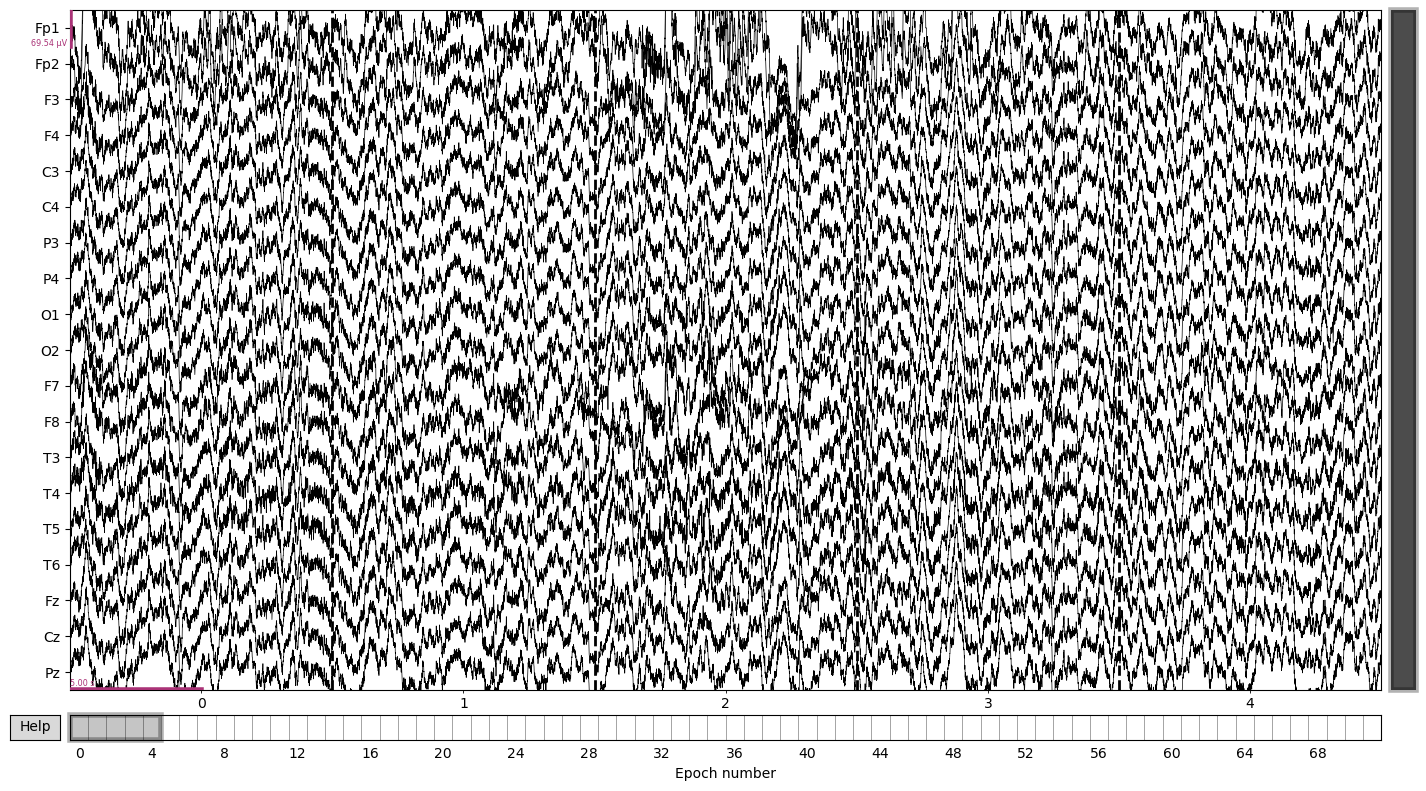

In [3]:
import mne
import matplotlib.pyplot as plt  # Import to control figure size

# Path to the raw EEG file
file_path = r"C:\Semesters\Sem5\BMSP\Project\segmented_data\sub-001_epochs.fif"  # Update the path

# Load the epochs file
epochs = mne.read_epochs(file_path)

# Plot the first 5 epochs and 19 channels
fig = epochs.plot(n_epochs=5, n_channels=19, scalings='auto', title='EEG Epochs', show=False)

# Adjust the size of the figure (width=15 inches, height=8 inches)
fig.set_size_inches(15, 8)

# Display the plot
plt.show()


In [25]:
import mne
import pywt
import numpy as np
import os

# Path to the folder containing segmented epochs
epoch_folder = r"C:\Semesters\Sem5\BMSP\Project\segmented_data"  # Update this path
output_folder = r"C:\Semesters\Sem5\BMSP\Project\dwt_coeffs"  # Folder to save DWT coefficients

# Make sure the output folder exists
os.makedirs(output_folder, exist_ok=True)

# Define the wavelet to use (e.g., 'db4' is common for EEG data)
wavelet_name = 'db4'

# Iterate through segmented EEG files
for i in range(1, 89):  # Assuming file names follow 'sub-001_epochs.fif' format
    file_path = os.path.join(epoch_folder, f'sub-{i:03d}_epochs.fif')
    
    try:
        # Load the epochs
        epochs = mne.read_epochs(file_path, preload=True)
    except Exception as e:
        print(f"Error loading {file_path}: {e}")
        continue

    # Get the data as a NumPy array (shape: [n_epochs, n_channels, n_times])
    data = epochs.get_data()
    n_epochs, n_channels, n_times = data.shape

    # Initialize a list to store the DWT coefficients for all epochs and channels
    all_dwt_coeffs = []

    # Iterate over epochs and channels to compute DWT coefficients
    for epoch in range(n_epochs):
        epoch_coeffs = []
        for ch in range(n_channels):
            # Perform DWT on the signal of the current channel in the epoch
            coeffs = pywt.wavedec(data[epoch, ch, :], wavelet_name, level=4)  # Specify level for DWT
            epoch_coeffs.append(coeffs)
        all_dwt_coeffs.append(epoch_coeffs)

    # Determine the maximum length of coefficients for each channel
    max_lengths = [max(len(epoch[ch]) for epoch in all_dwt_coeffs) for ch in range(n_channels)]

    # Initialize a new list to store padded DWT coefficients
    padded_dwt_coeffs = []

    # Pad the coefficients to the maximum length
    for epoch_coeffs in all_dwt_coeffs:
        padded_epoch_coeffs = []
        for ch in range(n_channels):
            coeffs = epoch_coeffs[ch]
            if coeffs is not None:
                current_length = len(coeffs)
                max_length = max_lengths[ch]

                # Check if padding is needed
                if current_length < max_length:
                    # Pad with zeros to the maximum length for this channel
                    padded_coeffs = np.pad(coeffs, (0, max_length - current_length), mode='constant')
                else:
                    # If current length is greater than or equal to max length, truncate
                    padded_coeffs = coeffs[:max_length]

                padded_epoch_coeffs.append(padded_coeffs)
            else:
                # Handle the case where coeffs is None
                padded_epoch_coeffs.append(np.zeros(max_lengths[ch]))  # or handle appropriately
        padded_dwt_coeffs.append(padded_epoch_coeffs)

    # Convert the padded DWT coefficients to a NumPy array before saving
    padded_dwt_coeffs_array = np.array(padded_dwt_coeffs, dtype=object)  # Use dtype=object to handle inhomogeneous shapes

    # Save the padded DWT coefficients as a NumPy file for further processing
    np.save(os.path.join(output_folder, f'sub-{i:03d}_dwt_coeffs.npy'), padded_dwt_coeffs_array)

    print(f"Saved DWT coefficients for subject {i:03d}")


Reading C:\Semesters\Sem5\BMSP\Project\segmented_data\sub-001_epochs.fif ...
    Found the data of interest:
        t =       0.00 ...    9998.00 ms
        0 CTF compensation matrices available


C:\Users\kriti\AppData\Local\Temp\ipykernel_6288\1689759408.py:22: RuntimeWarning: This filename (C:\Semesters\Sem5\BMSP\Project\segmented_data\sub-001_epochs.fif) does not conform to MNE naming conventions. All epochs files should end with -epo.fif, -epo.fif.gz, _epo.fif or _epo.fif.gz
  epochs = mne.read_epochs(file_path, preload=True)


Not setting metadata
72 matching events found
No baseline correction applied
0 projection items activated
Saved DWT coefficients for subject 001
Reading C:\Semesters\Sem5\BMSP\Project\segmented_data\sub-002_epochs.fif ...
    Found the data of interest:
        t =       0.00 ...    9998.00 ms
        0 CTF compensation matrices available


C:\Users\kriti\AppData\Local\Temp\ipykernel_6288\1689759408.py:22: RuntimeWarning: This filename (C:\Semesters\Sem5\BMSP\Project\segmented_data\sub-002_epochs.fif) does not conform to MNE naming conventions. All epochs files should end with -epo.fif, -epo.fif.gz, _epo.fif or _epo.fif.gz
  epochs = mne.read_epochs(file_path, preload=True)


Not setting metadata
72 matching events found
No baseline correction applied
0 projection items activated
Saved DWT coefficients for subject 002
Reading C:\Semesters\Sem5\BMSP\Project\segmented_data\sub-003_epochs.fif ...
    Found the data of interest:
        t =       0.00 ...    9998.00 ms
        0 CTF compensation matrices available
Not setting metadata


C:\Users\kriti\AppData\Local\Temp\ipykernel_6288\1689759408.py:22: RuntimeWarning: This filename (C:\Semesters\Sem5\BMSP\Project\segmented_data\sub-003_epochs.fif) does not conform to MNE naming conventions. All epochs files should end with -epo.fif, -epo.fif.gz, _epo.fif or _epo.fif.gz
  epochs = mne.read_epochs(file_path, preload=True)


72 matching events found
No baseline correction applied
0 projection items activated
Saved DWT coefficients for subject 003
Reading C:\Semesters\Sem5\BMSP\Project\segmented_data\sub-004_epochs.fif ...
    Found the data of interest:
        t =       0.00 ...    9998.00 ms
        0 CTF compensation matrices available
Not setting metadata


C:\Users\kriti\AppData\Local\Temp\ipykernel_6288\1689759408.py:22: RuntimeWarning: This filename (C:\Semesters\Sem5\BMSP\Project\segmented_data\sub-004_epochs.fif) does not conform to MNE naming conventions. All epochs files should end with -epo.fif, -epo.fif.gz, _epo.fif or _epo.fif.gz
  epochs = mne.read_epochs(file_path, preload=True)


72 matching events found
No baseline correction applied
0 projection items activated
Saved DWT coefficients for subject 004
Reading C:\Semesters\Sem5\BMSP\Project\segmented_data\sub-005_epochs.fif ...
    Found the data of interest:
        t =       0.00 ...    9998.00 ms
        0 CTF compensation matrices available
Not setting metadata


C:\Users\kriti\AppData\Local\Temp\ipykernel_6288\1689759408.py:22: RuntimeWarning: This filename (C:\Semesters\Sem5\BMSP\Project\segmented_data\sub-005_epochs.fif) does not conform to MNE naming conventions. All epochs files should end with -epo.fif, -epo.fif.gz, _epo.fif or _epo.fif.gz
  epochs = mne.read_epochs(file_path, preload=True)


72 matching events found
No baseline correction applied
0 projection items activated
Saved DWT coefficients for subject 005
Reading C:\Semesters\Sem5\BMSP\Project\segmented_data\sub-006_epochs.fif ...
    Found the data of interest:
        t =       0.00 ...    9998.00 ms
        0 CTF compensation matrices available


C:\Users\kriti\AppData\Local\Temp\ipykernel_6288\1689759408.py:22: RuntimeWarning: This filename (C:\Semesters\Sem5\BMSP\Project\segmented_data\sub-006_epochs.fif) does not conform to MNE naming conventions. All epochs files should end with -epo.fif, -epo.fif.gz, _epo.fif or _epo.fif.gz
  epochs = mne.read_epochs(file_path, preload=True)


Not setting metadata
72 matching events found
No baseline correction applied
0 projection items activated
Saved DWT coefficients for subject 006
Reading C:\Semesters\Sem5\BMSP\Project\segmented_data\sub-007_epochs.fif ...
    Found the data of interest:
        t =       0.00 ...    9998.00 ms
        0 CTF compensation matrices available
Not setting metadata


C:\Users\kriti\AppData\Local\Temp\ipykernel_6288\1689759408.py:22: RuntimeWarning: This filename (C:\Semesters\Sem5\BMSP\Project\segmented_data\sub-007_epochs.fif) does not conform to MNE naming conventions. All epochs files should end with -epo.fif, -epo.fif.gz, _epo.fif or _epo.fif.gz
  epochs = mne.read_epochs(file_path, preload=True)


72 matching events found
No baseline correction applied
0 projection items activated
Saved DWT coefficients for subject 007
Reading C:\Semesters\Sem5\BMSP\Project\segmented_data\sub-008_epochs.fif ...
    Found the data of interest:
        t =       0.00 ...    9998.00 ms
        0 CTF compensation matrices available


C:\Users\kriti\AppData\Local\Temp\ipykernel_6288\1689759408.py:22: RuntimeWarning: This filename (C:\Semesters\Sem5\BMSP\Project\segmented_data\sub-008_epochs.fif) does not conform to MNE naming conventions. All epochs files should end with -epo.fif, -epo.fif.gz, _epo.fif or _epo.fif.gz
  epochs = mne.read_epochs(file_path, preload=True)


Not setting metadata
72 matching events found
No baseline correction applied
0 projection items activated
Saved DWT coefficients for subject 008
Reading C:\Semesters\Sem5\BMSP\Project\segmented_data\sub-009_epochs.fif ...
    Found the data of interest:
        t =       0.00 ...    9998.00 ms
        0 CTF compensation matrices available


C:\Users\kriti\AppData\Local\Temp\ipykernel_6288\1689759408.py:22: RuntimeWarning: This filename (C:\Semesters\Sem5\BMSP\Project\segmented_data\sub-009_epochs.fif) does not conform to MNE naming conventions. All epochs files should end with -epo.fif, -epo.fif.gz, _epo.fif or _epo.fif.gz
  epochs = mne.read_epochs(file_path, preload=True)


Not setting metadata
72 matching events found
No baseline correction applied
0 projection items activated
Saved DWT coefficients for subject 009
Reading C:\Semesters\Sem5\BMSP\Project\segmented_data\sub-010_epochs.fif ...
    Found the data of interest:
        t =       0.00 ...    9998.00 ms
        0 CTF compensation matrices available
Not setting metadata
72 matching events found


C:\Users\kriti\AppData\Local\Temp\ipykernel_6288\1689759408.py:22: RuntimeWarning: This filename (C:\Semesters\Sem5\BMSP\Project\segmented_data\sub-010_epochs.fif) does not conform to MNE naming conventions. All epochs files should end with -epo.fif, -epo.fif.gz, _epo.fif or _epo.fif.gz
  epochs = mne.read_epochs(file_path, preload=True)


No baseline correction applied
0 projection items activated
Saved DWT coefficients for subject 010
Reading C:\Semesters\Sem5\BMSP\Project\segmented_data\sub-011_epochs.fif ...
    Found the data of interest:
        t =       0.00 ...    9998.00 ms
        0 CTF compensation matrices available
Not setting metadata
72 matching events found


C:\Users\kriti\AppData\Local\Temp\ipykernel_6288\1689759408.py:22: RuntimeWarning: This filename (C:\Semesters\Sem5\BMSP\Project\segmented_data\sub-011_epochs.fif) does not conform to MNE naming conventions. All epochs files should end with -epo.fif, -epo.fif.gz, _epo.fif or _epo.fif.gz
  epochs = mne.read_epochs(file_path, preload=True)


No baseline correction applied
0 projection items activated
Saved DWT coefficients for subject 011
Reading C:\Semesters\Sem5\BMSP\Project\segmented_data\sub-012_epochs.fif ...
    Found the data of interest:
        t =       0.00 ...    9998.00 ms
        0 CTF compensation matrices available
Not setting metadata
72 matching events found


C:\Users\kriti\AppData\Local\Temp\ipykernel_6288\1689759408.py:22: RuntimeWarning: This filename (C:\Semesters\Sem5\BMSP\Project\segmented_data\sub-012_epochs.fif) does not conform to MNE naming conventions. All epochs files should end with -epo.fif, -epo.fif.gz, _epo.fif or _epo.fif.gz
  epochs = mne.read_epochs(file_path, preload=True)


No baseline correction applied
0 projection items activated
Saved DWT coefficients for subject 012
Reading C:\Semesters\Sem5\BMSP\Project\segmented_data\sub-013_epochs.fif ...
    Found the data of interest:
        t =       0.00 ...    9998.00 ms
        0 CTF compensation matrices available
Not setting metadata
72 matching events found
No baseline correction applied
0 projection items activated


C:\Users\kriti\AppData\Local\Temp\ipykernel_6288\1689759408.py:22: RuntimeWarning: This filename (C:\Semesters\Sem5\BMSP\Project\segmented_data\sub-013_epochs.fif) does not conform to MNE naming conventions. All epochs files should end with -epo.fif, -epo.fif.gz, _epo.fif or _epo.fif.gz
  epochs = mne.read_epochs(file_path, preload=True)


Saved DWT coefficients for subject 013
Reading C:\Semesters\Sem5\BMSP\Project\segmented_data\sub-014_epochs.fif ...
    Found the data of interest:
        t =       0.00 ...    9998.00 ms
        0 CTF compensation matrices available
Not setting metadata
72 matching events found
No baseline correction applied
0 projection items activated


C:\Users\kriti\AppData\Local\Temp\ipykernel_6288\1689759408.py:22: RuntimeWarning: This filename (C:\Semesters\Sem5\BMSP\Project\segmented_data\sub-014_epochs.fif) does not conform to MNE naming conventions. All epochs files should end with -epo.fif, -epo.fif.gz, _epo.fif or _epo.fif.gz
  epochs = mne.read_epochs(file_path, preload=True)


Saved DWT coefficients for subject 014
Reading C:\Semesters\Sem5\BMSP\Project\segmented_data\sub-015_epochs.fif ...
    Found the data of interest:
        t =       0.00 ...    9998.00 ms
        0 CTF compensation matrices available
Not setting metadata
72 matching events found


C:\Users\kriti\AppData\Local\Temp\ipykernel_6288\1689759408.py:22: RuntimeWarning: This filename (C:\Semesters\Sem5\BMSP\Project\segmented_data\sub-015_epochs.fif) does not conform to MNE naming conventions. All epochs files should end with -epo.fif, -epo.fif.gz, _epo.fif or _epo.fif.gz
  epochs = mne.read_epochs(file_path, preload=True)


No baseline correction applied
0 projection items activated
Saved DWT coefficients for subject 015
Reading C:\Semesters\Sem5\BMSP\Project\segmented_data\sub-016_epochs.fif ...
    Found the data of interest:
        t =       0.00 ...    9998.00 ms
        0 CTF compensation matrices available
Not setting metadata
72 matching events found
No baseline correction applied
0 projection items activated


C:\Users\kriti\AppData\Local\Temp\ipykernel_6288\1689759408.py:22: RuntimeWarning: This filename (C:\Semesters\Sem5\BMSP\Project\segmented_data\sub-016_epochs.fif) does not conform to MNE naming conventions. All epochs files should end with -epo.fif, -epo.fif.gz, _epo.fif or _epo.fif.gz
  epochs = mne.read_epochs(file_path, preload=True)


Saved DWT coefficients for subject 016
Reading C:\Semesters\Sem5\BMSP\Project\segmented_data\sub-017_epochs.fif ...
    Found the data of interest:
        t =       0.00 ...    9998.00 ms
        0 CTF compensation matrices available


C:\Users\kriti\AppData\Local\Temp\ipykernel_6288\1689759408.py:22: RuntimeWarning: This filename (C:\Semesters\Sem5\BMSP\Project\segmented_data\sub-017_epochs.fif) does not conform to MNE naming conventions. All epochs files should end with -epo.fif, -epo.fif.gz, _epo.fif or _epo.fif.gz
  epochs = mne.read_epochs(file_path, preload=True)


Not setting metadata
72 matching events found
No baseline correction applied
0 projection items activated
Saved DWT coefficients for subject 017
Reading C:\Semesters\Sem5\BMSP\Project\segmented_data\sub-018_epochs.fif ...
    Found the data of interest:
        t =       0.00 ...    9998.00 ms
        0 CTF compensation matrices available


C:\Users\kriti\AppData\Local\Temp\ipykernel_6288\1689759408.py:22: RuntimeWarning: This filename (C:\Semesters\Sem5\BMSP\Project\segmented_data\sub-018_epochs.fif) does not conform to MNE naming conventions. All epochs files should end with -epo.fif, -epo.fif.gz, _epo.fif or _epo.fif.gz
  epochs = mne.read_epochs(file_path, preload=True)


Not setting metadata
72 matching events found
No baseline correction applied
0 projection items activated
Saved DWT coefficients for subject 018
Reading C:\Semesters\Sem5\BMSP\Project\segmented_data\sub-019_epochs.fif ...
    Found the data of interest:
        t =       0.00 ...    9998.00 ms
        0 CTF compensation matrices available
Not setting metadata
72 matching events found
No baseline correction applied
0 projection items activated


C:\Users\kriti\AppData\Local\Temp\ipykernel_6288\1689759408.py:22: RuntimeWarning: This filename (C:\Semesters\Sem5\BMSP\Project\segmented_data\sub-019_epochs.fif) does not conform to MNE naming conventions. All epochs files should end with -epo.fif, -epo.fif.gz, _epo.fif or _epo.fif.gz
  epochs = mne.read_epochs(file_path, preload=True)


Saved DWT coefficients for subject 019
Reading C:\Semesters\Sem5\BMSP\Project\segmented_data\sub-020_epochs.fif ...
    Found the data of interest:
        t =       0.00 ...    9998.00 ms
        0 CTF compensation matrices available
Not setting metadata


C:\Users\kriti\AppData\Local\Temp\ipykernel_6288\1689759408.py:22: RuntimeWarning: This filename (C:\Semesters\Sem5\BMSP\Project\segmented_data\sub-020_epochs.fif) does not conform to MNE naming conventions. All epochs files should end with -epo.fif, -epo.fif.gz, _epo.fif or _epo.fif.gz
  epochs = mne.read_epochs(file_path, preload=True)


72 matching events found
No baseline correction applied
0 projection items activated
Saved DWT coefficients for subject 020
Reading C:\Semesters\Sem5\BMSP\Project\segmented_data\sub-021_epochs.fif ...
    Found the data of interest:
        t =       0.00 ...    9998.00 ms
        0 CTF compensation matrices available
Not setting metadata
72 matching events found


C:\Users\kriti\AppData\Local\Temp\ipykernel_6288\1689759408.py:22: RuntimeWarning: This filename (C:\Semesters\Sem5\BMSP\Project\segmented_data\sub-021_epochs.fif) does not conform to MNE naming conventions. All epochs files should end with -epo.fif, -epo.fif.gz, _epo.fif or _epo.fif.gz
  epochs = mne.read_epochs(file_path, preload=True)


No baseline correction applied
0 projection items activated
Saved DWT coefficients for subject 021
Reading C:\Semesters\Sem5\BMSP\Project\segmented_data\sub-022_epochs.fif ...
    Found the data of interest:
        t =       0.00 ...    9998.00 ms
        0 CTF compensation matrices available
Not setting metadata
72 matching events found


C:\Users\kriti\AppData\Local\Temp\ipykernel_6288\1689759408.py:22: RuntimeWarning: This filename (C:\Semesters\Sem5\BMSP\Project\segmented_data\sub-022_epochs.fif) does not conform to MNE naming conventions. All epochs files should end with -epo.fif, -epo.fif.gz, _epo.fif or _epo.fif.gz
  epochs = mne.read_epochs(file_path, preload=True)


No baseline correction applied
0 projection items activated
Saved DWT coefficients for subject 022
Reading C:\Semesters\Sem5\BMSP\Project\segmented_data\sub-023_epochs.fif ...
    Found the data of interest:
        t =       0.00 ...    9998.00 ms
        0 CTF compensation matrices available
Not setting metadata
72 matching events found
No baseline correction applied
0 projection items activated


C:\Users\kriti\AppData\Local\Temp\ipykernel_6288\1689759408.py:22: RuntimeWarning: This filename (C:\Semesters\Sem5\BMSP\Project\segmented_data\sub-023_epochs.fif) does not conform to MNE naming conventions. All epochs files should end with -epo.fif, -epo.fif.gz, _epo.fif or _epo.fif.gz
  epochs = mne.read_epochs(file_path, preload=True)


Saved DWT coefficients for subject 023
Reading C:\Semesters\Sem5\BMSP\Project\segmented_data\sub-024_epochs.fif ...
    Found the data of interest:
        t =       0.00 ...    9998.00 ms
        0 CTF compensation matrices available
Not setting metadata
72 matching events found
No baseline correction applied
0 projection items activated


C:\Users\kriti\AppData\Local\Temp\ipykernel_6288\1689759408.py:22: RuntimeWarning: This filename (C:\Semesters\Sem5\BMSP\Project\segmented_data\sub-024_epochs.fif) does not conform to MNE naming conventions. All epochs files should end with -epo.fif, -epo.fif.gz, _epo.fif or _epo.fif.gz
  epochs = mne.read_epochs(file_path, preload=True)


Saved DWT coefficients for subject 024
Reading C:\Semesters\Sem5\BMSP\Project\segmented_data\sub-025_epochs.fif ...
    Found the data of interest:
        t =       0.00 ...    9998.00 ms
        0 CTF compensation matrices available
Not setting metadata
72 matching events found
No baseline correction applied
0 projection items activated


C:\Users\kriti\AppData\Local\Temp\ipykernel_6288\1689759408.py:22: RuntimeWarning: This filename (C:\Semesters\Sem5\BMSP\Project\segmented_data\sub-025_epochs.fif) does not conform to MNE naming conventions. All epochs files should end with -epo.fif, -epo.fif.gz, _epo.fif or _epo.fif.gz
  epochs = mne.read_epochs(file_path, preload=True)


Saved DWT coefficients for subject 025
Reading C:\Semesters\Sem5\BMSP\Project\segmented_data\sub-026_epochs.fif ...
    Found the data of interest:
        t =       0.00 ...    9998.00 ms
        0 CTF compensation matrices available
Not setting metadata
72 matching events found


C:\Users\kriti\AppData\Local\Temp\ipykernel_6288\1689759408.py:22: RuntimeWarning: This filename (C:\Semesters\Sem5\BMSP\Project\segmented_data\sub-026_epochs.fif) does not conform to MNE naming conventions. All epochs files should end with -epo.fif, -epo.fif.gz, _epo.fif or _epo.fif.gz
  epochs = mne.read_epochs(file_path, preload=True)


No baseline correction applied
0 projection items activated
Saved DWT coefficients for subject 026
Reading C:\Semesters\Sem5\BMSP\Project\segmented_data\sub-027_epochs.fif ...
    Found the data of interest:
        t =       0.00 ...    9998.00 ms
        0 CTF compensation matrices available
Not setting metadata
72 matching events found
No baseline correction applied
0 projection items activated


C:\Users\kriti\AppData\Local\Temp\ipykernel_6288\1689759408.py:22: RuntimeWarning: This filename (C:\Semesters\Sem5\BMSP\Project\segmented_data\sub-027_epochs.fif) does not conform to MNE naming conventions. All epochs files should end with -epo.fif, -epo.fif.gz, _epo.fif or _epo.fif.gz
  epochs = mne.read_epochs(file_path, preload=True)


Saved DWT coefficients for subject 027
Reading C:\Semesters\Sem5\BMSP\Project\segmented_data\sub-028_epochs.fif ...
    Found the data of interest:
        t =       0.00 ...    9998.00 ms
        0 CTF compensation matrices available
Not setting metadata
72 matching events found
No baseline correction applied
0 projection items activated


C:\Users\kriti\AppData\Local\Temp\ipykernel_6288\1689759408.py:22: RuntimeWarning: This filename (C:\Semesters\Sem5\BMSP\Project\segmented_data\sub-028_epochs.fif) does not conform to MNE naming conventions. All epochs files should end with -epo.fif, -epo.fif.gz, _epo.fif or _epo.fif.gz
  epochs = mne.read_epochs(file_path, preload=True)


Saved DWT coefficients for subject 028
Reading C:\Semesters\Sem5\BMSP\Project\segmented_data\sub-029_epochs.fif ...
    Found the data of interest:
        t =       0.00 ...    9998.00 ms
        0 CTF compensation matrices available


C:\Users\kriti\AppData\Local\Temp\ipykernel_6288\1689759408.py:22: RuntimeWarning: This filename (C:\Semesters\Sem5\BMSP\Project\segmented_data\sub-029_epochs.fif) does not conform to MNE naming conventions. All epochs files should end with -epo.fif, -epo.fif.gz, _epo.fif or _epo.fif.gz
  epochs = mne.read_epochs(file_path, preload=True)


Not setting metadata
72 matching events found
No baseline correction applied
0 projection items activated
Saved DWT coefficients for subject 029
Reading C:\Semesters\Sem5\BMSP\Project\segmented_data\sub-030_epochs.fif ...
    Found the data of interest:
        t =       0.00 ...    9998.00 ms
        0 CTF compensation matrices available
Not setting metadata
72 matching events found
No baseline correction applied
0 projection items activated


C:\Users\kriti\AppData\Local\Temp\ipykernel_6288\1689759408.py:22: RuntimeWarning: This filename (C:\Semesters\Sem5\BMSP\Project\segmented_data\sub-030_epochs.fif) does not conform to MNE naming conventions. All epochs files should end with -epo.fif, -epo.fif.gz, _epo.fif or _epo.fif.gz
  epochs = mne.read_epochs(file_path, preload=True)


Saved DWT coefficients for subject 030
Reading C:\Semesters\Sem5\BMSP\Project\segmented_data\sub-031_epochs.fif ...
    Found the data of interest:
        t =       0.00 ...    9998.00 ms
        0 CTF compensation matrices available
Not setting metadata
72 matching events found
No baseline correction applied
0 projection items activated


C:\Users\kriti\AppData\Local\Temp\ipykernel_6288\1689759408.py:22: RuntimeWarning: This filename (C:\Semesters\Sem5\BMSP\Project\segmented_data\sub-031_epochs.fif) does not conform to MNE naming conventions. All epochs files should end with -epo.fif, -epo.fif.gz, _epo.fif or _epo.fif.gz
  epochs = mne.read_epochs(file_path, preload=True)


Saved DWT coefficients for subject 031
Reading C:\Semesters\Sem5\BMSP\Project\segmented_data\sub-032_epochs.fif ...
    Found the data of interest:
        t =       0.00 ...    9998.00 ms
        0 CTF compensation matrices available
Not setting metadata
72 matching events found
No baseline correction applied
0 projection items activated


C:\Users\kriti\AppData\Local\Temp\ipykernel_6288\1689759408.py:22: RuntimeWarning: This filename (C:\Semesters\Sem5\BMSP\Project\segmented_data\sub-032_epochs.fif) does not conform to MNE naming conventions. All epochs files should end with -epo.fif, -epo.fif.gz, _epo.fif or _epo.fif.gz
  epochs = mne.read_epochs(file_path, preload=True)


Saved DWT coefficients for subject 032
Reading C:\Semesters\Sem5\BMSP\Project\segmented_data\sub-033_epochs.fif ...
    Found the data of interest:
        t =       0.00 ...    9998.00 ms
        0 CTF compensation matrices available
Not setting metadata
72 matching events found
No baseline correction applied
0 projection items activated


C:\Users\kriti\AppData\Local\Temp\ipykernel_6288\1689759408.py:22: RuntimeWarning: This filename (C:\Semesters\Sem5\BMSP\Project\segmented_data\sub-033_epochs.fif) does not conform to MNE naming conventions. All epochs files should end with -epo.fif, -epo.fif.gz, _epo.fif or _epo.fif.gz
  epochs = mne.read_epochs(file_path, preload=True)


Saved DWT coefficients for subject 033
Reading C:\Semesters\Sem5\BMSP\Project\segmented_data\sub-034_epochs.fif ...
    Found the data of interest:
        t =       0.00 ...    9998.00 ms
        0 CTF compensation matrices available
Not setting metadata
72 matching events found
No baseline correction applied
0 projection items activated


C:\Users\kriti\AppData\Local\Temp\ipykernel_6288\1689759408.py:22: RuntimeWarning: This filename (C:\Semesters\Sem5\BMSP\Project\segmented_data\sub-034_epochs.fif) does not conform to MNE naming conventions. All epochs files should end with -epo.fif, -epo.fif.gz, _epo.fif or _epo.fif.gz
  epochs = mne.read_epochs(file_path, preload=True)


Saved DWT coefficients for subject 034
Reading C:\Semesters\Sem5\BMSP\Project\segmented_data\sub-035_epochs.fif ...
    Found the data of interest:
        t =       0.00 ...    9998.00 ms
        0 CTF compensation matrices available
Not setting metadata
72 matching events found
No baseline correction applied
0 projection items activated


C:\Users\kriti\AppData\Local\Temp\ipykernel_6288\1689759408.py:22: RuntimeWarning: This filename (C:\Semesters\Sem5\BMSP\Project\segmented_data\sub-035_epochs.fif) does not conform to MNE naming conventions. All epochs files should end with -epo.fif, -epo.fif.gz, _epo.fif or _epo.fif.gz
  epochs = mne.read_epochs(file_path, preload=True)


Saved DWT coefficients for subject 035
Reading C:\Semesters\Sem5\BMSP\Project\segmented_data\sub-036_epochs.fif ...
    Found the data of interest:
        t =       0.00 ...    9998.00 ms
        0 CTF compensation matrices available


C:\Users\kriti\AppData\Local\Temp\ipykernel_6288\1689759408.py:22: RuntimeWarning: This filename (C:\Semesters\Sem5\BMSP\Project\segmented_data\sub-036_epochs.fif) does not conform to MNE naming conventions. All epochs files should end with -epo.fif, -epo.fif.gz, _epo.fif or _epo.fif.gz
  epochs = mne.read_epochs(file_path, preload=True)


Not setting metadata
72 matching events found
No baseline correction applied
0 projection items activated
Saved DWT coefficients for subject 036
Reading C:\Semesters\Sem5\BMSP\Project\segmented_data\sub-037_epochs.fif ...
    Found the data of interest:
        t =       0.00 ...    9998.00 ms
        0 CTF compensation matrices available
Not setting metadata
72 matching events found
No baseline correction applied
0 projection items activated


C:\Users\kriti\AppData\Local\Temp\ipykernel_6288\1689759408.py:22: RuntimeWarning: This filename (C:\Semesters\Sem5\BMSP\Project\segmented_data\sub-037_epochs.fif) does not conform to MNE naming conventions. All epochs files should end with -epo.fif, -epo.fif.gz, _epo.fif or _epo.fif.gz
  epochs = mne.read_epochs(file_path, preload=True)


Saved DWT coefficients for subject 037
Reading C:\Semesters\Sem5\BMSP\Project\segmented_data\sub-038_epochs.fif ...
    Found the data of interest:
        t =       0.00 ...    9998.00 ms
        0 CTF compensation matrices available
Not setting metadata
72 matching events found
No baseline correction applied
0 projection items activated


C:\Users\kriti\AppData\Local\Temp\ipykernel_6288\1689759408.py:22: RuntimeWarning: This filename (C:\Semesters\Sem5\BMSP\Project\segmented_data\sub-038_epochs.fif) does not conform to MNE naming conventions. All epochs files should end with -epo.fif, -epo.fif.gz, _epo.fif or _epo.fif.gz
  epochs = mne.read_epochs(file_path, preload=True)


Saved DWT coefficients for subject 038
Reading C:\Semesters\Sem5\BMSP\Project\segmented_data\sub-039_epochs.fif ...
    Found the data of interest:
        t =       0.00 ...    9998.00 ms
        0 CTF compensation matrices available
Not setting metadata
72 matching events found
No baseline correction applied
0 projection items activated


C:\Users\kriti\AppData\Local\Temp\ipykernel_6288\1689759408.py:22: RuntimeWarning: This filename (C:\Semesters\Sem5\BMSP\Project\segmented_data\sub-039_epochs.fif) does not conform to MNE naming conventions. All epochs files should end with -epo.fif, -epo.fif.gz, _epo.fif or _epo.fif.gz
  epochs = mne.read_epochs(file_path, preload=True)


Saved DWT coefficients for subject 039
Reading C:\Semesters\Sem5\BMSP\Project\segmented_data\sub-040_epochs.fif ...
    Found the data of interest:
        t =       0.00 ...    9998.00 ms
        0 CTF compensation matrices available
Not setting metadata


C:\Users\kriti\AppData\Local\Temp\ipykernel_6288\1689759408.py:22: RuntimeWarning: This filename (C:\Semesters\Sem5\BMSP\Project\segmented_data\sub-040_epochs.fif) does not conform to MNE naming conventions. All epochs files should end with -epo.fif, -epo.fif.gz, _epo.fif or _epo.fif.gz
  epochs = mne.read_epochs(file_path, preload=True)


72 matching events found
No baseline correction applied
0 projection items activated
Saved DWT coefficients for subject 040
Reading C:\Semesters\Sem5\BMSP\Project\segmented_data\sub-041_epochs.fif ...
    Found the data of interest:
        t =       0.00 ...    9998.00 ms
        0 CTF compensation matrices available
Not setting metadata
72 matching events found
No baseline correction applied
0 projection items activated


C:\Users\kriti\AppData\Local\Temp\ipykernel_6288\1689759408.py:22: RuntimeWarning: This filename (C:\Semesters\Sem5\BMSP\Project\segmented_data\sub-041_epochs.fif) does not conform to MNE naming conventions. All epochs files should end with -epo.fif, -epo.fif.gz, _epo.fif or _epo.fif.gz
  epochs = mne.read_epochs(file_path, preload=True)


Saved DWT coefficients for subject 041
Reading C:\Semesters\Sem5\BMSP\Project\segmented_data\sub-042_epochs.fif ...
    Found the data of interest:
        t =       0.00 ...    9998.00 ms
        0 CTF compensation matrices available
Not setting metadata


C:\Users\kriti\AppData\Local\Temp\ipykernel_6288\1689759408.py:22: RuntimeWarning: This filename (C:\Semesters\Sem5\BMSP\Project\segmented_data\sub-042_epochs.fif) does not conform to MNE naming conventions. All epochs files should end with -epo.fif, -epo.fif.gz, _epo.fif or _epo.fif.gz
  epochs = mne.read_epochs(file_path, preload=True)


72 matching events found
No baseline correction applied
0 projection items activated
Saved DWT coefficients for subject 042
Reading C:\Semesters\Sem5\BMSP\Project\segmented_data\sub-043_epochs.fif ...
    Found the data of interest:
        t =       0.00 ...    9998.00 ms
        0 CTF compensation matrices available
Not setting metadata
72 matching events found
No baseline correction applied
0 projection items activated


C:\Users\kriti\AppData\Local\Temp\ipykernel_6288\1689759408.py:22: RuntimeWarning: This filename (C:\Semesters\Sem5\BMSP\Project\segmented_data\sub-043_epochs.fif) does not conform to MNE naming conventions. All epochs files should end with -epo.fif, -epo.fif.gz, _epo.fif or _epo.fif.gz
  epochs = mne.read_epochs(file_path, preload=True)


Saved DWT coefficients for subject 043
Reading C:\Semesters\Sem5\BMSP\Project\segmented_data\sub-044_epochs.fif ...
    Found the data of interest:
        t =       0.00 ...    9998.00 ms
        0 CTF compensation matrices available
Not setting metadata


C:\Users\kriti\AppData\Local\Temp\ipykernel_6288\1689759408.py:22: RuntimeWarning: This filename (C:\Semesters\Sem5\BMSP\Project\segmented_data\sub-044_epochs.fif) does not conform to MNE naming conventions. All epochs files should end with -epo.fif, -epo.fif.gz, _epo.fif or _epo.fif.gz
  epochs = mne.read_epochs(file_path, preload=True)


72 matching events found
No baseline correction applied
0 projection items activated
Saved DWT coefficients for subject 044
Reading C:\Semesters\Sem5\BMSP\Project\segmented_data\sub-045_epochs.fif ...
    Found the data of interest:
        t =       0.00 ...    9998.00 ms
        0 CTF compensation matrices available


C:\Users\kriti\AppData\Local\Temp\ipykernel_6288\1689759408.py:22: RuntimeWarning: This filename (C:\Semesters\Sem5\BMSP\Project\segmented_data\sub-045_epochs.fif) does not conform to MNE naming conventions. All epochs files should end with -epo.fif, -epo.fif.gz, _epo.fif or _epo.fif.gz
  epochs = mne.read_epochs(file_path, preload=True)


Not setting metadata
72 matching events found
No baseline correction applied
0 projection items activated
Saved DWT coefficients for subject 045
Reading C:\Semesters\Sem5\BMSP\Project\segmented_data\sub-046_epochs.fif ...
    Found the data of interest:
        t =       0.00 ...    9998.00 ms
        0 CTF compensation matrices available
Not setting metadata
72 matching events found
No baseline correction applied
0 projection items activated


C:\Users\kriti\AppData\Local\Temp\ipykernel_6288\1689759408.py:22: RuntimeWarning: This filename (C:\Semesters\Sem5\BMSP\Project\segmented_data\sub-046_epochs.fif) does not conform to MNE naming conventions. All epochs files should end with -epo.fif, -epo.fif.gz, _epo.fif or _epo.fif.gz
  epochs = mne.read_epochs(file_path, preload=True)


Saved DWT coefficients for subject 046
Reading C:\Semesters\Sem5\BMSP\Project\segmented_data\sub-047_epochs.fif ...
    Found the data of interest:
        t =       0.00 ...    9998.00 ms
        0 CTF compensation matrices available
Not setting metadata
72 matching events found
No baseline correction applied
0 projection items activated


C:\Users\kriti\AppData\Local\Temp\ipykernel_6288\1689759408.py:22: RuntimeWarning: This filename (C:\Semesters\Sem5\BMSP\Project\segmented_data\sub-047_epochs.fif) does not conform to MNE naming conventions. All epochs files should end with -epo.fif, -epo.fif.gz, _epo.fif or _epo.fif.gz
  epochs = mne.read_epochs(file_path, preload=True)


Saved DWT coefficients for subject 047
Reading C:\Semesters\Sem5\BMSP\Project\segmented_data\sub-048_epochs.fif ...
    Found the data of interest:
        t =       0.00 ...    9998.00 ms
        0 CTF compensation matrices available
Not setting metadata
72 matching events found


C:\Users\kriti\AppData\Local\Temp\ipykernel_6288\1689759408.py:22: RuntimeWarning: This filename (C:\Semesters\Sem5\BMSP\Project\segmented_data\sub-048_epochs.fif) does not conform to MNE naming conventions. All epochs files should end with -epo.fif, -epo.fif.gz, _epo.fif or _epo.fif.gz
  epochs = mne.read_epochs(file_path, preload=True)


No baseline correction applied
0 projection items activated
Saved DWT coefficients for subject 048
Reading C:\Semesters\Sem5\BMSP\Project\segmented_data\sub-049_epochs.fif ...
    Found the data of interest:
        t =       0.00 ...    9998.00 ms
        0 CTF compensation matrices available
Not setting metadata
72 matching events found
No baseline correction applied
0 projection items activated


C:\Users\kriti\AppData\Local\Temp\ipykernel_6288\1689759408.py:22: RuntimeWarning: This filename (C:\Semesters\Sem5\BMSP\Project\segmented_data\sub-049_epochs.fif) does not conform to MNE naming conventions. All epochs files should end with -epo.fif, -epo.fif.gz, _epo.fif or _epo.fif.gz
  epochs = mne.read_epochs(file_path, preload=True)


Saved DWT coefficients for subject 049
Reading C:\Semesters\Sem5\BMSP\Project\segmented_data\sub-050_epochs.fif ...
    Found the data of interest:
        t =       0.00 ...    9998.00 ms
        0 CTF compensation matrices available
Not setting metadata
72 matching events found
No baseline correction applied
0 projection items activated


C:\Users\kriti\AppData\Local\Temp\ipykernel_6288\1689759408.py:22: RuntimeWarning: This filename (C:\Semesters\Sem5\BMSP\Project\segmented_data\sub-050_epochs.fif) does not conform to MNE naming conventions. All epochs files should end with -epo.fif, -epo.fif.gz, _epo.fif or _epo.fif.gz
  epochs = mne.read_epochs(file_path, preload=True)


Saved DWT coefficients for subject 050
Reading C:\Semesters\Sem5\BMSP\Project\segmented_data\sub-051_epochs.fif ...
    Found the data of interest:
        t =       0.00 ...    9998.00 ms
        0 CTF compensation matrices available
Not setting metadata
72 matching events found
No baseline correction applied


C:\Users\kriti\AppData\Local\Temp\ipykernel_6288\1689759408.py:22: RuntimeWarning: This filename (C:\Semesters\Sem5\BMSP\Project\segmented_data\sub-051_epochs.fif) does not conform to MNE naming conventions. All epochs files should end with -epo.fif, -epo.fif.gz, _epo.fif or _epo.fif.gz
  epochs = mne.read_epochs(file_path, preload=True)


0 projection items activated
Saved DWT coefficients for subject 051
Reading C:\Semesters\Sem5\BMSP\Project\segmented_data\sub-052_epochs.fif ...
    Found the data of interest:
        t =       0.00 ...    9998.00 ms
        0 CTF compensation matrices available
Not setting metadata
72 matching events found


C:\Users\kriti\AppData\Local\Temp\ipykernel_6288\1689759408.py:22: RuntimeWarning: This filename (C:\Semesters\Sem5\BMSP\Project\segmented_data\sub-052_epochs.fif) does not conform to MNE naming conventions. All epochs files should end with -epo.fif, -epo.fif.gz, _epo.fif or _epo.fif.gz
  epochs = mne.read_epochs(file_path, preload=True)


No baseline correction applied
0 projection items activated
Saved DWT coefficients for subject 052
Reading C:\Semesters\Sem5\BMSP\Project\segmented_data\sub-053_epochs.fif ...
    Found the data of interest:
        t =       0.00 ...    9998.00 ms
        0 CTF compensation matrices available
Not setting metadata
72 matching events found
No baseline correction applied
0 projection items activated


C:\Users\kriti\AppData\Local\Temp\ipykernel_6288\1689759408.py:22: RuntimeWarning: This filename (C:\Semesters\Sem5\BMSP\Project\segmented_data\sub-053_epochs.fif) does not conform to MNE naming conventions. All epochs files should end with -epo.fif, -epo.fif.gz, _epo.fif or _epo.fif.gz
  epochs = mne.read_epochs(file_path, preload=True)


Saved DWT coefficients for subject 053
Reading C:\Semesters\Sem5\BMSP\Project\segmented_data\sub-054_epochs.fif ...
    Found the data of interest:
        t =       0.00 ...    9998.00 ms
        0 CTF compensation matrices available
Not setting metadata
72 matching events found


C:\Users\kriti\AppData\Local\Temp\ipykernel_6288\1689759408.py:22: RuntimeWarning: This filename (C:\Semesters\Sem5\BMSP\Project\segmented_data\sub-054_epochs.fif) does not conform to MNE naming conventions. All epochs files should end with -epo.fif, -epo.fif.gz, _epo.fif or _epo.fif.gz
  epochs = mne.read_epochs(file_path, preload=True)


No baseline correction applied
0 projection items activated
Saved DWT coefficients for subject 054
Reading C:\Semesters\Sem5\BMSP\Project\segmented_data\sub-055_epochs.fif ...
    Found the data of interest:
        t =       0.00 ...    9998.00 ms
        0 CTF compensation matrices available
Not setting metadata


C:\Users\kriti\AppData\Local\Temp\ipykernel_6288\1689759408.py:22: RuntimeWarning: This filename (C:\Semesters\Sem5\BMSP\Project\segmented_data\sub-055_epochs.fif) does not conform to MNE naming conventions. All epochs files should end with -epo.fif, -epo.fif.gz, _epo.fif or _epo.fif.gz
  epochs = mne.read_epochs(file_path, preload=True)


72 matching events found
No baseline correction applied
0 projection items activated
Saved DWT coefficients for subject 055
Reading C:\Semesters\Sem5\BMSP\Project\segmented_data\sub-056_epochs.fif ...
    Found the data of interest:
        t =       0.00 ...    9998.00 ms
        0 CTF compensation matrices available
Not setting metadata
72 matching events found
No baseline correction applied
0 projection items activated


C:\Users\kriti\AppData\Local\Temp\ipykernel_6288\1689759408.py:22: RuntimeWarning: This filename (C:\Semesters\Sem5\BMSP\Project\segmented_data\sub-056_epochs.fif) does not conform to MNE naming conventions. All epochs files should end with -epo.fif, -epo.fif.gz, _epo.fif or _epo.fif.gz
  epochs = mne.read_epochs(file_path, preload=True)


Saved DWT coefficients for subject 056
Reading C:\Semesters\Sem5\BMSP\Project\segmented_data\sub-057_epochs.fif ...
    Found the data of interest:
        t =       0.00 ...    9998.00 ms
        0 CTF compensation matrices available
Not setting metadata
72 matching events found
No baseline correction applied
0 projection items activated


C:\Users\kriti\AppData\Local\Temp\ipykernel_6288\1689759408.py:22: RuntimeWarning: This filename (C:\Semesters\Sem5\BMSP\Project\segmented_data\sub-057_epochs.fif) does not conform to MNE naming conventions. All epochs files should end with -epo.fif, -epo.fif.gz, _epo.fif or _epo.fif.gz
  epochs = mne.read_epochs(file_path, preload=True)


Saved DWT coefficients for subject 057
Reading C:\Semesters\Sem5\BMSP\Project\segmented_data\sub-058_epochs.fif ...
    Found the data of interest:
        t =       0.00 ...    9998.00 ms
        0 CTF compensation matrices available
Not setting metadata
72 matching events found
No baseline correction applied


C:\Users\kriti\AppData\Local\Temp\ipykernel_6288\1689759408.py:22: RuntimeWarning: This filename (C:\Semesters\Sem5\BMSP\Project\segmented_data\sub-058_epochs.fif) does not conform to MNE naming conventions. All epochs files should end with -epo.fif, -epo.fif.gz, _epo.fif or _epo.fif.gz
  epochs = mne.read_epochs(file_path, preload=True)


0 projection items activated
Saved DWT coefficients for subject 058
Reading C:\Semesters\Sem5\BMSP\Project\segmented_data\sub-059_epochs.fif ...
    Found the data of interest:
        t =       0.00 ...    9998.00 ms
        0 CTF compensation matrices available
Not setting metadata
72 matching events found
No baseline correction applied


C:\Users\kriti\AppData\Local\Temp\ipykernel_6288\1689759408.py:22: RuntimeWarning: This filename (C:\Semesters\Sem5\BMSP\Project\segmented_data\sub-059_epochs.fif) does not conform to MNE naming conventions. All epochs files should end with -epo.fif, -epo.fif.gz, _epo.fif or _epo.fif.gz
  epochs = mne.read_epochs(file_path, preload=True)


0 projection items activated
Saved DWT coefficients for subject 059
Reading C:\Semesters\Sem5\BMSP\Project\segmented_data\sub-060_epochs.fif ...
    Found the data of interest:
        t =       0.00 ...    9998.00 ms
        0 CTF compensation matrices available
Not setting metadata
72 matching events found
No baseline correction applied
0 projection items activated


C:\Users\kriti\AppData\Local\Temp\ipykernel_6288\1689759408.py:22: RuntimeWarning: This filename (C:\Semesters\Sem5\BMSP\Project\segmented_data\sub-060_epochs.fif) does not conform to MNE naming conventions. All epochs files should end with -epo.fif, -epo.fif.gz, _epo.fif or _epo.fif.gz
  epochs = mne.read_epochs(file_path, preload=True)


Saved DWT coefficients for subject 060
Reading C:\Semesters\Sem5\BMSP\Project\segmented_data\sub-061_epochs.fif ...
    Found the data of interest:
        t =       0.00 ...    9998.00 ms
        0 CTF compensation matrices available
Not setting metadata
72 matching events found
No baseline correction applied
0 projection items activated


C:\Users\kriti\AppData\Local\Temp\ipykernel_6288\1689759408.py:22: RuntimeWarning: This filename (C:\Semesters\Sem5\BMSP\Project\segmented_data\sub-061_epochs.fif) does not conform to MNE naming conventions. All epochs files should end with -epo.fif, -epo.fif.gz, _epo.fif or _epo.fif.gz
  epochs = mne.read_epochs(file_path, preload=True)


Saved DWT coefficients for subject 061
Reading C:\Semesters\Sem5\BMSP\Project\segmented_data\sub-062_epochs.fif ...
    Found the data of interest:
        t =       0.00 ...    9998.00 ms
        0 CTF compensation matrices available
Not setting metadata
72 matching events found
No baseline correction applied
0 projection items activated


C:\Users\kriti\AppData\Local\Temp\ipykernel_6288\1689759408.py:22: RuntimeWarning: This filename (C:\Semesters\Sem5\BMSP\Project\segmented_data\sub-062_epochs.fif) does not conform to MNE naming conventions. All epochs files should end with -epo.fif, -epo.fif.gz, _epo.fif or _epo.fif.gz
  epochs = mne.read_epochs(file_path, preload=True)


Saved DWT coefficients for subject 062
Reading C:\Semesters\Sem5\BMSP\Project\segmented_data\sub-063_epochs.fif ...
    Found the data of interest:
        t =       0.00 ...    9998.00 ms
        0 CTF compensation matrices available
Not setting metadata
72 matching events found


C:\Users\kriti\AppData\Local\Temp\ipykernel_6288\1689759408.py:22: RuntimeWarning: This filename (C:\Semesters\Sem5\BMSP\Project\segmented_data\sub-063_epochs.fif) does not conform to MNE naming conventions. All epochs files should end with -epo.fif, -epo.fif.gz, _epo.fif or _epo.fif.gz
  epochs = mne.read_epochs(file_path, preload=True)


No baseline correction applied
0 projection items activated
Saved DWT coefficients for subject 063
Reading C:\Semesters\Sem5\BMSP\Project\segmented_data\sub-064_epochs.fif ...
    Found the data of interest:
        t =       0.00 ...    9998.00 ms
        0 CTF compensation matrices available
Not setting metadata
72 matching events found
No baseline correction applied


C:\Users\kriti\AppData\Local\Temp\ipykernel_6288\1689759408.py:22: RuntimeWarning: This filename (C:\Semesters\Sem5\BMSP\Project\segmented_data\sub-064_epochs.fif) does not conform to MNE naming conventions. All epochs files should end with -epo.fif, -epo.fif.gz, _epo.fif or _epo.fif.gz
  epochs = mne.read_epochs(file_path, preload=True)


0 projection items activated
Saved DWT coefficients for subject 064
Reading C:\Semesters\Sem5\BMSP\Project\segmented_data\sub-065_epochs.fif ...
    Found the data of interest:
        t =       0.00 ...    9998.00 ms
        0 CTF compensation matrices available
Not setting metadata
72 matching events found
No baseline correction applied
0 projection items activated


C:\Users\kriti\AppData\Local\Temp\ipykernel_6288\1689759408.py:22: RuntimeWarning: This filename (C:\Semesters\Sem5\BMSP\Project\segmented_data\sub-065_epochs.fif) does not conform to MNE naming conventions. All epochs files should end with -epo.fif, -epo.fif.gz, _epo.fif or _epo.fif.gz
  epochs = mne.read_epochs(file_path, preload=True)


Saved DWT coefficients for subject 065
Reading C:\Semesters\Sem5\BMSP\Project\segmented_data\sub-066_epochs.fif ...
    Found the data of interest:
        t =       0.00 ...    9998.00 ms
        0 CTF compensation matrices available
Not setting metadata
72 matching events found
No baseline correction applied
0 projection items activated


C:\Users\kriti\AppData\Local\Temp\ipykernel_6288\1689759408.py:22: RuntimeWarning: This filename (C:\Semesters\Sem5\BMSP\Project\segmented_data\sub-066_epochs.fif) does not conform to MNE naming conventions. All epochs files should end with -epo.fif, -epo.fif.gz, _epo.fif or _epo.fif.gz
  epochs = mne.read_epochs(file_path, preload=True)


Saved DWT coefficients for subject 066
Reading C:\Semesters\Sem5\BMSP\Project\segmented_data\sub-067_epochs.fif ...
    Found the data of interest:
        t =       0.00 ...    9998.00 ms
        0 CTF compensation matrices available
Not setting metadata
72 matching events found


C:\Users\kriti\AppData\Local\Temp\ipykernel_6288\1689759408.py:22: RuntimeWarning: This filename (C:\Semesters\Sem5\BMSP\Project\segmented_data\sub-067_epochs.fif) does not conform to MNE naming conventions. All epochs files should end with -epo.fif, -epo.fif.gz, _epo.fif or _epo.fif.gz
  epochs = mne.read_epochs(file_path, preload=True)


No baseline correction applied
0 projection items activated
Saved DWT coefficients for subject 067
Reading C:\Semesters\Sem5\BMSP\Project\segmented_data\sub-068_epochs.fif ...
    Found the data of interest:
        t =       0.00 ...    9998.00 ms
        0 CTF compensation matrices available
Not setting metadata
72 matching events found
No baseline correction applied
0 projection items activated


C:\Users\kriti\AppData\Local\Temp\ipykernel_6288\1689759408.py:22: RuntimeWarning: This filename (C:\Semesters\Sem5\BMSP\Project\segmented_data\sub-068_epochs.fif) does not conform to MNE naming conventions. All epochs files should end with -epo.fif, -epo.fif.gz, _epo.fif or _epo.fif.gz
  epochs = mne.read_epochs(file_path, preload=True)


Saved DWT coefficients for subject 068
Reading C:\Semesters\Sem5\BMSP\Project\segmented_data\sub-069_epochs.fif ...
    Found the data of interest:
        t =       0.00 ...    9998.00 ms
        0 CTF compensation matrices available
Not setting metadata
72 matching events found
No baseline correction applied
0 projection items activated


C:\Users\kriti\AppData\Local\Temp\ipykernel_6288\1689759408.py:22: RuntimeWarning: This filename (C:\Semesters\Sem5\BMSP\Project\segmented_data\sub-069_epochs.fif) does not conform to MNE naming conventions. All epochs files should end with -epo.fif, -epo.fif.gz, _epo.fif or _epo.fif.gz
  epochs = mne.read_epochs(file_path, preload=True)


Saved DWT coefficients for subject 069
Reading C:\Semesters\Sem5\BMSP\Project\segmented_data\sub-070_epochs.fif ...
    Found the data of interest:
        t =       0.00 ...    9998.00 ms
        0 CTF compensation matrices available
Not setting metadata
72 matching events found


C:\Users\kriti\AppData\Local\Temp\ipykernel_6288\1689759408.py:22: RuntimeWarning: This filename (C:\Semesters\Sem5\BMSP\Project\segmented_data\sub-070_epochs.fif) does not conform to MNE naming conventions. All epochs files should end with -epo.fif, -epo.fif.gz, _epo.fif or _epo.fif.gz
  epochs = mne.read_epochs(file_path, preload=True)


No baseline correction applied
0 projection items activated
Saved DWT coefficients for subject 070
Reading C:\Semesters\Sem5\BMSP\Project\segmented_data\sub-071_epochs.fif ...
    Found the data of interest:
        t =       0.00 ...    9998.00 ms
        0 CTF compensation matrices available
Not setting metadata


C:\Users\kriti\AppData\Local\Temp\ipykernel_6288\1689759408.py:22: RuntimeWarning: This filename (C:\Semesters\Sem5\BMSP\Project\segmented_data\sub-071_epochs.fif) does not conform to MNE naming conventions. All epochs files should end with -epo.fif, -epo.fif.gz, _epo.fif or _epo.fif.gz
  epochs = mne.read_epochs(file_path, preload=True)


72 matching events found
No baseline correction applied
0 projection items activated
Saved DWT coefficients for subject 071
Reading C:\Semesters\Sem5\BMSP\Project\segmented_data\sub-072_epochs.fif ...
    Found the data of interest:
        t =       0.00 ...    9998.00 ms
        0 CTF compensation matrices available
Not setting metadata


C:\Users\kriti\AppData\Local\Temp\ipykernel_6288\1689759408.py:22: RuntimeWarning: This filename (C:\Semesters\Sem5\BMSP\Project\segmented_data\sub-072_epochs.fif) does not conform to MNE naming conventions. All epochs files should end with -epo.fif, -epo.fif.gz, _epo.fif or _epo.fif.gz
  epochs = mne.read_epochs(file_path, preload=True)


72 matching events found
No baseline correction applied
0 projection items activated
Saved DWT coefficients for subject 072
Reading C:\Semesters\Sem5\BMSP\Project\segmented_data\sub-073_epochs.fif ...
    Found the data of interest:
        t =       0.00 ...    9998.00 ms
        0 CTF compensation matrices available
Not setting metadata
72 matching events found
No baseline correction applied
0 projection items activated


C:\Users\kriti\AppData\Local\Temp\ipykernel_6288\1689759408.py:22: RuntimeWarning: This filename (C:\Semesters\Sem5\BMSP\Project\segmented_data\sub-073_epochs.fif) does not conform to MNE naming conventions. All epochs files should end with -epo.fif, -epo.fif.gz, _epo.fif or _epo.fif.gz
  epochs = mne.read_epochs(file_path, preload=True)


Saved DWT coefficients for subject 073
Reading C:\Semesters\Sem5\BMSP\Project\segmented_data\sub-074_epochs.fif ...
    Found the data of interest:
        t =       0.00 ...    9998.00 ms
        0 CTF compensation matrices available
Not setting metadata
72 matching events found


C:\Users\kriti\AppData\Local\Temp\ipykernel_6288\1689759408.py:22: RuntimeWarning: This filename (C:\Semesters\Sem5\BMSP\Project\segmented_data\sub-074_epochs.fif) does not conform to MNE naming conventions. All epochs files should end with -epo.fif, -epo.fif.gz, _epo.fif or _epo.fif.gz
  epochs = mne.read_epochs(file_path, preload=True)


No baseline correction applied
0 projection items activated
Saved DWT coefficients for subject 074
Reading C:\Semesters\Sem5\BMSP\Project\segmented_data\sub-075_epochs.fif ...
    Found the data of interest:
        t =       0.00 ...    9998.00 ms
        0 CTF compensation matrices available


C:\Users\kriti\AppData\Local\Temp\ipykernel_6288\1689759408.py:22: RuntimeWarning: This filename (C:\Semesters\Sem5\BMSP\Project\segmented_data\sub-075_epochs.fif) does not conform to MNE naming conventions. All epochs files should end with -epo.fif, -epo.fif.gz, _epo.fif or _epo.fif.gz
  epochs = mne.read_epochs(file_path, preload=True)


Not setting metadata
72 matching events found
No baseline correction applied
0 projection items activated
Saved DWT coefficients for subject 075
Reading C:\Semesters\Sem5\BMSP\Project\segmented_data\sub-076_epochs.fif ...
    Found the data of interest:
        t =       0.00 ...    9998.00 ms
        0 CTF compensation matrices available
Not setting metadata
72 matching events found
No baseline correction applied
0 projection items activated


C:\Users\kriti\AppData\Local\Temp\ipykernel_6288\1689759408.py:22: RuntimeWarning: This filename (C:\Semesters\Sem5\BMSP\Project\segmented_data\sub-076_epochs.fif) does not conform to MNE naming conventions. All epochs files should end with -epo.fif, -epo.fif.gz, _epo.fif or _epo.fif.gz
  epochs = mne.read_epochs(file_path, preload=True)


Saved DWT coefficients for subject 076
Reading C:\Semesters\Sem5\BMSP\Project\segmented_data\sub-077_epochs.fif ...
    Found the data of interest:
        t =       0.00 ...    9998.00 ms
        0 CTF compensation matrices available


C:\Users\kriti\AppData\Local\Temp\ipykernel_6288\1689759408.py:22: RuntimeWarning: This filename (C:\Semesters\Sem5\BMSP\Project\segmented_data\sub-077_epochs.fif) does not conform to MNE naming conventions. All epochs files should end with -epo.fif, -epo.fif.gz, _epo.fif or _epo.fif.gz
  epochs = mne.read_epochs(file_path, preload=True)


Not setting metadata
72 matching events found
No baseline correction applied
0 projection items activated
Saved DWT coefficients for subject 077
Reading C:\Semesters\Sem5\BMSP\Project\segmented_data\sub-078_epochs.fif ...
    Found the data of interest:
        t =       0.00 ...    9998.00 ms
        0 CTF compensation matrices available


C:\Users\kriti\AppData\Local\Temp\ipykernel_6288\1689759408.py:22: RuntimeWarning: This filename (C:\Semesters\Sem5\BMSP\Project\segmented_data\sub-078_epochs.fif) does not conform to MNE naming conventions. All epochs files should end with -epo.fif, -epo.fif.gz, _epo.fif or _epo.fif.gz
  epochs = mne.read_epochs(file_path, preload=True)


Not setting metadata
72 matching events found
No baseline correction applied
0 projection items activated
Saved DWT coefficients for subject 078
Reading C:\Semesters\Sem5\BMSP\Project\segmented_data\sub-079_epochs.fif ...
    Found the data of interest:
        t =       0.00 ...    9998.00 ms
        0 CTF compensation matrices available
Not setting metadata
72 matching events found
No baseline correction applied
0 projection items activated


C:\Users\kriti\AppData\Local\Temp\ipykernel_6288\1689759408.py:22: RuntimeWarning: This filename (C:\Semesters\Sem5\BMSP\Project\segmented_data\sub-079_epochs.fif) does not conform to MNE naming conventions. All epochs files should end with -epo.fif, -epo.fif.gz, _epo.fif or _epo.fif.gz
  epochs = mne.read_epochs(file_path, preload=True)


Saved DWT coefficients for subject 079
Reading C:\Semesters\Sem5\BMSP\Project\segmented_data\sub-080_epochs.fif ...
    Found the data of interest:
        t =       0.00 ...    9998.00 ms
        0 CTF compensation matrices available
Not setting metadata
72 matching events found
No baseline correction applied
0 projection items activated


C:\Users\kriti\AppData\Local\Temp\ipykernel_6288\1689759408.py:22: RuntimeWarning: This filename (C:\Semesters\Sem5\BMSP\Project\segmented_data\sub-080_epochs.fif) does not conform to MNE naming conventions. All epochs files should end with -epo.fif, -epo.fif.gz, _epo.fif or _epo.fif.gz
  epochs = mne.read_epochs(file_path, preload=True)


Saved DWT coefficients for subject 080
Reading C:\Semesters\Sem5\BMSP\Project\segmented_data\sub-081_epochs.fif ...
    Found the data of interest:
        t =       0.00 ...    9998.00 ms
        0 CTF compensation matrices available
Not setting metadata
72 matching events found
No baseline correction applied
0 projection items activated


C:\Users\kriti\AppData\Local\Temp\ipykernel_6288\1689759408.py:22: RuntimeWarning: This filename (C:\Semesters\Sem5\BMSP\Project\segmented_data\sub-081_epochs.fif) does not conform to MNE naming conventions. All epochs files should end with -epo.fif, -epo.fif.gz, _epo.fif or _epo.fif.gz
  epochs = mne.read_epochs(file_path, preload=True)


Saved DWT coefficients for subject 081
Reading C:\Semesters\Sem5\BMSP\Project\segmented_data\sub-082_epochs.fif ...
    Found the data of interest:
        t =       0.00 ...    9998.00 ms
        0 CTF compensation matrices available
Not setting metadata
72 matching events found
No baseline correction applied
0 projection items activated


C:\Users\kriti\AppData\Local\Temp\ipykernel_6288\1689759408.py:22: RuntimeWarning: This filename (C:\Semesters\Sem5\BMSP\Project\segmented_data\sub-082_epochs.fif) does not conform to MNE naming conventions. All epochs files should end with -epo.fif, -epo.fif.gz, _epo.fif or _epo.fif.gz
  epochs = mne.read_epochs(file_path, preload=True)


Saved DWT coefficients for subject 082
Reading C:\Semesters\Sem5\BMSP\Project\segmented_data\sub-083_epochs.fif ...
    Found the data of interest:
        t =       0.00 ...    9998.00 ms
        0 CTF compensation matrices available
Not setting metadata
72 matching events found
No baseline correction applied
0 projection items activated


C:\Users\kriti\AppData\Local\Temp\ipykernel_6288\1689759408.py:22: RuntimeWarning: This filename (C:\Semesters\Sem5\BMSP\Project\segmented_data\sub-083_epochs.fif) does not conform to MNE naming conventions. All epochs files should end with -epo.fif, -epo.fif.gz, _epo.fif or _epo.fif.gz
  epochs = mne.read_epochs(file_path, preload=True)


Saved DWT coefficients for subject 083
Reading C:\Semesters\Sem5\BMSP\Project\segmented_data\sub-084_epochs.fif ...
    Found the data of interest:
        t =       0.00 ...    9998.00 ms
        0 CTF compensation matrices available
Not setting metadata
72 matching events found
No baseline correction applied
0 projection items activated


C:\Users\kriti\AppData\Local\Temp\ipykernel_6288\1689759408.py:22: RuntimeWarning: This filename (C:\Semesters\Sem5\BMSP\Project\segmented_data\sub-084_epochs.fif) does not conform to MNE naming conventions. All epochs files should end with -epo.fif, -epo.fif.gz, _epo.fif or _epo.fif.gz
  epochs = mne.read_epochs(file_path, preload=True)


Saved DWT coefficients for subject 084
Reading C:\Semesters\Sem5\BMSP\Project\segmented_data\sub-085_epochs.fif ...
    Found the data of interest:
        t =       0.00 ...    9998.00 ms
        0 CTF compensation matrices available
Not setting metadata


C:\Users\kriti\AppData\Local\Temp\ipykernel_6288\1689759408.py:22: RuntimeWarning: This filename (C:\Semesters\Sem5\BMSP\Project\segmented_data\sub-085_epochs.fif) does not conform to MNE naming conventions. All epochs files should end with -epo.fif, -epo.fif.gz, _epo.fif or _epo.fif.gz
  epochs = mne.read_epochs(file_path, preload=True)


72 matching events found
No baseline correction applied
0 projection items activated
Saved DWT coefficients for subject 085
Reading C:\Semesters\Sem5\BMSP\Project\segmented_data\sub-086_epochs.fif ...
    Found the data of interest:
        t =       0.00 ...    9998.00 ms
        0 CTF compensation matrices available
Not setting metadata
72 matching events found
No baseline correction applied
0 projection items activated


C:\Users\kriti\AppData\Local\Temp\ipykernel_6288\1689759408.py:22: RuntimeWarning: This filename (C:\Semesters\Sem5\BMSP\Project\segmented_data\sub-086_epochs.fif) does not conform to MNE naming conventions. All epochs files should end with -epo.fif, -epo.fif.gz, _epo.fif or _epo.fif.gz
  epochs = mne.read_epochs(file_path, preload=True)


Saved DWT coefficients for subject 086
Reading C:\Semesters\Sem5\BMSP\Project\segmented_data\sub-087_epochs.fif ...
    Found the data of interest:
        t =       0.00 ...    9998.00 ms
        0 CTF compensation matrices available
Not setting metadata
72 matching events found
No baseline correction applied
0 projection items activated


C:\Users\kriti\AppData\Local\Temp\ipykernel_6288\1689759408.py:22: RuntimeWarning: This filename (C:\Semesters\Sem5\BMSP\Project\segmented_data\sub-087_epochs.fif) does not conform to MNE naming conventions. All epochs files should end with -epo.fif, -epo.fif.gz, _epo.fif or _epo.fif.gz
  epochs = mne.read_epochs(file_path, preload=True)


Saved DWT coefficients for subject 087
Reading C:\Semesters\Sem5\BMSP\Project\segmented_data\sub-088_epochs.fif ...
    Found the data of interest:
        t =       0.00 ...    9998.00 ms
        0 CTF compensation matrices available
Not setting metadata
72 matching events found
No baseline correction applied
0 projection items activated


C:\Users\kriti\AppData\Local\Temp\ipykernel_6288\1689759408.py:22: RuntimeWarning: This filename (C:\Semesters\Sem5\BMSP\Project\segmented_data\sub-088_epochs.fif) does not conform to MNE naming conventions. All epochs files should end with -epo.fif, -epo.fif.gz, _epo.fif or _epo.fif.gz
  epochs = mne.read_epochs(file_path, preload=True)


Saved DWT coefficients for subject 088


In [1]:
import numpy as np
import os

# Paths
epoch_folder = r"C:\Semesters\Sem5\BMSP\Project\dwt_coeffs"
filtered_output_folder = r"C:\Semesters\Sem5\BMSP\Project\filtered_outputs"
desired_signal_file = r"C:\Semesters\Sem5\BMSP\Project\dwt_coeffs\sub-040_dwt_coeffs.npy"

# Create output folder if it doesn't exist
os.makedirs(filtered_output_folder, exist_ok=True)

# Load desired signal
desired_signal_data = np.load(desired_signal_file, allow_pickle=True)
print(f"Desired signal data shape: {desired_signal_data.shape}")  # (72, 19, 5)

# LMS Filter
def lms_filter(input_signal, desired_signal, mu=0.01):
    n = len(input_signal)
    w = np.zeros(n)  # Initialize weights
    y = np.zeros(n)  # Filtered output
    for i in range(n):
        y[i] = np.dot(w[:i+1], input_signal[i::-1])
        error = desired_signal[i] - y[i]
        w[:i+1] += mu * error * input_signal[i::-1]  # Update weights
    return y

# RLS Filter
def rls_filter(input_signal, desired_signal, lambda_=0.99, delta=1.0):
    n = len(input_signal)
    m = len(desired_signal)

    # Initialize weights and other parameters
    w = np.zeros(m)  # Adjust size if needed
    P = np.eye(m) * delta  # Identity matrix for P
    y = np.zeros(n)  # Output signal

    for i in range(n):
        x = input_signal[i:i+m]  # Take m samples from input_signal
        if len(x) < m:
            break  # Ensure you do not exceed input_signal length

        y[i] = np.dot(w, x)  # Filter output
        error = desired_signal[i] - y[i]
        
        # Update P using the RLS formula
        P = P - (np.outer(P @ x, P @ x) / (lambda_ + x.T @ P @ x))
        
        # Update weights
        w = w + (error / (lambda_ + x.T @ P @ x)) * (P @ x)

    return y


# MSE Calculation
def calculate_mse(signal1, signal2):
    return np.mean((signal1 - signal2) ** 2)

# Process subject data
def process_subject_data(file_path, desired_signal_data):
    eeg_data = np.load(file_path, allow_pickle=True)
    print(f"Loaded EEG data shape from {file_path}: {eeg_data.shape}")  # (72, 19, 5)
    
    filtered_signals = np.zeros_like(eeg_data)  # Same shape as input (72, 19, 5)
    num_epochs, num_channels, num_samples = eeg_data.shape
    for epoch_idx in range(num_epochs):
        for channel_idx in range(num_channels):
            # Extract 1D input and desired signals
            for sample_num in range(num_samples):
                epoch_signal = eeg_data[epoch_idx, channel_idx,sample_num]
                desired_signal = desired_signal_data[epoch_idx, channel_idx,sample_num]
                
                min_length = min(len(epoch_signal), len(desired_signal))
                epoch_signal = epoch_signal[:min_length]
                desired_signal = desired_signal[:min_length]
                
                lms_filtered = lms_filter(epoch_signal, desired_signal)
                rls_filtered = rls_filter(epoch_signal, desired_signal)
                
                lms_mse = calculate_mse(desired_signal, lms_filtered)
                rls_mse = calculate_mse(desired_signal, rls_filtered)

                if lms_mse < rls_mse:
                    selected_filtered = lms_filtered
                    selected_filter_name = 'LMS'
                else:
                    selected_filtered = rls_filtered
                    selected_filter_name = 'RLS'
                    
                filtered_signals[epoch_idx, channel_idx, sample_num] = selected_filtered

    return filtered_signals

# Iterate through subjects and process data
for i in range(1, 89):  # Assuming file names are 'sub-001_dwt_coeffs.npy', etc.
    file_path = os.path.join(epoch_folder, f'sub-{i:03d}_dwt_coeffs.npy')

    if not os.path.exists(file_path):
        print(f"File not found: {file_path}")
        continue

    try:
        # Process subject's data
        filtered_signals = process_subject_data(file_path, desired_signal_data)
         
        # Save the filtered outputs
        output_file_path = os.path.join(filtered_output_folder, f'sub-{i:03d}_filtered_signals.npy')
        np.save(output_file_path, filtered_signals)

        print(f"Saved filtered outputs for subject {i:03d} to {output_file_path}")

    except Exception as e:
        print(f"Error processing {file_path}: {e}")


Desired signal data shape: (72, 19, 5)
Loaded EEG data shape from C:\Semesters\Sem5\BMSP\Project\dwt_coeffs\sub-001_dwt_coeffs.npy: (72, 19, 5)
Saved filtered outputs for subject 001 to C:\Semesters\Sem5\BMSP\Project\filtered_outputs\sub-001_filtered_signals.npy
Loaded EEG data shape from C:\Semesters\Sem5\BMSP\Project\dwt_coeffs\sub-002_dwt_coeffs.npy: (72, 19, 5)
Saved filtered outputs for subject 002 to C:\Semesters\Sem5\BMSP\Project\filtered_outputs\sub-002_filtered_signals.npy
Loaded EEG data shape from C:\Semesters\Sem5\BMSP\Project\dwt_coeffs\sub-003_dwt_coeffs.npy: (72, 19, 5)
Saved filtered outputs for subject 003 to C:\Semesters\Sem5\BMSP\Project\filtered_outputs\sub-003_filtered_signals.npy
Loaded EEG data shape from C:\Semesters\Sem5\BMSP\Project\dwt_coeffs\sub-004_dwt_coeffs.npy: (72, 19, 5)
Saved filtered outputs for subject 004 to C:\Semesters\Sem5\BMSP\Project\filtered_outputs\sub-004_filtered_signals.npy
Loaded EEG data shape from C:\Semesters\Sem5\BMSP\Project\dwt_coe

In [1]:
import pywt  # Make sure you have PyWavelets installed
import numpy as np
import os

# Paths
filtered_output_folder = r"C:\Semesters\Sem5\BMSP\Project\filtered_outputs"
reconstructed_output_folder = r"C:\Semesters\Sem5\BMSP\Project\reconstructed_signals"
os.makedirs(reconstructed_output_folder, exist_ok=True)

# Function to reconstruct signal using IDWT
def reconstruct_signal(dwt_coeffs):
    # Assuming 5 levels of decomposition: [cA, cD1, cD2, cD3, cD4]
    coeffs = tuple(dwt_coeffs)  # Convert list to tuple for IDWT
    reconstructed_signal = pywt.waverec(coeffs, 'db4')  # Using 'db4' wavelet, adjust as needed
    return reconstructed_signal

# Iterate through filtered coefficients and reconstruct signals
for i in range(1, 89):
    input_file = os.path.join(filtered_output_folder, f'sub-{i:03d}_filtered_signals.npy')

    if not os.path.exists(input_file):
        print(f"Filtered coefficients not found: {input_file}")
        continue

    try:
        # Load filtered DWT coefficients
        filtered_coeffs = np.load(input_file, allow_pickle=True)

        # Initialize an array to store reconstructed signals
        num_epochs, num_channels, _ = filtered_coeffs.shape
        reconstructed_signals = np.zeros((num_epochs, num_channels), dtype=object)

        # Reconstruct each epoch and channel
        for epoch_idx in range(num_epochs):
            for channel_idx in range(num_channels):
                coeffs = filtered_coeffs[epoch_idx, channel_idx]
                reconstructed_signals[epoch_idx, channel_idx] = reconstruct_signal(coeffs)

        # Save reconstructed signals
        output_file = os.path.join(reconstructed_output_folder, f'sub-{i:03d}_reconstructed_signals.npy')
        np.save(output_file, reconstructed_signals)

        print(f"Saved reconstructed signals for subject {i:03d} to {output_file}")

    except Exception as e:
        print(f"Error reconstructing signals for {input_file}: {e}")


Saved reconstructed signals for subject 001 to C:\Semesters\Sem5\BMSP\Project\reconstructed_signals\sub-001_reconstructed_signals.npy
Saved reconstructed signals for subject 002 to C:\Semesters\Sem5\BMSP\Project\reconstructed_signals\sub-002_reconstructed_signals.npy
Saved reconstructed signals for subject 003 to C:\Semesters\Sem5\BMSP\Project\reconstructed_signals\sub-003_reconstructed_signals.npy
Saved reconstructed signals for subject 004 to C:\Semesters\Sem5\BMSP\Project\reconstructed_signals\sub-004_reconstructed_signals.npy
Saved reconstructed signals for subject 005 to C:\Semesters\Sem5\BMSP\Project\reconstructed_signals\sub-005_reconstructed_signals.npy
Saved reconstructed signals for subject 006 to C:\Semesters\Sem5\BMSP\Project\reconstructed_signals\sub-006_reconstructed_signals.npy
Saved reconstructed signals for subject 007 to C:\Semesters\Sem5\BMSP\Project\reconstructed_signals\sub-007_reconstructed_signals.npy
Saved reconstructed signals for subject 008 to C:\Semesters\Se

In [2]:
import numpy as np
import matplotlib.pyplot as plt

# Path to the .npy file (replace with your file path)
npy_file_path = r"C:\Semesters\Sem5\BMSP\Project\reconstructed_signals\sub-001_reconstructed_signals.npy"

# Load the reconstructed signals
reconstructed_signals = np.load(npy_file_path, allow_pickle=True)

# Check the structure and shape
print(f"Shape of reconstructed signals: {reconstructed_signals.shape}") 

Shape of reconstructed signals: (72, 19)


Reading C:\Semesters\Sem5\BMSP\Project\segmented_data\sub-001_epochs.fif ...
    Found the data of interest:
        t =       0.00 ...    9998.00 ms
        0 CTF compensation matrices available
Not setting metadata
72 matching events found
No baseline correction applied
0 projection items activated


C:\Users\kriti\AppData\Local\Temp\ipykernel_13268\1502303349.py:10: RuntimeWarning: This filename (C:\Semesters\Sem5\BMSP\Project\segmented_data\sub-001_epochs.fif) does not conform to MNE naming conventions. All epochs files should end with -epo.fif, -epo.fif.gz, _epo.fif or _epo.fif.gz
  original_epochs = mne.read_epochs(original_signal_file)


Original epochs shape: (72, 19, 5000)
Filtered signal shape: (72, 19)


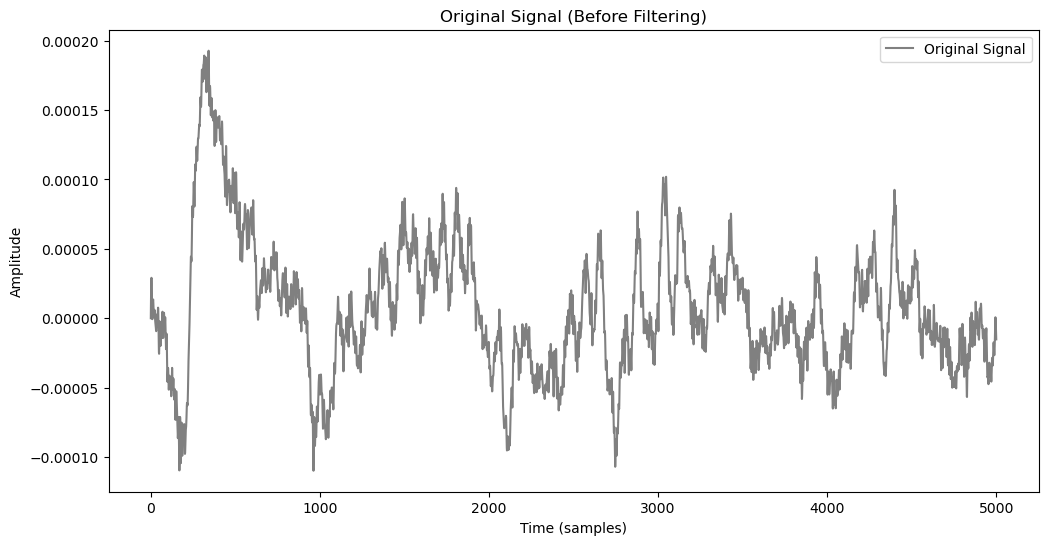

In [13]:
import numpy as np
import mne
import matplotlib.pyplot as plt

# Paths to files
original_signal_file = r"C:\Semesters\Sem5\BMSP\Project\segmented_data\sub-001_epochs.fif" 
filtered_signal_file =  r"C:\Semesters\Sem5\BMSP\Project\filtered_outputs\sub-001_filtered_signals.npy"  # Replace with the actual path

# Load the original signal in .fif format
original_epochs = mne.read_epochs(original_signal_file)
original_signal = original_epochs.get_data()
print(f"Original epochs shape: {original_signal.shape}")  # Expected (72, 19, 5000)

# Load the filtered signal in .npy format
filtered_data = np.load(filtered_signal_file, allow_pickle=True)
print(f"Filtered signal shape: {filtered_data.shape}")  # Should ideally match the original (72, 19, 5000)

# Verify if reshaping is needed
if filtered_data.shape[-1] != original_signal.shape[-1]:
    print("Mismatch in time points. Please check if filtering altered the time resolution.")
else:
    # Select an epoch and channel for comparison
    epoch_idx, channel_idx = 0, 0
    original_signal_epoch = original_signal[epoch_idx, channel_idx, :]
    filtered_signal_epoch = filtered_data[epoch_idx, channel_idx, :]

    # Plotting
    plt.figure(figsize=(12, 6))
    # Original signal plot
    plt.subplot(2, 1, 1)
    plt.plot(original_signal_epoch, color='grey', label='Original Signal')
    plt.title("Original Signal (Before Filtering)")
    plt.xlabel("Time (samples)")
    plt.ylabel("Amplitude")
    plt.legend()

    # Filtered signal plot
    plt.subplot(2, 1, 2)
    plt.plot(filtered_signal_epoch, color='blue', label='Filtered Signal')
    plt.title("Filtered Signal (After Filtering)")
    plt.xlabel("Time (samples)")
    plt.ylabel("Amplitude")
    plt.legend()

    plt.tight_layout()
    plt.show()


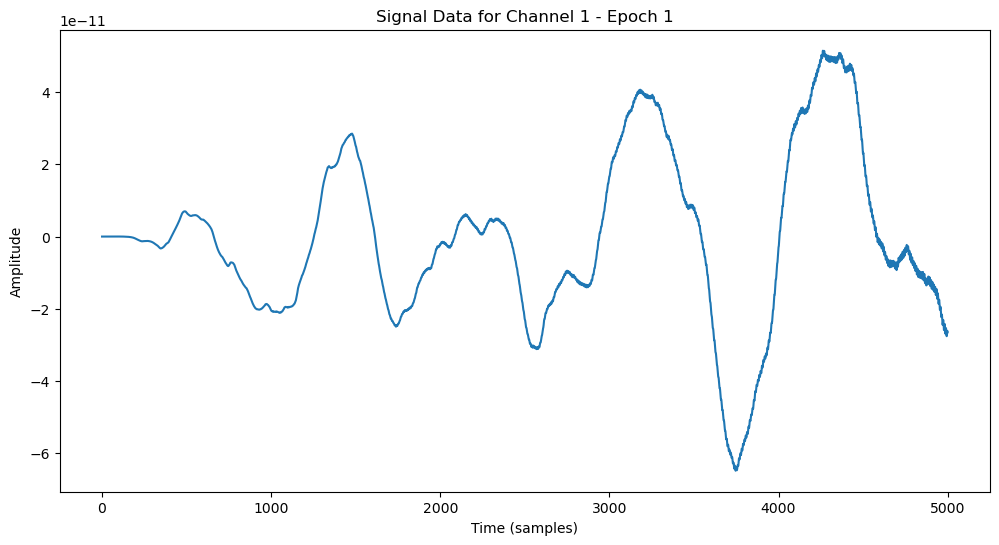

In [12]:
import matplotlib.pyplot as plt

# Select the epoch you want to visualize (e.g., the first epoch, index 0)
epoch_index = 0

# Get the data for channel 1 in the selected epoch (channel 1 is at index 0)
channel_data = data[epoch_index, 0]  # First channel

# Plot the data for channel 1 in the selected epoch
plt.figure(figsize=(12, 6))
plt.plot(channel_data)
plt.title(f"Signal Data for Channel 1 - Epoch {epoch_index + 1}")
plt.xlabel("Time (samples)")
plt.ylabel("Amplitude")
plt.show()


In [14]:
import numpy as np
import mne

# Paths to files
original_signal_file = r"C:\Semesters\Sem5\BMSP\Project\segmented_data\sub-001_epochs.fif" 
filtered_signal_file = r"C:\Semesters\Sem5\BMSP\Project\reconstructed_signals\sub-001_reconstructed_signals.npy" 

# Load the original signal in .fif format
original_epochs = mne.read_epochs(original_signal_file)
original_signal = original_epochs.get_data()

# Load the filtered signal in .npy format
filtered_data = np.load(filtered_signal_file, allow_pickle=True)

# Select the epoch and channel for analysis
epoch_idx, channel_idx = 0, 0  # For example, the first epoch and first channel

# Get the signal for the selected epoch and channel
original_signal_epoch = original_signal[epoch_idx, channel_idx, :]
filtered_signal_epoch = filtered_data[epoch_idx, channel_idx]  # Assuming the filtered signal is 2D

# Calculate Signal Power (mean squared value of the signal)
signal_power = np.mean(original_signal_epoch**2)

# Calculate Noise (difference between original and filtered signal)
noise = original_signal_epoch - filtered_signal_epoch

# Calculate Noise Power (mean squared value of the noise)
noise_power = np.mean(noise**2)

# Calculate SNR in linear scale
snr_linear = signal_power / noise_power

# Calculate SNR in dB scale
snr_db = 10 * np.log10(snr_linear)

# Print the SNR
print(f"SNR (linear): {snr_linear}")
print(f"SNR (dB): {snr_db} dB")


Reading C:\Semesters\Sem5\BMSP\Project\segmented_data\sub-001_epochs.fif ...
    Found the data of interest:
        t =       0.00 ...    9998.00 ms
        0 CTF compensation matrices available


C:\Users\kriti\AppData\Local\Temp\ipykernel_13268\689771153.py:9: RuntimeWarning: This filename (C:\Semesters\Sem5\BMSP\Project\segmented_data\sub-001_epochs.fif) does not conform to MNE naming conventions. All epochs files should end with -epo.fif, -epo.fif.gz, _epo.fif or _epo.fif.gz
  original_epochs = mne.read_epochs(original_signal_file)


Not setting metadata
72 matching events found
No baseline correction applied
0 projection items activated
SNR (linear): 1.000000173939414
SNR (dB): 7.554092110863851e-07 dB


In [2]:
!pip install pyhht

In [54]:
# Define the number of segments to group for averaging (e.g., 6 segments for 2 minutes)
import os
import numpy as np
import pandas as pd
from scipy.stats import skew, kurtosis, entropy
from scipy.signal import welch, stft

# Define frequency bands
FREQ_BANDS = {
    'delta': (0.5, 4),
    'theta': (4, 8),
    'alpha': (8, 12),
    'beta': (12, 30),
    'gamma': (30, 45),
}

def hjorth_parameters(signal):
    """Calculate Hjorth parameters: activity, mobility, and complexity."""
    diff_signal = np.diff(signal)
    variance = np.var(signal)
    activity = variance
    mobility = np.sqrt(np.var(diff_signal) / variance)
    complexity = (
        np.sqrt(np.var(np.diff(diff_signal)) / np.var(diff_signal)) / mobility
    )
    return activity, mobility, complexity

def extract_temporal_features(signal):
    """Extract temporal features from a given signal."""
    features = {
        'mean': np.mean(signal),
        'variance': np.var(signal),
        'skewness': skew(signal),
        'kurtosis': kurtosis(signal),
        'entropy': entropy(np.abs(signal)),
    }
    # Extract Hjorth parameters
    activity, mobility, complexity = hjorth_parameters(signal)
    features.update({
        'activity': activity,
        'mobility': mobility,
        'complexity': complexity
    })
    return features

def bandpower(psd, freqs, fmin, fmax):
    """Calculate the power in a specific frequency band."""
    idx_band = np.logical_and(freqs >= fmin, freqs <= fmax)
    return np.sum(psd[idx_band])

def extract_frequency_features(signal, fs=128):
    """Extract frequency-domain features using Welch's method."""
    freqs, psd = welch(signal, fs=fs, nperseg=fs*2)
    total_power = np.sum(psd)
    features = {}
    
    # Extract relative power for each frequency band
    for band, (fmin, fmax) in FREQ_BANDS.items():
        power = bandpower(psd, freqs, fmin, fmax)
        features[f'{band}_power'] = power / total_power

    # Calculate spectral entropy and peak frequency
    features['spectral_entropy'] = entropy(psd / total_power)
    features['peak_frequency'] = freqs[np.argmax(psd)]

    return features

def extract_time_frequency_features(signal, fs=128, nperseg=128):
    """Extract time-frequency features using Short-Time Fourier Transform (STFT)."""
    freqs, times, Zxx = stft(signal, fs=fs, nperseg=nperseg)
    power_spectrogram = np.abs(Zxx)**2
    
    # Aggregate power in each frequency band across time
    time_freq_features = {}
    total_power = np.sum(power_spectrogram)
    
    for band, (fmin, fmax) in FREQ_BANDS.items():
        # Calculate the mean power in each frequency band over time
        band_power = np.mean(power_spectrogram[(fmin <= freqs) & (freqs <= fmax), :])
        time_freq_features[f'{band}_time_freq_power'] = band_power / total_power

    return time_freq_features

# Define the number of epochs to group for averaging (e.g., 6 epochs at a time)
chunk_size = 6

# Initialize a list to store all features (each row corresponds to a chunk's aggregated features)
all_features = []

# Paths
input_folder = r"C:\Semesters\Sem5\BMSP\Project\reconstructed_signals"
output_csv = r"C:\Users\kriti\Downloads\aggregated_features2.csv"

for i in range(1, 89):
    file_path = os.path.join(input_folder, f'sub-{i:03d}_reconstructed_signals.npy')

    if not os.path.exists(file_path):
        print(f"File not found: {file_path}")
        continue

    # Load reconstructed signals
    reconstructed_signals = np.load(file_path, allow_pickle=True)

    # Process each chunk (group of 6 epochs)
    for epoch_start in range(0, reconstructed_signals.shape[0], chunk_size):
        # Define the range of epochs for the current chunk
        epoch_end = min(epoch_start + chunk_size, reconstructed_signals.shape[0])  # Avoid going out of bounds

        # Collect features for the current chunk
        chunk_temporal_features = []
        chunk_frequency_features = []
        chunk_time_frequency_features = []

        # Iterate over the channels for the current chunk of epochs
        for channel_idx in range(reconstructed_signals.shape[1]):
            # For each channel, process the epochs from epoch_start to epoch_end
            for epoch_idx in range(epoch_start, epoch_end):
                signal = reconstructed_signals[epoch_idx, channel_idx]

                # Extract temporal, frequency, and time-frequency features
                temporal_features = extract_temporal_features(signal)
                frequency_features = extract_frequency_features(signal)
                time_frequency_features = extract_time_frequency_features(signal)

                # Store the features for this segment
                chunk_temporal_features.append(temporal_features)
                chunk_frequency_features.append(frequency_features)
                chunk_time_frequency_features.append(time_frequency_features)

        # Average features over the current chunk (6 epochs)
        avg_temporal_chunk = pd.DataFrame(chunk_temporal_features).mean().to_dict()
        avg_frequency_chunk = pd.DataFrame(chunk_frequency_features).mean().to_dict()
        avg_time_frequency_chunk = pd.DataFrame(chunk_time_frequency_features).mean().to_dict()

        # Combine the averaged features for this chunk
        chunk_features = {'subject': i, 'epoch_range': f"{epoch_start}-{epoch_end-1}"}

        # Add chunk features to the feature dictionary
        chunk_features.update(avg_temporal_chunk)
        chunk_features.update(avg_frequency_chunk)
        chunk_features.update(avg_time_frequency_chunk)

        # Append chunk features to the list for all subjects
        all_features.append(chunk_features)

    print(f"Processed subject {i:03d}")

# Convert all features to a DataFrame and save it to CSV
df = pd.DataFrame(all_features)
df.to_csv(output_csv, index=False)
print(f"Aggregated features saved to {output_csv}")

  

C:\Users\kriti\AppData\Local\Temp\ipykernel_19688\1245772651.py:22: RuntimeWarning: invalid value encountered in scalar divide
  mobility = np.sqrt(np.var(diff_signal) / variance)
C:\Users\kriti\AppData\Local\Temp\ipykernel_19688\1245772651.py:24: RuntimeWarning: invalid value encountered in scalar divide
  np.sqrt(np.var(np.diff(diff_signal)) / np.var(diff_signal)) / mobility
C:\Users\kriti\AppData\Local\Temp\ipykernel_19688\1245772651.py:60: RuntimeWarning: invalid value encountered in scalar divide
  features[f'{band}_power'] = power / total_power
C:\Users\kriti\AppData\Local\Temp\ipykernel_19688\1245772651.py:63: RuntimeWarning: invalid value encountered in divide
  features['spectral_entropy'] = entropy(psd / total_power)
C:\Users\kriti\AppData\Local\Temp\ipykernel_19688\1245772651.py:80: RuntimeWarning: invalid value encountered in scalar divide
  time_freq_features[f'{band}_time_freq_power'] = band_power / total_power


Processed subject 001
Processed subject 002
Processed subject 003
Processed subject 004
Processed subject 005
Processed subject 006
Processed subject 007
Processed subject 008
Processed subject 009
Processed subject 010
Processed subject 011
Processed subject 012
Processed subject 013
Processed subject 014
Processed subject 015
Processed subject 016
Processed subject 017
Processed subject 018
Processed subject 019
Processed subject 020
Processed subject 021
Processed subject 022
Processed subject 023
Processed subject 024
Processed subject 025
Processed subject 026
Processed subject 027
Processed subject 028
Processed subject 029
Processed subject 030
Processed subject 031
Processed subject 032
Processed subject 033
Processed subject 034
Processed subject 035
Processed subject 036
Processed subject 037
Processed subject 038
Processed subject 039
Processed subject 040
Processed subject 041
Processed subject 042
Processed subject 043
Processed subject 044
Processed subject 045
Processed 

In [30]:
import pandas as pd
import numpy as np
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Conv1D, MaxPooling1D, Flatten, Dense, Dropout
from sklearn.preprocessing import StandardScaler

# Step 1: Load the training and testing data from separate Excel files
train_df = pd.read_csv(r"C:\Users\kriti\Downloads\train_new1.csv")  # Replace with the path to your train file
test_df = pd.read_excel(r"C:\Users\kriti\Downloads\test_new.xlsx")    # Replace with the path to your test file

# Step 2: Separate features and labels
# Assuming the last column is the label in both train and test files

# Check for NaN or invalid values in the label column and replace if necessary
train_df = train_df.dropna(subset=[train_df.columns[-1]])  # Drop rows with NaN in label
test_df = test_df.dropna(subset=[test_df.columns[-1]])

# Initialize StandardScaler for consistent scaling
scaler = StandardScaler()

# Fit and transform X_train
x_train = scaler.fit_transform(train_df.iloc[:, 1:-1].values)  # All rows, all columns except the last
y_train = train_df.iloc[:, -1].values.astype(int)             # Convert labels to integers if needed

# Transform X_test using the same scaler
x_test = scaler.transform(test_df.iloc[:, 1:-1].values)        # All rows, all columns except the last
y_test = test_df.iloc[:, -1].values.astype(int)               # Convert labels to integers if needed

# Check for any invalid labels that are out of the expected range [0, num_classes - 1]
num_classes = len(np.unique(y_train))
valid_labels = (y_train >= 0) & (y_train < num_classes)
x_train, y_train = x_train[valid_labels], y_train[valid_labels]

# Reshape the input data to (num_samples, num_features, 1) for 1D CNN
x_train = x_train.reshape(x_train.shape[0], x_train.shape[1], 1)
x_test = x_test.reshape(x_test.shape[0], x_test.shape[1], 1)


print(f"Training Features shape: {x_train.shape}")  # (num_samples, num_features, 1)
print(f"Training Labels shape: {y_train.shape}")    # (num_samples,)
print(f"Testing Features shape: {x_test.shape}")    # (num_samples, num_features, 1)
print(f"Testing Labels shape: {y_test.shape}")      # (num_samples,)

# Step 3: Define the CNN model
model1 = Sequential([
    Conv1D(filters=32, kernel_size=2, activation='relu', input_shape=(x_train.shape[1], 1)),
    Conv1D(filters=64, kernel_size=2, activation='relu'),  # Second Conv1D layer
    Flatten(),
    Dense(64, activation='tanh'),
    Dropout(0.5),  # Regularization
    Dense(1, activation='sigmoid')  # Output layer with number of classes
])

# Compile the model
model1.compile(loss='binary_crossentropy', 
              optimizer='adam', 
              metrics=['accuracy'])

# Summary of the model
model1.summary()

# Step 4: Fit the model
model1.fit(x_train, y_train, batch_size=32, epochs=80, verbose=1)

# Step 5: Evaluate the model on test data
acc = model1.evaluate(x_test, y_test)
print("Test Loss:", acc[0], "Test Accuracy:", acc[1])
model1.save("model1.h5")

Training Features shape: (977, 20, 1)
Training Labels shape: (977,)
Testing Features shape: (55, 20, 1)
Testing Labels shape: (55,)


C:\Users\kriti\AppData\Roaming\Python\Python312\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_11"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv1d_22 (Conv1D)                   │ (None, 19, 32)              │              96 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv1d_23 (Conv1D)                   │ (None, 18, 64)              │           4,160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_11 (Flatten)                 │ (None, 1152)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_22 (Dense)                     │ (None, 64)                  │          73,792 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_11 (Dropout)                 │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_23 (Dense)                     │ (None, 1)                   │              65 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 78,113 (305.13 KB)

 Trainable params: 78,113 (305.13 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/80
31/31 ━━━━━━━━━━━━━━━━━━━━ 6s 9ms/step - accuracy: 0.5764 - loss: 0.6883 
Epoch 2/80
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.6221 - loss: 0.6462
Epoch 3/80
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.6239 - loss: 0.6513
Epoch 4/80
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.5930 - loss: 0.6611
Epoch 5/80
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.6231 - loss: 0.6522
Epoch 6/80
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.6283 - loss: 0.6328
Epoch 7/80
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.6345 - loss: 0.6332 
Epoch 8/80
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.6189 - loss: 0.6230
Epoch 9/80
31/31 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - accuracy: 0.6351 - loss: 0.6356
Epoch 10/80
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.6598 - loss: 0.6109
Epoch 11/80
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.6360 - loss: 0.6305
Epoch 12/80
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 

Test Loss: 0.740814745426178 Test Accuracy: 0.581818163394928


In [32]:
import pandas as pd
import numpy as np
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Conv1D, MaxPooling1D, Flatten, Dense, Dropout
from sklearn.preprocessing import StandardScaler

# Step 1: Load the training and testing data from separate Excel files
train_df = pd.read_csv(r"C:\Users\kriti\Downloads\train_new1.csv")  # Replace with the path to your train file
test_df = pd.read_excel(r"C:\Users\kriti\Downloads\test_new.xlsx")    # Replace with the path to your test file

# Step 2: Separate features and labels
# Assuming the last column is the label in both train and test files

# Check for NaN or invalid values in the label column and replace if necessary
train_df = train_df.dropna(subset=[train_df.columns[-1]])  # Drop rows with NaN in label
test_df = test_df.dropna(subset=[test_df.columns[-1]])

# Initialize StandardScaler for consistent scaling
scaler = StandardScaler()

# Fit and transform X_train
x_train = scaler.fit_transform(train_df.iloc[:, 9:16].values)  # All rows, all columns except the last
y_train = train_df.iloc[:, -1].values.astype(int)             # Convert labels to integers if needed

# Transform X_test using the same scaler
x_test = scaler.transform(test_df.iloc[:, 9:16].values)        # All rows, all columns except the last
y_test = test_df.iloc[:, -1].values.astype(int)               # Convert labels to integers if needed

# Check for any invalid labels that are out of the expected range [0, num_classes - 1]
num_classes = len(np.unique(y_train))
valid_labels = (y_train >= 0) & (y_train < num_classes)
x_train, y_train = x_train[valid_labels], y_train[valid_labels]

# Reshape the input data to (num_samples, num_features, 1) for 1D CNN
x_train = x_train.reshape(x_train.shape[0], x_train.shape[1], 1)
x_test = x_test.reshape(x_test.shape[0], x_test.shape[1], 1)


print(f"Training Features shape: {x_train.shape}")  # (num_samples, num_features, 1)
print(f"Training Labels shape: {y_train.shape}")    # (num_samples,)
print(f"Testing Features shape: {x_test.shape}")    # (num_samples, num_features, 1)
print(f"Testing Labels shape: {y_test.shape}")      # (num_samples,)

# Step 3: Define the CNN model
model3 = Sequential([
    Conv1D(filters=32, kernel_size=2, activation='relu', input_shape=(x_train.shape[1], 1)),
    Conv1D(filters=64, kernel_size=2, activation='relu'),  # Second Conv1D layer
    Flatten(),
    Dense(64, activation='tanh'),
    Dropout(0.5),  # Regularization
    Dense(1, activation='sigmoid')  # Output layer with number of classes
])

# Compile the model
model3.compile(loss='binary_crossentropy', 
              optimizer='adam', 
              metrics=['accuracy'])

# Summary of the model
model3.summary()

# Step 4: Fit the model
model3.fit(x_train, y_train, batch_size=32, epochs=80, verbose=1)

# Step 5: Evaluate the model on test data
acc = model3.evaluate(x_test, y_test)
print("Test Loss:", acc[0], "Test Accuracy:", acc[1])
model3.save('model3.h5')

Training Features shape: (977, 7, 1)
Training Labels shape: (977,)
Testing Features shape: (55, 7, 1)
Testing Labels shape: (55,)


C:\Users\kriti\AppData\Roaming\Python\Python312\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_13"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv1d_26 (Conv1D)                   │ (None, 6, 32)               │              96 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv1d_27 (Conv1D)                   │ (None, 5, 64)               │           4,160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_13 (Flatten)                 │ (None, 320)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_26 (Dense)                     │ (None, 64)                  │          20,544 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_13 (Dropout)                 │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_27 (Dense)                     │ (None, 1)                   │              65 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 24,865 (97.13 KB)

 Trainable params: 24,865 (97.13 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/80
31/31 ━━━━━━━━━━━━━━━━━━━━ 4s 11ms/step - accuracy: 0.5920 - loss: 0.6831
Epoch 2/80
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.6202 - loss: 0.6503
Epoch 3/80
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.6097 - loss: 0.6679
Epoch 4/80
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.5889 - loss: 0.6636
Epoch 5/80
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.6214 - loss: 0.6490
Epoch 6/80
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.6215 - loss: 0.6548
Epoch 7/80
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.6552 - loss: 0.6337
Epoch 8/80
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.6368 - loss: 0.6446
Epoch 9/80
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.6458 - loss: 0.6351
Epoch 10/80
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.6302 - loss: 0.6448
Epoch 11/80
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.6662 - loss: 0.6307
Epoch 12/80
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.666

Test Loss: 0.5711697936058044 Test Accuracy: 0.7090908885002136


In [33]:
import pandas as pd
import numpy as np
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Conv1D, MaxPooling1D, Flatten, Dense, Dropout, LeakyReLU
from sklearn.preprocessing import StandardScaler

# Step 1: Load the training and testing data from separate Excel files
train_df = pd.read_csv(r"C:\Users\kriti\Downloads\train_new1.csv")  # Replace with the path to your train file
test_df = pd.read_excel(r"C:\Users\kriti\Downloads\test_new.xlsx")    # Replace with the path to your test file

# Step 2: Separate features and labels
# Assuming the last column is the label in both train and test files

# Check for NaN or invalid values in the label column and replace if necessary
train_df = train_df.dropna(subset=[train_df.columns[-1]])  # Drop rows with NaN in label
test_df = test_df.dropna(subset=[test_df.columns[-1]])

# Initialize StandardScaler for consistent scaling
scaler = StandardScaler()

# Fit and transform X_train pd.concat([df.iloc[:, [0]], df.iloc[:, 9:16]], axis=1)
x_train = scaler.fit_transform(train_df.iloc[:, 16:-1].values)  # All rows, all columns except the last
y_train = train_df.iloc[:, -1].values.astype(int)             # Convert labels to integers if needed

# Transform X_test using the same scaler
x_test = scaler.transform(test_df.iloc[:, 16:-1].values)        # All rows, all columns except the last
y_test = test_df.iloc[:, -1].values.astype(int)               # Convert labels to integers if needed

# Check for any invalid labels that are out of the expected range [0, num_classes - 1]
num_classes = len(np.unique(y_train))
valid_labels = (y_train >= 0) & (y_train < num_classes)
x_train, y_train = x_train[valid_labels], y_train[valid_labels]

# Reshape the input data to (num_samples, num_features, 1) for 1D CNN
x_train = x_train.reshape(x_train.shape[0], x_train.shape[1], 1)
x_test = x_test.reshape(x_test.shape[0], x_test.shape[1], 1)


print(f"Training Features shape: {x_train.shape}")  # (num_samples, num_features, 1)
print(f"Training Labels shape: {y_train.shape}")    # (num_samples,)
print(f"Testing Features shape: {x_test.shape}")    # (num_samples, num_features, 1)
print(f"Testing Labels shape: {y_test.shape}")      # (num_samples,)

# Step 3: Define the CNN model
model4 = Sequential([
    Conv1D(filters=32, kernel_size=2, activation='relu', input_shape=(x_train.shape[1], 1)),
    Conv1D(filters=64, kernel_size=2, activation='relu'),  # Second Conv1D layer
    Flatten(),
    Dense(64, activation='tanh'),
    Dropout(0.5),  # Regularization
    Dense(1, activation='sigmoid')  # Output layer with number of classes
])

# Compile the model
model4.compile(loss='binary_crossentropy', 
              optimizer='adam', 
              metrics=['accuracy'])

# Summary of the model
model4.summary()

# Step 4: Fit the model
model4.fit(x_train, y_train, batch_size=32, epochs=80, verbose=1)

# Step 5: Evaluate the model on test data
acc = model4.evaluate(x_test, y_test)
print("Test Loss:", acc[0], "Test Accuracy:", acc[1])
model4.save('model4.h5')

Training Features shape: (977, 5, 1)
Training Labels shape: (977,)
Testing Features shape: (55, 5, 1)
Testing Labels shape: (55,)


C:\Users\kriti\AppData\Roaming\Python\Python312\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_14"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv1d_28 (Conv1D)                   │ (None, 4, 32)               │              96 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv1d_29 (Conv1D)                   │ (None, 3, 64)               │           4,160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_14 (Flatten)                 │ (None, 192)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_28 (Dense)                     │ (None, 64)                  │          12,352 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_14 (Dropout)                 │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_29 (Dense)                     │ (None, 1)                   │              65 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 16,673 (65.13 KB)

 Trainable params: 16,673 (65.13 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/80
31/31 ━━━━━━━━━━━━━━━━━━━━ 6s 9ms/step - accuracy: 0.5405 - loss: 0.6914
Epoch 2/80
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.5893 - loss: 0.6803
Epoch 3/80
31/31 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - accuracy: 0.6163 - loss: 0.6819
Epoch 4/80
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.6210 - loss: 0.6710
Epoch 5/80
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.5911 - loss: 0.6748
Epoch 6/80
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.5876 - loss: 0.6739
Epoch 7/80
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.6094 - loss: 0.6715
Epoch 8/80
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.6214 - loss: 0.6613
Epoch 9/80
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.6156 - loss: 0.6594
Epoch 10/80
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.6205 - loss: 0.6520
Epoch 11/80
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.6067 - loss: 0.6611
Epoch 12/80
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.6005 -

Test Loss: 0.6701099872589111 Test Accuracy: 0.5636363625526428


In [34]:
import pandas as pd
import numpy as np
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

# Assuming 'models' is a list of your trained models
# Assuming 'x_test' is the input test data and 'y_test' is the true labels

# Model names for easier identification
model_names = ['Model 1', 'Model 2', 'Model 3', 'Model 4']
models = [model1, model2, model3, model4]
# Initialize list to store results for comparison
results = []

for i, model in enumerate(models):
    # Check model's expected input shape
    expected_features = model.input_shape[1]
    
    # Adjust x_test based on the expected input feature size of the model
    if x_test.shape[1] != expected_features:
        if x_test.shape[1] > expected_features:
            # Truncate features if x_test has more features than expected
            x_test_adjusted = x_test[:, :expected_features, :]
        else:
            # Pad features if x_test has fewer features than expected
            padding = np.zeros((x_test.shape[0], expected_features - x_test.shape[1], 1))
            x_test_adjusted = np.concatenate((x_test, padding), axis=1)
    else:
        x_test_adjusted = x_test

    try:
        # Predict probabilities for binary classification
        y_pred_probs = model.predict(x_test_adjusted)
        y_pred_classes = (y_pred_probs > 0.5).astype(int)
        
        # Calculate performance metrics
        accuracy = accuracy_score(y_test, y_pred_classes)
        precision = precision_score(y_test, y_pred_classes)
        recall = recall_score(y_test, y_pred_classes)
        f1 = f1_score(y_test, y_pred_classes)
        auc = roc_auc_score(y_test, y_pred_probs)
        
        # Append results for this model
        results.append({
            "Model": model_names[i],
            "Accuracy": accuracy,
            "Precision": precision,
            "Recall": recall,
            "F1 Score": f1,
            "AUC": auc
        })
        
    except ValueError as e:
        print(f"Error with {model_names[i]}: {e}")

# Create a DataFrame for comparison
results_df = pd.DataFrame(results)
print("Model Comparison Results:")
print(results_df)


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 201ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 290ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 191ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 162ms/step
Model Comparison Results:
     Model  Accuracy  Precision    Recall  F1 Score       AUC
0  Model 1  0.581818   0.812500  0.393939  0.530612  0.617080
1  Model 2  0.527273   0.769231  0.303030  0.434783  0.592287
2  Model 3  0.545455   0.681818  0.454545  0.545455  0.539945
3  Model 4  0.563636   0.621622  0.696970  0.657143  0.563361


In [47]:
import pandas as pd
import numpy as np
from tensorflow.keras.models import load_model
from sklearn.preprocessing import StandardScaler
from scipy.stats import mode

# Step 1: Load the test data from Excel
test_df = pd.read_excel(r"C:\Users\kriti\Downloads\test_sig.xlsx")  # Replace with the path to your test file

# Step 2: Preprocess the data
scaler = StandardScaler()

# Scale the features (excluding the label column)
x_test = scaler.fit_transform(test_df.iloc[:, 1:].values)
 
# Reshape the data for 1D CNN (num_samples, num_features, 1)
x_test = x_test.reshape(x_test.shape[0], x_test.shape[1], 1)

# Step 3: Load the trained model
model1 = load_model("model1.h5")

# Step 4: Make predictions for each segment
y_pred_segments = model1.predict(x_test)

# Step 5: Apply threshold to convert predictions to binary class labels (0 or 1)
threshold = 0.5  # Default threshold for sigmoid
y_pred_classes = (y_pred_segments > threshold).astype(int)  # Convert probabilities to 0 or 1

mode_result = mode(y_pred_classes)  # This returns a ModeResult object

# mode_result[0] gives the mode (the most frequent value)
final_class = mode_result.mode[0]  # Correct way to access the mode

# Output the final classification for the signal
print(f"The final class for the signal (based on majority voting) is: {final_class}")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 305ms/step
The final class for the signal (based on majority voting) is: 0


In [48]:
import pandas as pd
import numpy as np
from tensorflow.keras.models import load_model
from sklearn.preprocessing import StandardScaler
from scipy.stats import mode

# Step 1: Load the test data from Excel
test_df = pd.read_excel(r"C:\Users\kriti\Downloads\test_sig.xlsx")  # Replace with the path to your test file

# Step 2: Preprocess the data
scaler = StandardScaler()

# Scale the features (excluding the label column)
x_test = scaler.fit_transform(test_df.iloc[:, 1:9].values)
 
# Reshape the data for 1D CNN (num_samples, num_features, 1)
x_test = x_test.reshape(x_test.shape[0], x_test.shape[1], 1)

# Step 3: Load the trained model
model1 = load_model("model2.h5")

# Step 4: Make predictions for each segment
y_pred_segments = model1.predict(x_test)

# Step 5: Apply threshold to convert predictions to binary class labels (0 or 1)
threshold = 0.5  # Default threshold for sigmoid
y_pred_classes = (y_pred_segments > threshold).astype(int)  # Convert probabilities to 0 or 1

mode_result = mode(y_pred_classes)  # This returns a ModeResult object

# mode_result[0] gives the mode (the most frequent value)
final_class = mode_result.mode[0]  # Correct way to access the mode

# Output the final classification for the signal
print(f"The final class for the signal (based on majority voting) is: {final_class}")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 261ms/step
The final class for the signal (based on majority voting) is: 1


In [49]:
import pandas as pd
import numpy as np
from tensorflow.keras.models import load_model
from sklearn.preprocessing import StandardScaler
from scipy.stats import mode

# Step 1: Load the test data from Excel
test_df = pd.read_excel(r"C:\Users\kriti\Downloads\test_sig.xlsx")  # Replace with the path to your test file

# Step 2: Preprocess the data
scaler = StandardScaler()

# Scale the features (excluding the label column)
x_test = scaler.fit_transform(test_df.iloc[:, 9:16].values)
 
# Reshape the data for 1D CNN (num_samples, num_features, 1)
x_test = x_test.reshape(x_test.shape[0], x_test.shape[1], 1)

# Step 3: Load the trained model
model1 = load_model("model3.h5")

# Step 4: Make predictions for each segment
y_pred_segments = model1.predict(x_test)

# Step 5: Apply threshold to convert predictions to binary class labels (0 or 1)
threshold = 0.5  # Default threshold for sigmoid
y_pred_classes = (y_pred_segments > threshold).astype(int)  # Convert probabilities to 0 or 1

mode_result = mode(y_pred_classes)  # This returns a ModeResult object

# mode_result[0] gives the mode (the most frequent value)
final_class = mode_result.mode[0]  # Correct way to access the mode

# Output the final classification for the signal
print(f"The final class for the signal (based on majority voting) is: {final_class}")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 241ms/step
The final class for the signal (based on majority voting) is: 1


In [52]:
import pandas as pd
import numpy as np
from tensorflow.keras.models import load_model
from sklearn.preprocessing import StandardScaler
from scipy.stats import mode

# Step 1: Load the test data from Excel
test_df = pd.read_excel(r"C:\Users\kriti\Downloads\test_sig.xlsx")  # Replace with the path to your test file

# Step 2: Preprocess the data
scaler = StandardScaler()

# Scale the features (excluding the label column)
x_test = scaler.fit_transform(test_df.iloc[:, 16:].values)
 
# Reshape the data for 1D CNN (num_samples, num_features, 1)
x_test = x_test.reshape(x_test.shape[0], x_test.shape[1], 1)

# Step 3: Load the trained model
model1 = load_model("model4.h5")

# Step 4: Make predictions for each segment
y_pred_segments = model1.predict(x_test)

# Step 5: Apply threshold to convert predictions to binary class labels (0 or 1)
threshold = 0.5  # Default threshold for sigmoid
y_pred_classes = (y_pred_segments > threshold).astype(int)  # Convert probabilities to 0 or 1

mode_result = mode(y_pred_classes)  # This returns a ModeResult object

# mode_result[0] gives the mode (the most frequent value)
final_class = mode_result.mode[0]  # Correct way to access the mode

# Output the final classification for the signal
print(f"The final class for the signal (based on majority voting) is: {final_class}")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 157ms/step
The final class for the signal (based on majority voting) is: 1
